# IF3170 Artificial Intelligence | Tugas Besar 2


Group Number: 44

Group Members:
- Daniel Mulia Putra Manurung (13522043)
- Benjamin Sihombing (13522054)
- Adril Putra Merin (13522068)
- Berto Richardo Togatorop (13522118)

## Import Libraries

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 4.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from imblearn.over_sampling import SMOTENC
from sklearn.decomposition import PCA

## Import Dataset

### Train Dataset

In [ ]:
# Importing the Dataset

# Import the metadata if needed
# https://drive.google.com/file/d/1ZD3HwbH5uvo3a0GAJ-86uFRbapP9Wt75/view?usp=sharing
df_metadata = pd.read_csv('https://drive.google.com/uc?id=1ZD3HwbH5uvo3a0GAJ-86uFRbapP9Wt75')

# Importing and merging the data
# https://drive.google.com/file/d/1kavmCYB80PiWmdTB35dTtx0xKOZ-oAVD/view?usp=sharing
df_1 = pd.read_csv('https://drive.google.com/uc?id=1kavmCYB80PiWmdTB35dTtx0xKOZ-oAVD') # flow_features_train.csv
# https://drive.google.com/file/d/1zVuxzLBvjLc78-576IapSR3gwyJJBe0d/view?usp=sharing
df_2 = pd.read_csv('https://drive.google.com/uc?id=1zVuxzLBvjLc78-576IapSR3gwyJJBe0d') # basic_features_train.csv
# https://drive.google.com/file/d/1undwZTVE58O1O7ITq7tXQd-mMRNACzrU/view?usp=sharing
df_3 = pd.read_csv('https://drive.google.com/uc?id=1undwZTVE58O1O7ITq7tXQd-mMRNACzrU') # content_features_train.csv
# https://drive.google.com/file/d/1aVbUgAxVUdzF_MWjl9jVnt087a8aGUiD/view?usp=sharing
df_4 = pd.read_csv('https://drive.google.com/uc?id=1aVbUgAxVUdzF_MWjl9jVnt087a8aGUiD') # time_features_train.csv
# https://drive.google.com/file/d/11MDt3f6IIJFxgJM62eqILbUhJZCEegC9/view?usp=sharing
df_5 = pd.read_csv('https://drive.google.com/uc?id=11MDt3f6IIJFxgJM62eqILbUhJZCEegC9') # additional_features_train.csv
# https://drive.google.com/file/d/1k_iMhCapCYkg0xRkPHUsk995O1jgkQLf/view?usp=sharing
df_6 = pd.read_csv('https://drive.google.com/uc?id=1k_iMhCapCYkg0xRkPHUsk995O1jgkQLf') # labels_train.csv

df_train = df_1.merge(df_2, on='id', how='outer') \
               .merge(df_3, on='id', how='outer') \
               .merge(df_4, on='id', how='outer') \
               .merge(df_5, on='id', how='outer') \
               .merge(df_6, on='id', how='outer')

# Swap id and proto column
cols = list(df_train.columns)
idx1, idx2 = cols.index("proto"), cols.index("id")
cols[idx1], cols[idx2] = cols[idx2], cols[idx1]
df_train = df_train[cols]

### Test Dataset

In [ ]:
# Importing the Dataset

# Importing and merging the
# https://drive.google.com/file/d/1DwwZuSEjM5dA4migKNAK1GWuSpaYX0_p/view?usp=sharing
df_1 = pd.read_csv('https://drive.google.com/uc?id=1DwwZuSEjM5dA4migKNAK1GWuSpaYX0_p') # flow_features_test.csv
# https://drive.google.com/file/d/1w-mzjTE4xt21hLV0jJJ9W3EAbE2GkE1_/view?usp=sharing
df_2 = pd.read_csv('https://drive.google.com/uc?id=1w-mzjTE4xt21hLV0jJJ9W3EAbE2GkE1_') # basic_features_test.csv
# https://drive.google.com/file/d/1zY03QRf2n587wpH5VDj7EV2MlXqIQxeF/view?usp=sharing
df_3 = pd.read_csv('https://drive.google.com/uc?id=1zY03QRf2n587wpH5VDj7EV2MlXqIQxeF') # content_features_test.csv
# https://drive.google.com/file/d/1w7zDBGJcHqR1T23BeCTyYBuM9wlcjNJb/view?usp=sharing
df_4 = pd.read_csv('https://drive.google.com/uc?id=1w7zDBGJcHqR1T23BeCTyYBuM9wlcjNJb') # time_features_test.csv
# https://drive.google.com/file/d/11auZoWMWBK_dAIbmX4sfbiRmcSf5ZP5b/view?usp=sharing
df_5 = pd.read_csv('https://drive.google.com/uc?id=11auZoWMWBK_dAIbmX4sfbiRmcSf5ZP5b') # additional_features_test.csv
# Labels are the target value thus no labels_test present
# df_6 = pd.read_csv('https://drive.google.com/uc?id=19NRm-XvhGyqveUdYy6lcxp1AWlSToif0') # labels_test.csv

df_test = df_1.merge(df_2, on='id', how='outer') \
               .merge(df_3, on='id', how='outer') \
               .merge(df_4, on='id', how='outer') \
               .merge(df_5, on='id', how='outer')

# Swap id and proto column
cols = list(df_test.columns)
idx1, idx2 = cols.index("proto"), cols.index("id")
cols[idx1], cols[idx2] = cols[idx2], cols[idx1]
df_test = df_test[cols]

### Dataset Preview

In [ ]:
# Train Dataset Preview
pd.set_option('display.max_columns', None)
df_train

id proto state       dur   sbytes    dbytes   sttl   dttl  sloss  \
0            0   tcp   FIN  2.736664  13350.0  548216.0   31.0   29.0   21.0   
1            1   udp   INT  0.000009    114.0       0.0  254.0    0.0    0.0   
2            2   tcp   FIN  5.788526   6102.0    3892.0  254.0  252.0   13.0   
3            3   tcp   FIN  3.849634  25160.0       NaN   31.0   29.0   38.0   
4            4   udp   CON  0.001052    130.0     162.0    NaN   29.0    0.0   
...        ...   ...   ...       ...      ...       ...    ...    ...    ...   
175336  175336   udp   INT  0.000005    114.0       0.0  254.0    0.0    0.0   
175337  175337   tcp   FIN  4.449357   1272.0    1634.0   62.0    NaN    7.0   
175338  175338   udp   INT  0.000008    114.0       0.0  254.0    0.0    0.0   
175339  175339   udp   INT  0.000004    114.0       0.0  254.0    0.0    0.0   
175340  175340   udp   INT  0.000009    114.0       0.0  254.0    0.0    0.0   

        dloss service         sload         dload  spkts  dpkts   swin   dwin  \
0       197.0       -  3.885899e+04  1.598925e+06  232.0  438.0  255.0  255.0   
1         0.0     dns  5.066666e+07  0.000000e+00    2.0    0.0    0.0    0.0   
2        13.0       -  8.199669e+03  5.221364e+03   36.0   34.0  255.0  255.0   
3       390.0       -  5.216912e+04  2.272451e+06  448.0  858.0  255.0  255.0   
4         0.0     dns  4.942966e+05  6.159696e+05    2.0    2.0    0.0    0.0   
...       ...     ...           ...           ...    ...    ...    ...    ...   
175336    0.0     dns  9.120000e+07  0.000000e+00    2.0    0.0    0.0    0.0   
175337    NaN     ftp  2.191777e+03  2.804900e+03   24.0   22.0  255.0  255.0   
175338    0.0     dns  5.700000e+07  0.000000e+00    NaN    0.0    NaN    0.0   
175339    0.0     dns  1.140000e+08  0.000000e+00    2.0    0.0    0.0    0.0   
175340    0.0     dns  5.066666e+07  0.000000e+00    2.0    0.0    0.0    0.0   

               stcpb         dtcpb  smean   dmean  trans_depth  \
0       4.864839e+08  4.926043e+08   58.0     NaN          0.0   
1       0.000000e+00  0.000000e+00   57.0     0.0          0.0   
2       3.835852e+09  2.010029e+08  170.0   114.0          0.0   
3                NaN  6.614436e+08   56.0  1276.0          0.0   
4       0.000000e+00  0.000000e+00   65.0    81.0          0.0   
...              ...           ...    ...     ...          ...   
175336  0.000000e+00  0.000000e+00   57.0     0.0          0.0   
175337  3.482672e+09  2.783193e+09   53.0    74.0          0.0   
175338  0.000000e+00  0.000000e+00   57.0     0.0          0.0   
175339  0.000000e+00  0.000000e+00   57.0     0.0          0.0   
175340  0.000000e+00  0.000000e+00   57.0     0.0          0.0   

        response_body_len          sjit         djit      sinpkt      dinpkt  \
0                     0.0   4449.110313  3234.831566   11.845558    6.261361   
1                     0.0      0.000000     0.000000    0.009000    0.000000   
2                     0.0   8561.040438   249.950547  165.386453  172.345750   
3                     0.0   4053.086020  2918.730804    8.669644    4.496707   
4                     0.0      0.000000     0.000000    0.008000    0.007000   
...                   ...           ...          ...         ...         ...   
175336                0.0      0.000000     0.000000    0.005000    0.000000   
175337                NaN  15464.286700   531.848125  193.445428  209.600766   
175338                0.0      0.000000     0.000000    0.008000    0.000000   
175339                0.0      0.000000     0.000000    0.004000    0.000000   
175340                NaN      0.000000     0.000000    0.009000    0.000000   

          tcprtt    synack    ackdat  is_sm_ips_ports  ct_state_ttl  \
0            NaN  0.000444  0.000114              0.0           0.0   
1       0.000000  0.000000       NaN              0.0           2.0   
2       0.158826  0.057902  0.100924              0.0           NaN   
3       0.000558  0.000448       NaN    

In [ ]:
# Test Dataset Preview
pd.set_option('display.max_columns', None)
df_test

id proto state       dur    sbytes  dbytes   sttl   dttl  sloss  \
0          0   tcp   FIN  0.454980     534.0   268.0  254.0  252.0    2.0   
1          1   tcp   FIN  0.648037    8854.0   268.0  254.0  252.0    4.0   
2          2   tcp   FIN  1.120856    3440.0   642.0  254.0  252.0    5.0   
3          3   udp   INT  0.000001     244.0     0.0  254.0    NaN    0.0   
4          4   tcp   FIN  0.264763    1540.0  1644.0   31.0   29.0    4.0   
...      ...   ...   ...       ...       ...     ...    ...    ...    ...   
20578  20578   tcp   FIN  1.769733  135649.0   870.0  254.0  252.0    NaN   
20579  20579   tcp   FIN  0.400782    5080.0  3080.0    NaN   29.0    7.0   
20580  20580   udp   INT  0.000011     114.0     0.0  254.0    0.0    0.0   
20581  20581  unas   INT  0.000004     200.0     0.0  254.0    0.0    0.0   
20582  20582  rsvp   INT  0.000009     200.0     0.0  254.0    0.0    0.0   

       dloss service         sload         dload  spkts  dpkts   swin   dwin  \
0        1.0       -  8.457515e+03   3938.634766   10.0    6.0  255.0  255.0   
1        1.0       -  1.015004e+05   2765.274170   14.0    6.0  255.0  255.0   
2        3.0       -  2.301812e+04   4203.929688   16.0   12.0  255.0  255.0   
3        0.0     NaN           NaN      0.000000    2.0    0.0    0.0    0.0   
4        4.0       -  4.363147e+04  46924.984380   16.0   18.0  255.0  255.0   
...      ...     ...           ...           ...    ...    ...    ...    ...   
20578    1.0       -  6.077211e+05   3738.417236  112.0   20.0  255.0  255.0   
20579    NaN       -  9.778883e+04  59443.789060   28.0   30.0  255.0  255.0   
20580    0.0     dns  4.145454e+07      0.000000    2.0    0.0    0.0    0.0   
20581    0.0       -  7.272727e+07      0.000000    2.0    0.0    0.0    0.0   
20582    0.0       -  8.888889e+07      0.000000    2.0    0.0    0.0    0.0   

              stcpb         dtcpb   smean  dmean  trans_depth  \
0      2.914597e+08  3.441056e+09    53.0   45.0          0.0   
1      2.288130e+09  3.754733e+07   632.0   45.0          0.0   
2      2.901133e+09  1.323903e+09   215.0   54.0          0.0   
3      0.000000e+00           NaN     NaN    0.0          0.0   
4      2.457682e+09  3.533657e+08    96.0   91.0          0.0   
...             ...           ...     ...    ...          ...   
20578  2.646107e+09  2.632012e+08  1211.0   44.0          0.0   
20579  1.761400e+09  3.910089e+09   181.0  103.0          0.0   
20580  0.000000e+00  0.000000e+00    57.0    0.0          0.0   
20581           NaN  0.000000e+00   100.0    0.0          0.0   
20582  0.000000e+00  0.000000e+00   100.0    0.0          0.0   

       response_body_len         sjit        djit     sinpkt      dinpkt  \
0                    0.0  2737.954123  118.833969  48.756556   76.593602   
1                    0.0  2938.299144  165.780563  49.812539  109.557602   
2                    0.0  4287.453629  129.471406  69.765530   94.395906   
3                    0.0     0.000000    0.000000   0.001000    0.000000   
4                    0.0  1119.063538   26.748141  17.628799   15.543294   
...                  ...          ...         ...        ...         ...   
20578                0.0  1902.551328  143.722203  16.088482   87.730055   
20579                0.0   858.139465   22.118752  14.832222   13.803000   
20580                0.0     0.000000    0.000000        NaN    0.000000   
20581                0.0     0.000000    0.000000   0.011000    0.000000   
20582                0.0     0.000000    0.000000   0.009000         NaN   

         tcprtt    synack    ackdat  is_sm_ips_ports  ct_state_ttl  \
0      0.165117  0.072001  0.093116              0.0           1.0   
1      0.223604  0.100248  0.123356              0.0           1.0   
2      0.113189  0.082498  0.030691              0.0           1.0   
3      0.000000  0.000000  0.000000              0.0           2.0   
4      0.000655  0.000526  0.000129              NaN           0.0   
...       

### Metadata

In [ ]:
pd.set_option('display.max_colwidth', None)
df_metadata

No.               Name    Type   \
0     5              proto  nominal   
1     6              state  nominal   
2     7                dur    Float   
3     8             sbytes  Integer   
4     9             dbytes  Integer   
5    10               sttl  Integer   
6    11               dttl  Integer   
7    12              sloss  Integer   
8    13              dloss  Integer   
9    14            service  nominal   
10   15              sload    Float   
11   16              dload    Float   
12   17              spkts  integer   
13   18              dpkts  integer   
14   19               swin  integer   
15   20               dwin  integer   
16   21              stcpb  integer   
17   22              dtcpb  integer   
18   23              smean  integer   
19   24              dmean  integer   
20   25        trans_depth  integer   
21   26  response_body_len  integer   
22   27               sjit    Float   
23   28               djit    Float   
24   31             sinpkt    Float   
25   32             dinpkt    Float   
26   33             tcprtt    Float   
27   34             synack    Float   
28   35             ackdat    Float   
29   36    is_sm_ips_ports   Binary   
30   37       ct_state_ttl  Integer   
31   38   ct_flw_http_mthd  Integer   
32   39       is_ftp_login   Binary   
33   40         ct_ftp_cmd  integer   
34   41         ct_srv_src  integer   
35   42         ct_srv_dst  integer   
36   43         ct_dst_ltm  integer   
37   44         ct_src_ltm  integer   
38   45   ct_src_dport_ltm  integer   
39   46   ct_dst_sport_ltm  integer   
40   47     ct_dst_src_ltm  integer   
41   48         attack_cat  nominal   
42   49              label   binary   

                                                                                                                                                           Description  \
0                                                                                                                                                 Transaction protocol   
1       Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state)   
2                                                                                                                                                Record total duration   
3                                                                                                                             Source to destination transaction bytes    
4                                                                                                                              Destination to source transaction bytes   
5                                                                                                                            Source to destination time to live value    
6                                                                                                                             Destination to source time to live value   
7                                                                                                                             Source packets retransmitted or dropped    
8                                                                                                                         Destination packets retransmitted or dropped   
9                                                                                           http, ftp, smtp, ssh, dns, ftp-data ,irc  and (-) if not much used service   
10                                                                                                                                              Source bits per second   
11                                                                                                                                         Destination bits per second   
12                                                                           

# Exploratory Data Analysis (Optional)

Null Values for each column

In [ ]:
df_train.isnull().sum()

id                      0
proto                8826
state                8805
dur                  8722
sbytes               8561
dbytes               8869
sttl                 8825
dttl                 8654
sloss                8794
dloss                8978
service              8791
sload                8786
dload                8837
spkts                8654
dpkts                8686
swin                 8740
dwin                 8779
stcpb                8672
dtcpb                8803
smean                8788
dmean                8855
trans_depth          8785
response_body_len    8791
sjit                 8738
djit                 8846
sinpkt               8707
dinpkt               8734
tcprtt               8836
synack               8736
ackdat               8595
is_sm_ips_ports      8746
ct_state_ttl         8635
ct_flw_http_mthd     8647
is_ftp_login         8647
ct_ftp_cmd           8842
ct_srv_src           8851
ct_srv_dst           8774
ct_dst_ltm           8738
ct_src_ltm           8823
ct_src_dport_ltm     8775
ct_dst_sport_ltm     8788
ct_dst_src_ltm       8895
attack_cat              0
label                   0
dtype: int64

Total duplicated data in the dataset

In [ ]:
df_train.duplicated().sum()

0

Split Categorical (and Binary) Data and Numeric Data

In [ ]:
categorical_features = ['proto', 'state', 'service', 'is_sm_ips_ports', 'ct_flw_http_mthd', 'is_ftp_login', 'attack_cat', 'label']
df_categorical = df_train[categorical_features]
df_numeric = df_train[[col for col in df_train.columns if col not in categorical_features]]

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   proto              166515 non-null  object 
 2   state              166536 non-null  object 
 3   dur                166619 non-null  float64
 4   sbytes             166780 non-null  float64
 5   dbytes             166472 non-null  float64
 6   sttl               166516 non-null  float64
 7   dttl               166687 non-null  float64
 8   sloss              166547 non-null  float64
 9   dloss              166363 non-null  float64
 10  service            166550 non-null  object 
 11  sload              166555 non-null  float64
 12  dload              166504 non-null  float64
 13  spkts              166687 non-null  float64
 14  dpkts              166655 non-null  float64
 15  swin               166601 non-null  float64
 16  dw

In [ ]:
df_train.dtypes

id                     int64
proto                 object
state                 object
dur                  float64
sbytes               float64
dbytes               float64
sttl                 float64
dttl                 float64
sloss                float64
dloss                float64
service               object
sload                float64
dload                float64
spkts                float64
dpkts                float64
swin                 float64
dwin                 float64
stcpb                float64
dtcpb                float64
smean                float64
dmean                float64
trans_depth          float64
response_body_len    float64
sjit                 float64
djit                 float64
sinpkt               float64
dinpkt               float64
tcprtt               float64
synack               float64
ackdat               float64
is_sm_ips_ports      float64
ct_state_ttl         float64
ct_flw_http_mthd     float64
is_ftp_login         float64
ct_ftp_cmd           float64
ct_srv_src           float64
ct_srv_dst           float64
ct_dst_ltm           float64
ct_src_ltm           float64
ct_src_dport_ltm     float64
ct_dst_sport_ltm     float64
ct_dst_src_ltm       float64
attack_cat            object
label                  int64
dtype: object

Each categorical unique values

In [ ]:
for col in df_categorical:
    unique_values = df_train[col].unique()
    num_unique = len(unique_values)
    print(f"Column Name: {col}")
    print(f"Unique Value Count: {num_unique}")
    print(f"Values: {unique_values}")
    print("-" * 80)

Column Name: proto
Unique Value Count: 134
Values: ['tcp' 'udp' 'st2' 'unas' 'irtp' nan 'vmtp' 'any' 'cpnx' 'sctp' 'ospf'
 'fc' 'cftp' 'rsvp' 'aris' 'dgp' 'ipv6-route' 'snp' 'pnni' 'arp' 'cbt'
 'scps' 'tcf' 'leaf-1' 'swipe' 'wb-mon' 'crudp' 'sun-nd' 'rdp' 'gmtp'
 'ifmp' 'mobile' 'prm' 'sps' 'ipx-n-ip' 'ipip' 'ipv6-no' 'crtp' 'gre'
 'zero' 'hmp' 'trunk-1' 'idpr' 'ib' 'idpr-cmtp' 'vines' 'micp' 'a/n'
 'ipv6' 'narp' 'ttp' 'eigrp' 'uti' 'mux' 'pim' 'srp' 'wsn' 'tlsp' 'argus'
 '3pc' 'ax.25' 'ipnip' 'l2tp' 'skip' 'ipv6-frag' 'il' 'rvd' 'visa' 'xtp'
 'sm' 'xns-idp' 'ipv6-opts' 'encap' 'ippc' 'merit-inp' 'dcn' 'netblt'
 'bbn-rcc' 'emcon' 'nsfnet-igp' 'iso-tp4' 'ipcv' 'sat-mon' 'nvp' 'i-nlsp'
 'etherip' 'pvp' 'smp' 'idrp' 'ipcomp' 'mhrp' 'ddx' 'icmp' 'kryptolan'
 'tp++' 'aes-sp3-d' 'wb-expak' 'sprite-rpc' 'iso-ip' 'mtp' 'chaos' 'sep'
 'fire' 'ip' 'sccopmce' 'ddp' 'br-sat-mon' 'pgm' 'pri-enc' 'iplt' 'egp'
 'leaf-2' 'vrrp' 'ptp' 'pipe' 'pup' 'sat-expak' 'secure-vmtp' 'trunk-2'
 'cphb' 'sdrp' 'ggp

Missing values


In [ ]:
df_train.isnull().sum(axis = 0)

id                      0
proto                8826
state                8805
dur                  8722
sbytes               8561
dbytes               8869
sttl                 8825
dttl                 8654
sloss                8794
dloss                8978
service              8791
sload                8786
dload                8837
spkts                8654
dpkts                8686
swin                 8740
dwin                 8779
stcpb                8672
dtcpb                8803
smean                8788
dmean                8855
trans_depth          8785
response_body_len    8791
sjit                 8738
djit                 8846
sinpkt               8707
dinpkt               8734
tcprtt               8836
synack               8736
ackdat               8595
is_sm_ips_ports      8746
ct_state_ttl         8635
ct_flw_http_mthd     8647
is_ftp_login         8647
ct_ftp_cmd           8842
ct_srv_src           8851
ct_srv_dst           8774
ct_dst_ltm           8738
ct_src_ltm           8823
ct_src_dport_ltm     8775
ct_dst_sport_ltm     8788
ct_dst_src_ltm       8895
attack_cat              0
label                   0
dtype: int64

Outliers

In [ ]:
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).sum()
outliers_iqr

id                       0
dur                  14968
sbytes               21760
dbytes               26698
sttl                     0
dttl                     0
sloss                10879
dloss                26996
sload                12843
dload                36132
spkts                23470
dpkts                19752
swin                     0
dwin                     0
stcpb                    0
dtcpb                    0
smean                19690
dmean                22185
trans_depth          16948
response_body_len    10723
sjit                 17146
djit                 19538
sinpkt               14034
dinpkt               13409
tcprtt               15228
synack               29934
ackdat                7878
ct_state_ttl          1838
ct_ftp_cmd            2443
ct_srv_src           18379
ct_srv_dst           18380
ct_dst_ltm           21021
ct_src_ltm           12487
ct_src_dport_ltm     31801
ct_dst_sport_ltm     35385
ct_dst_src_ltm       16832
dtype: int64

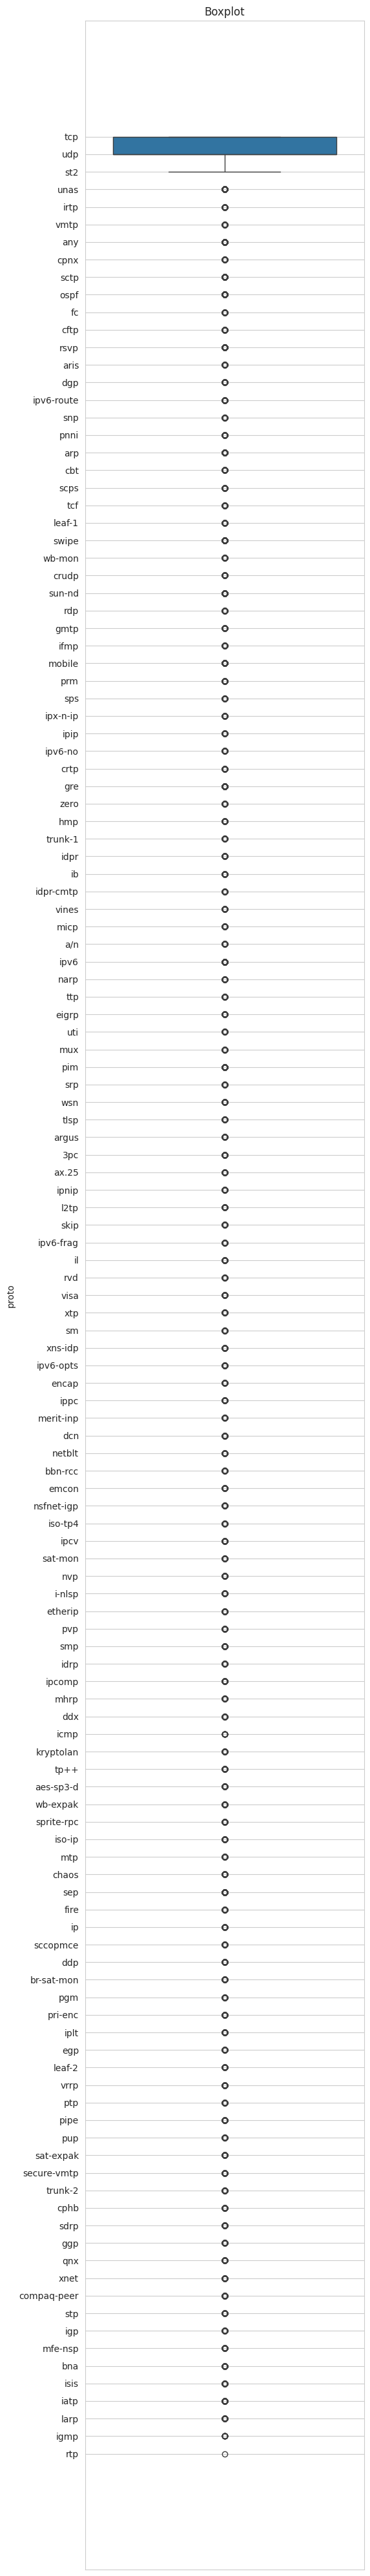

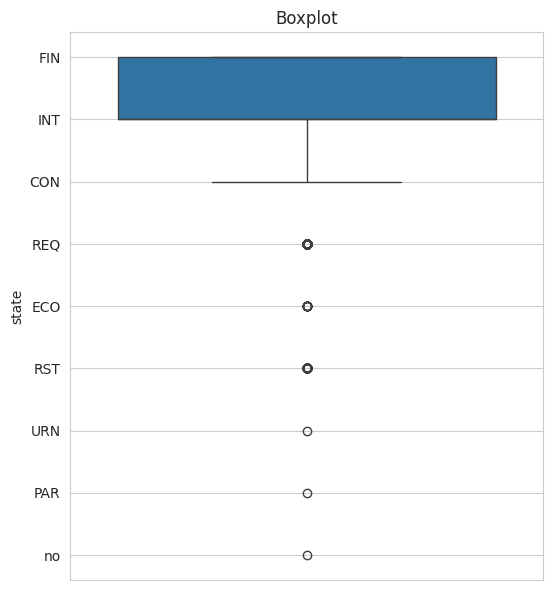

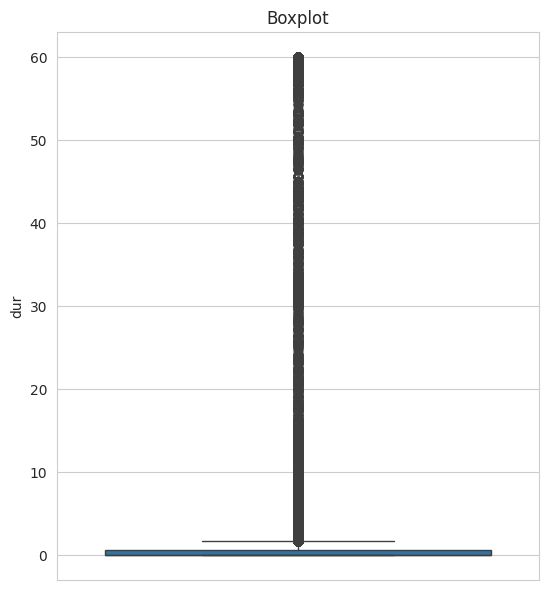

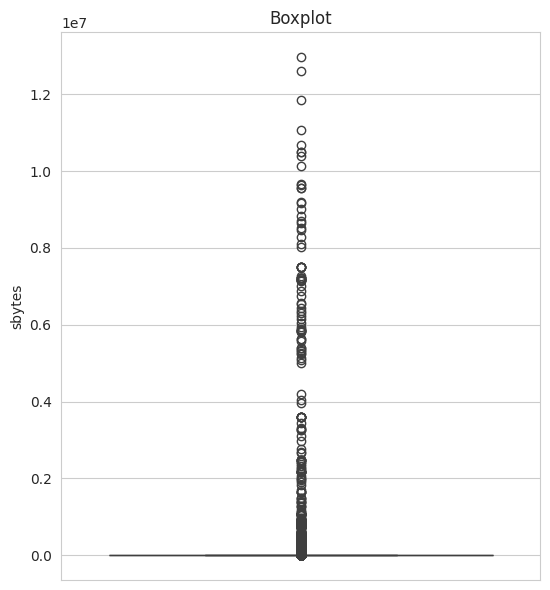

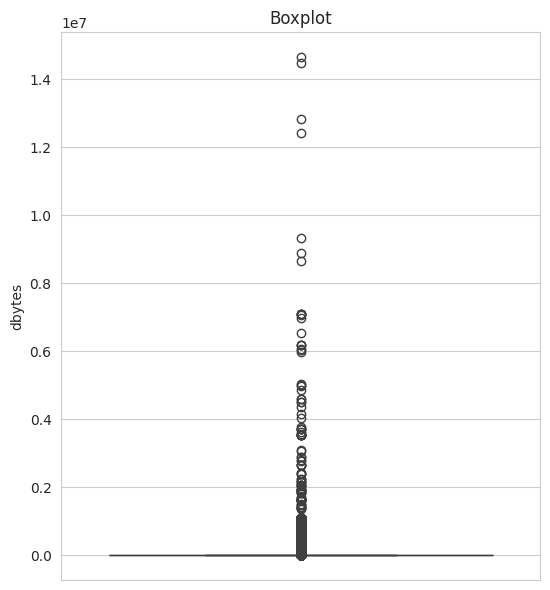

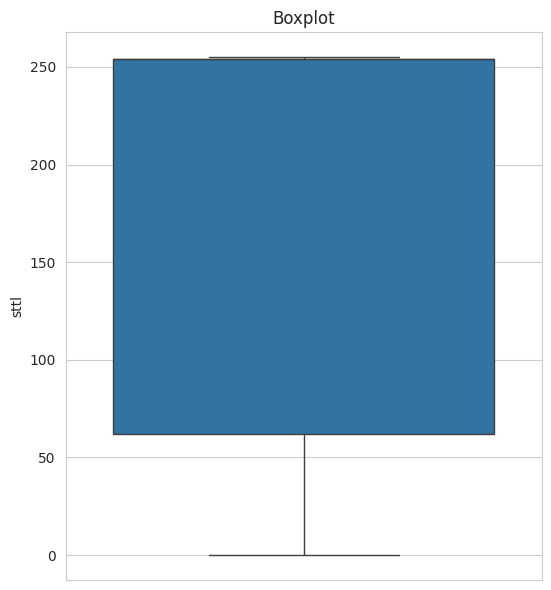

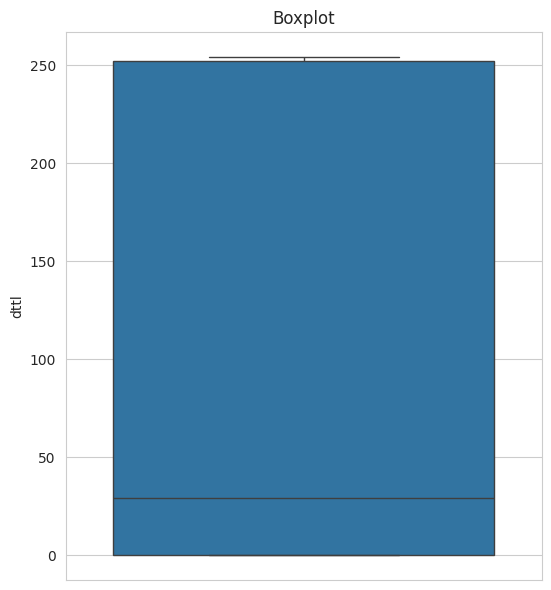

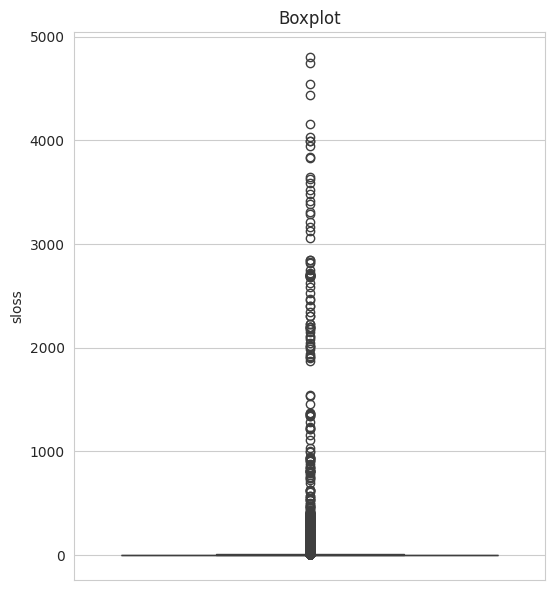

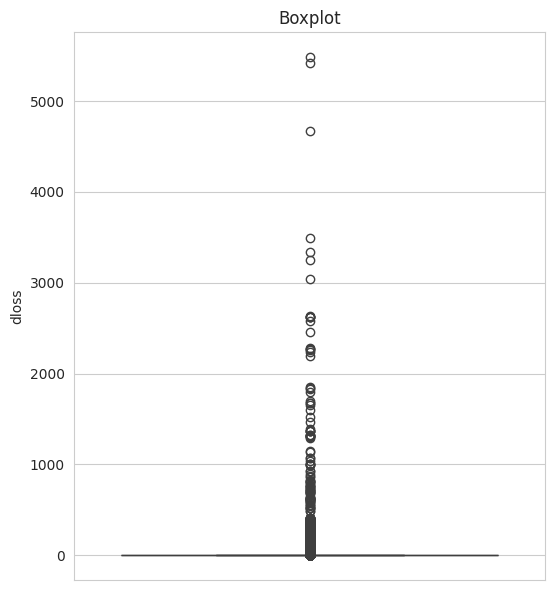

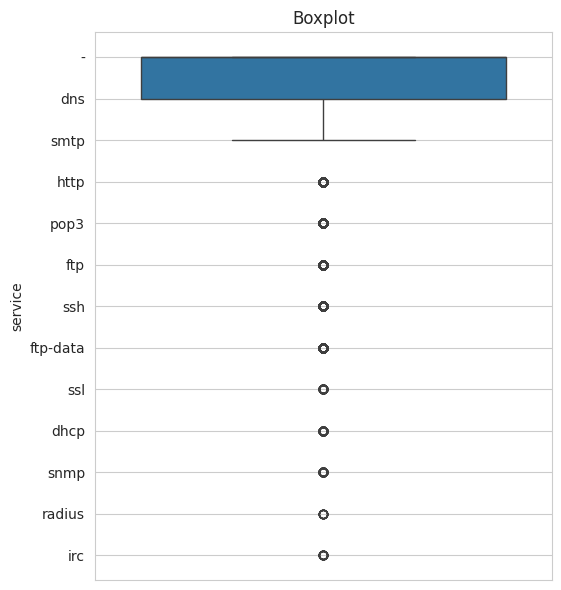

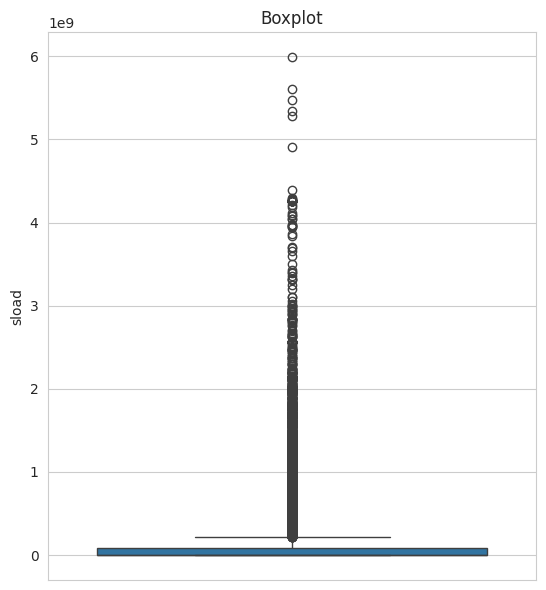

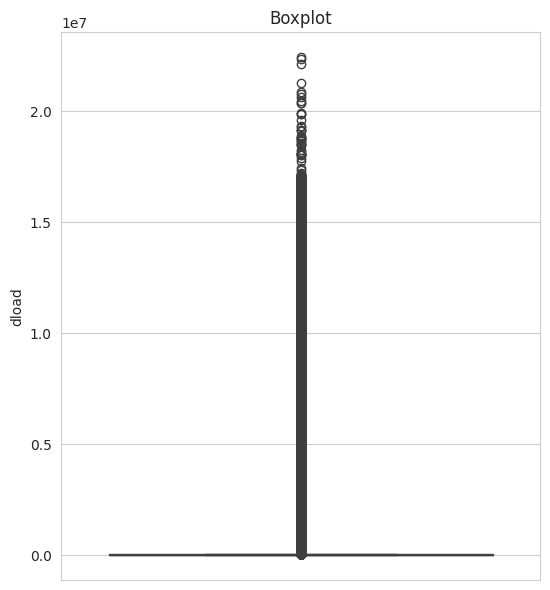

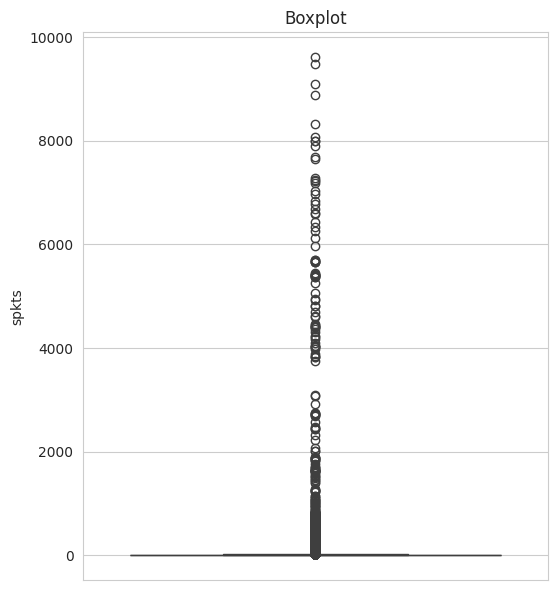

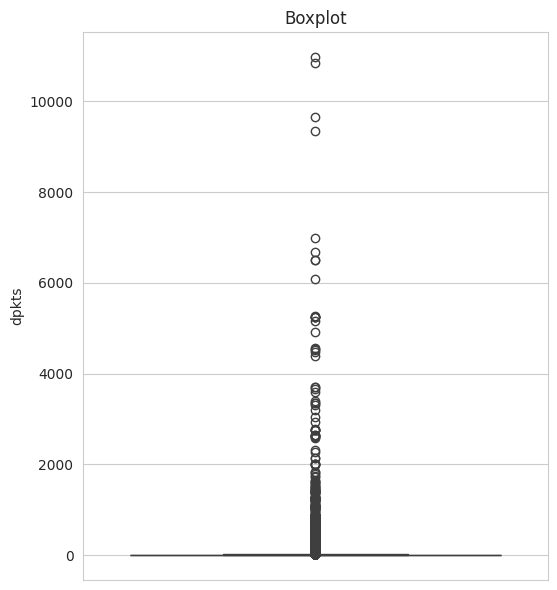

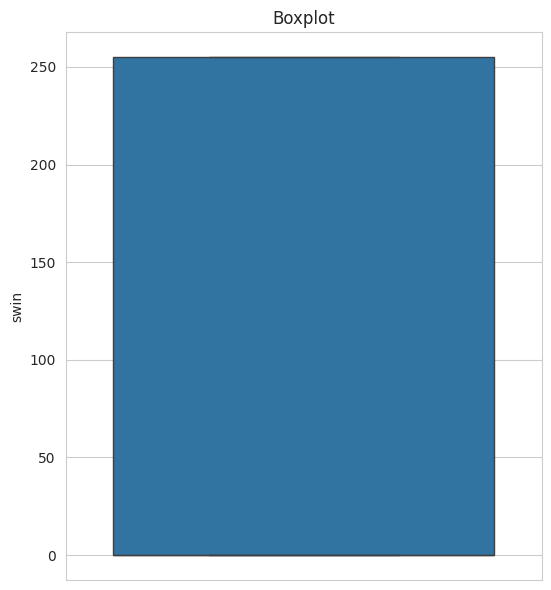

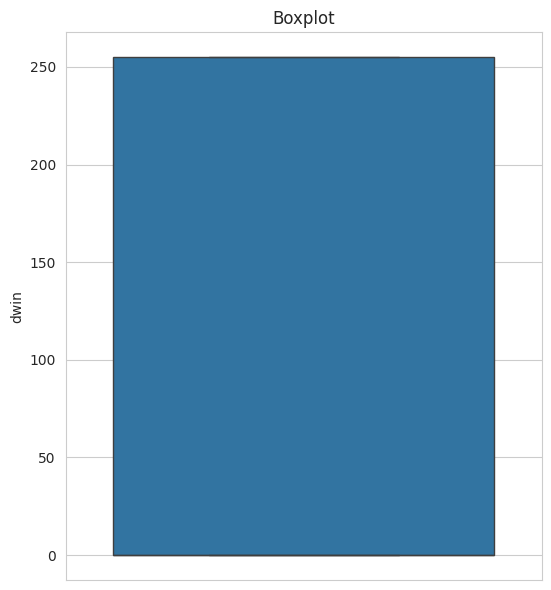

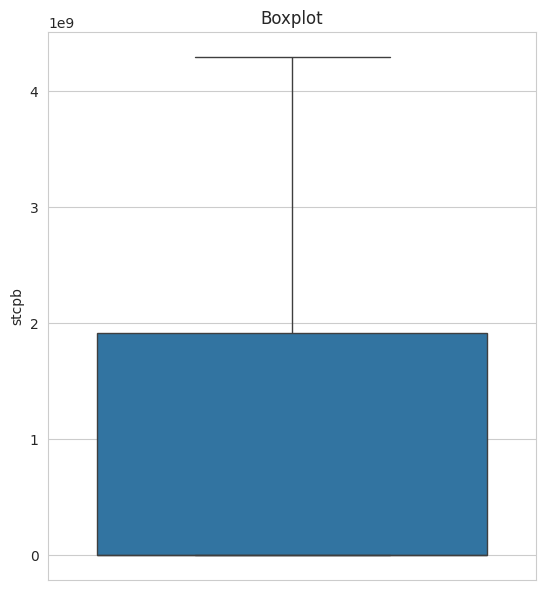

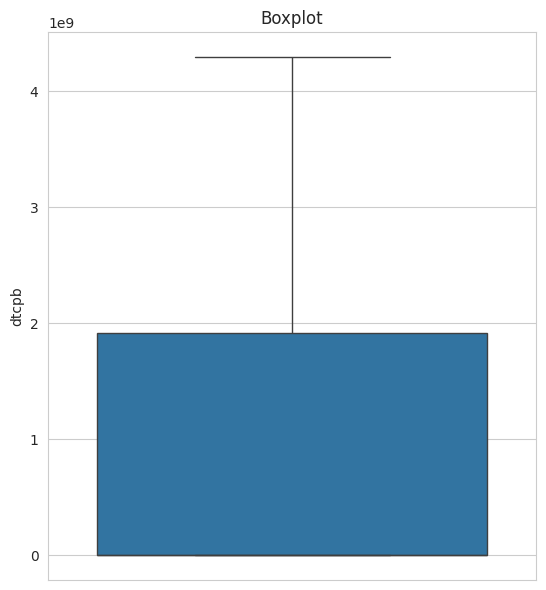

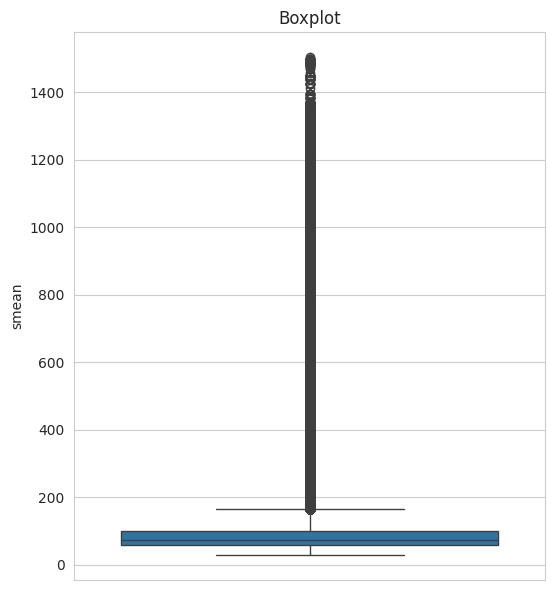

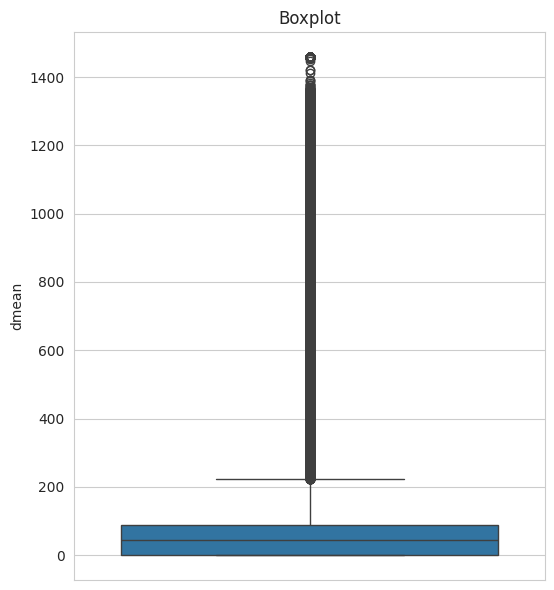

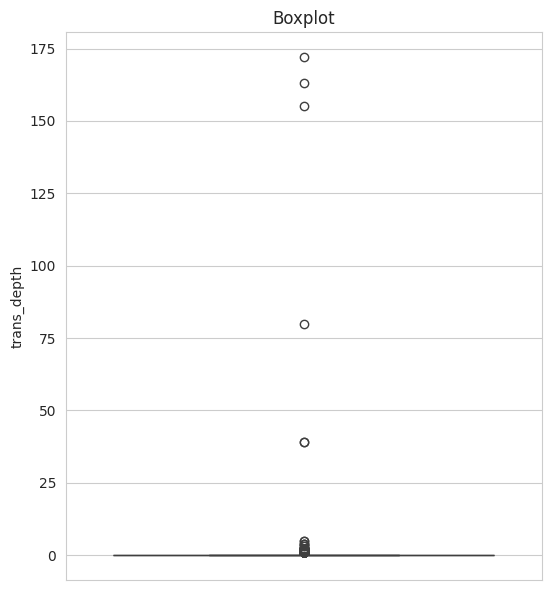

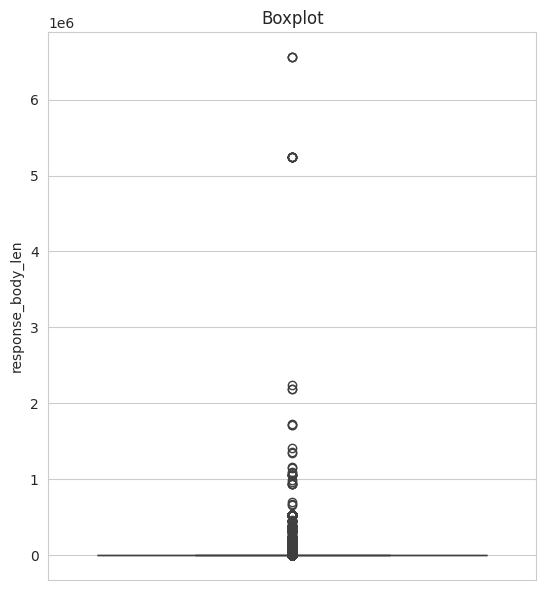

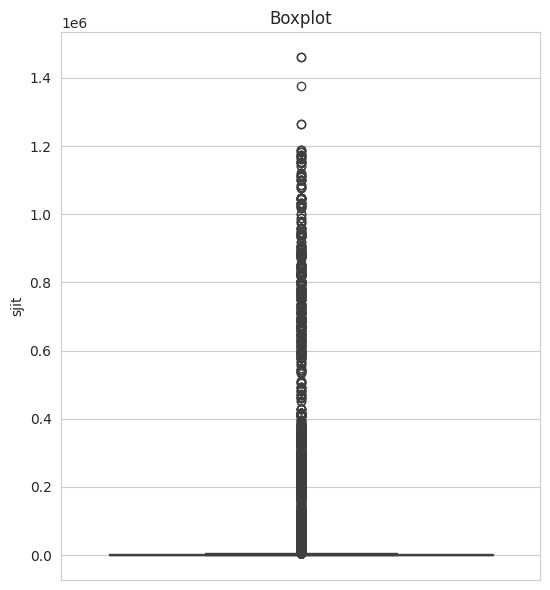

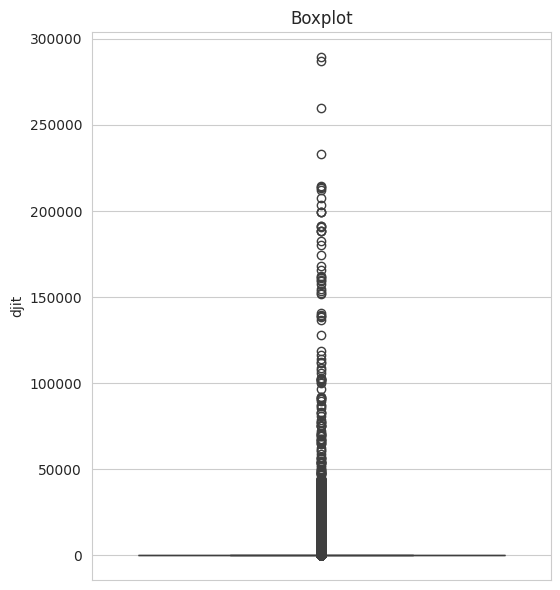

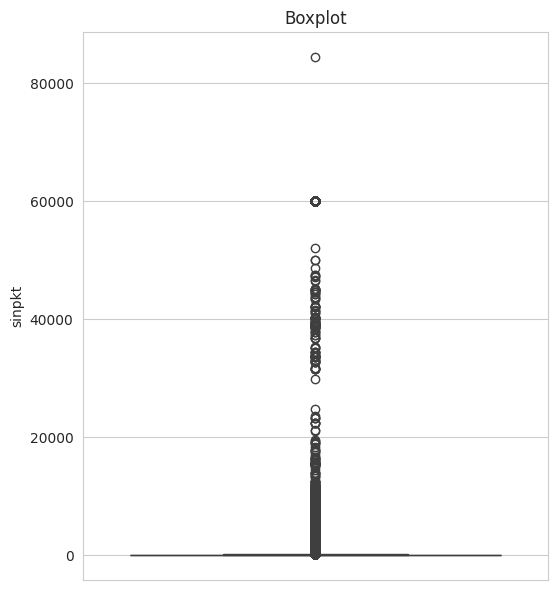

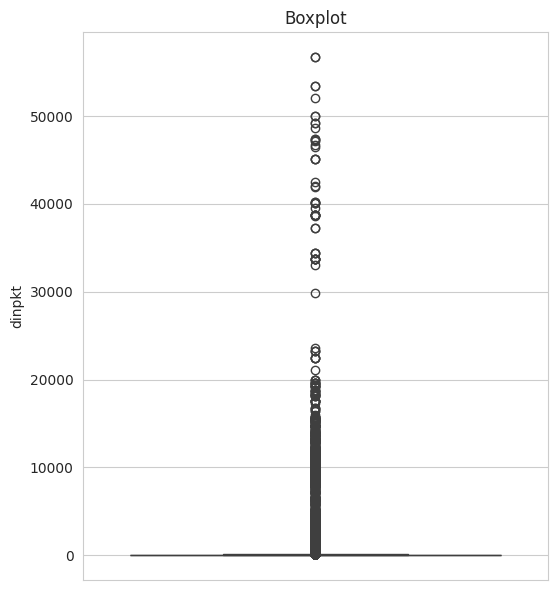

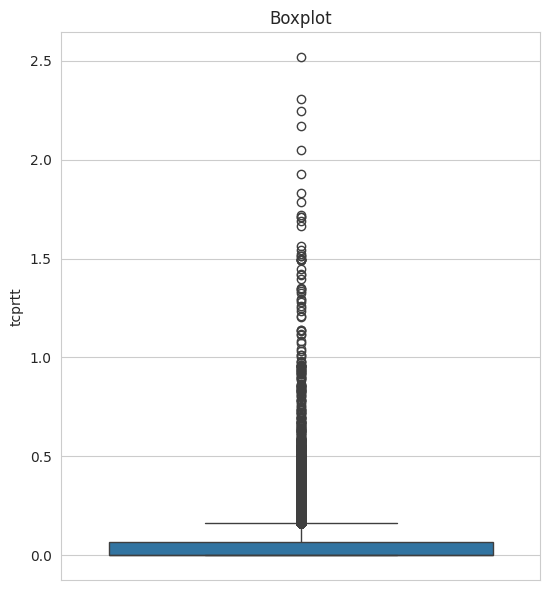

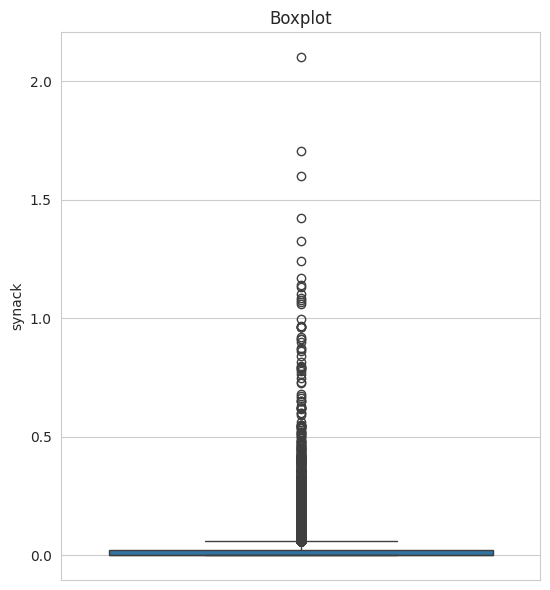

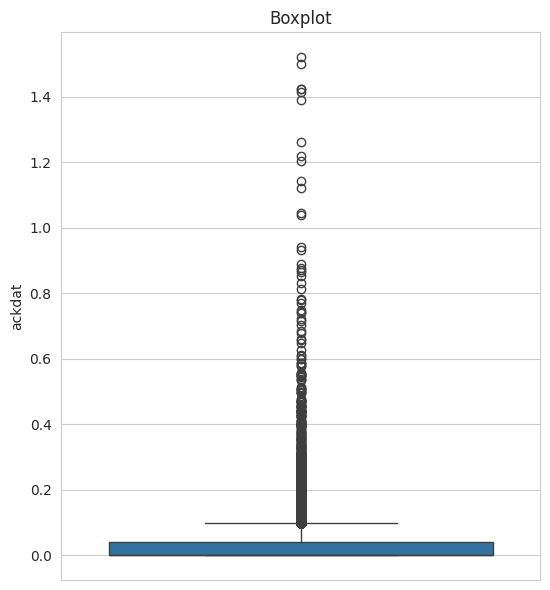

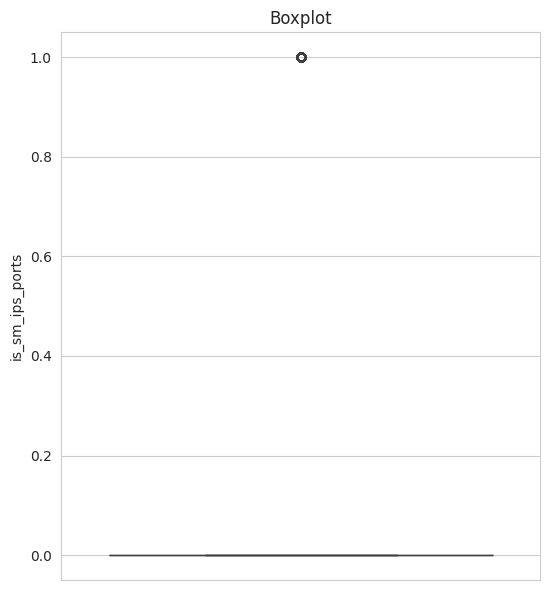

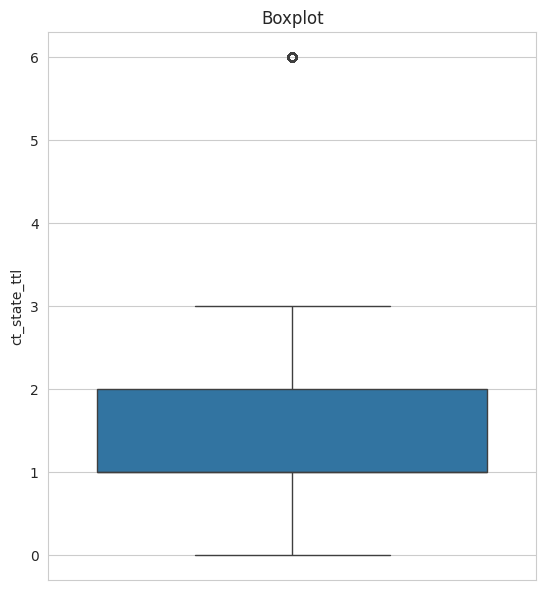

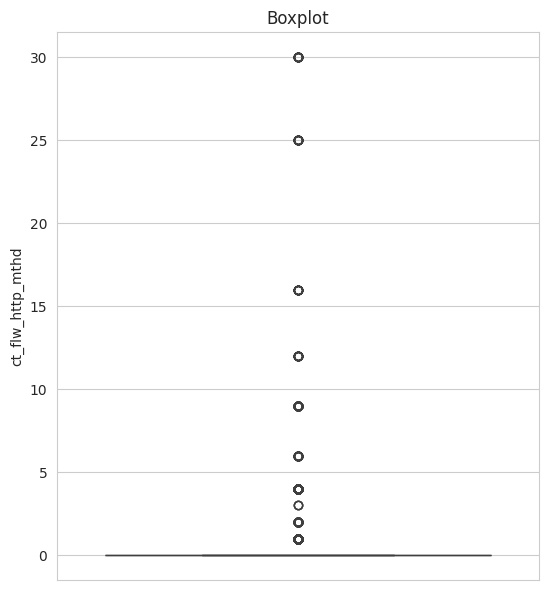

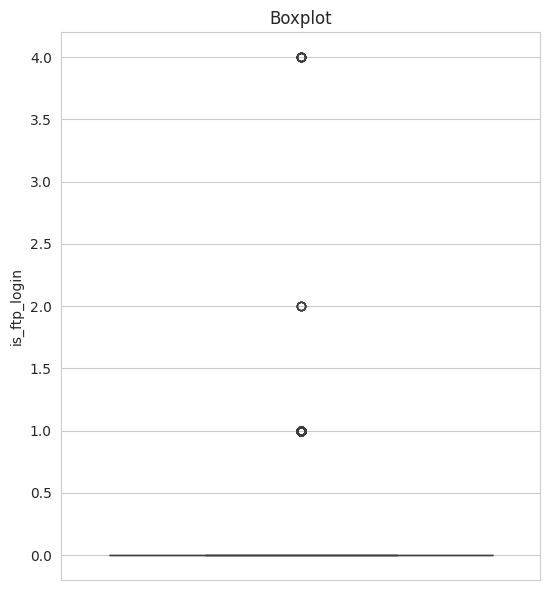

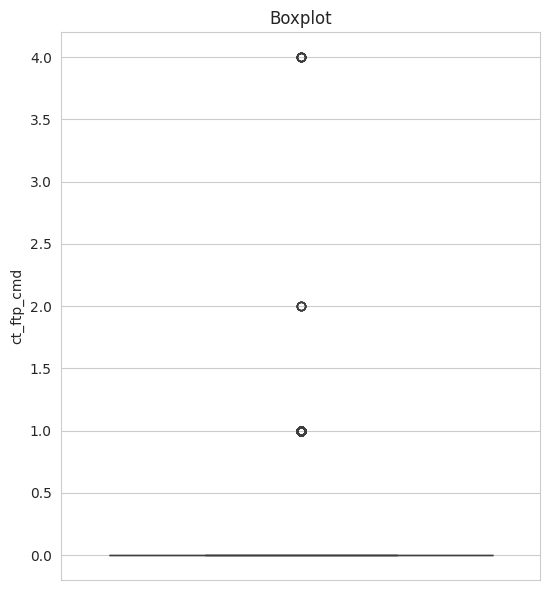

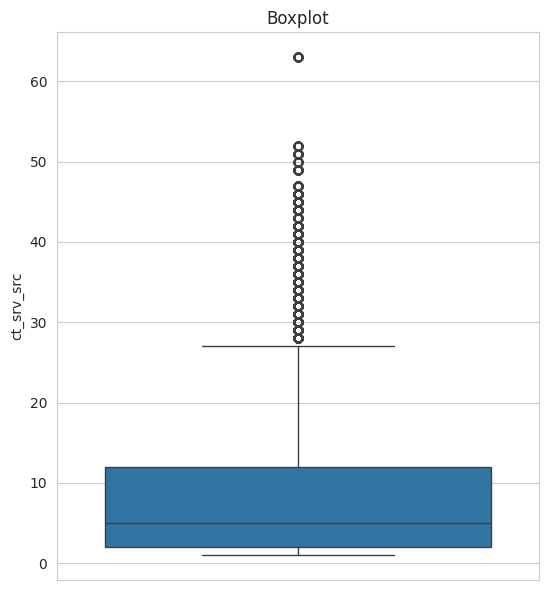

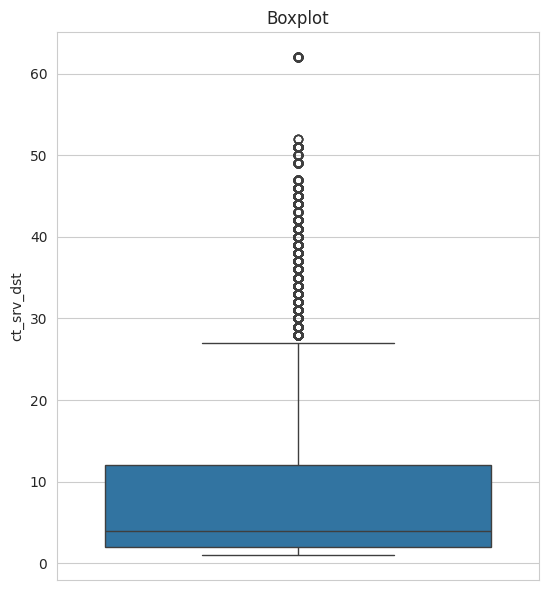

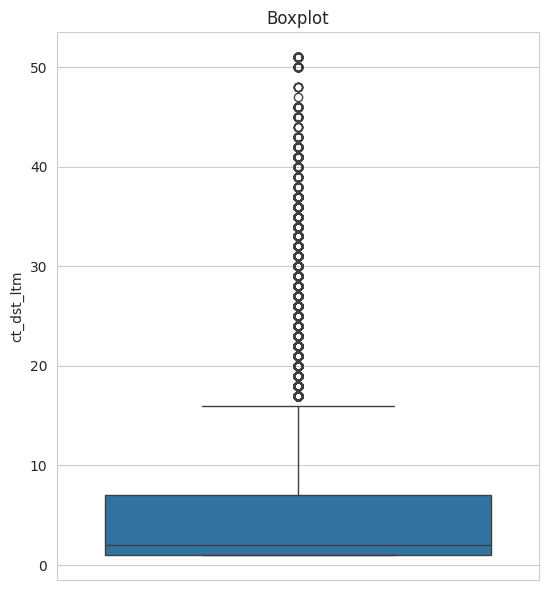

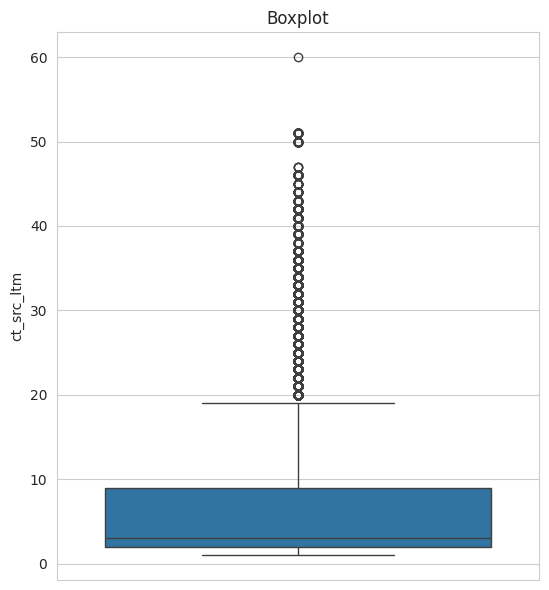

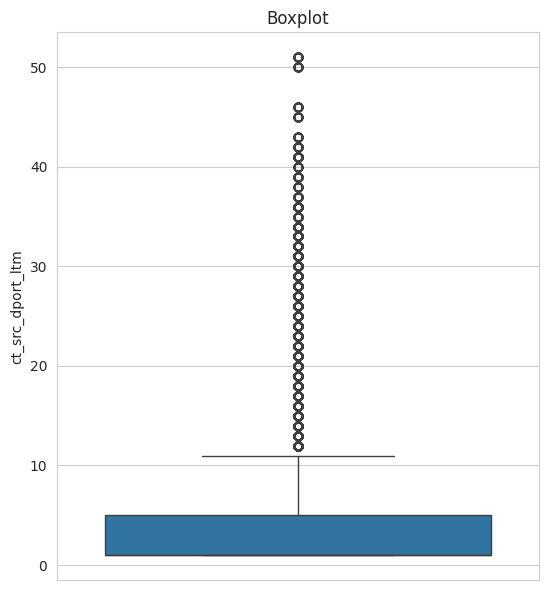

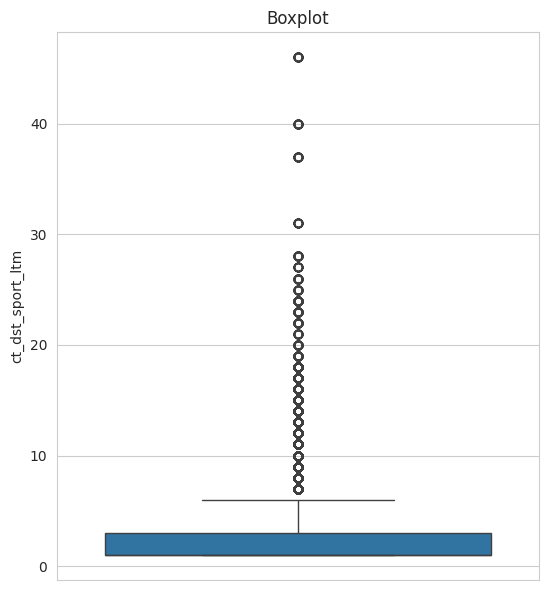

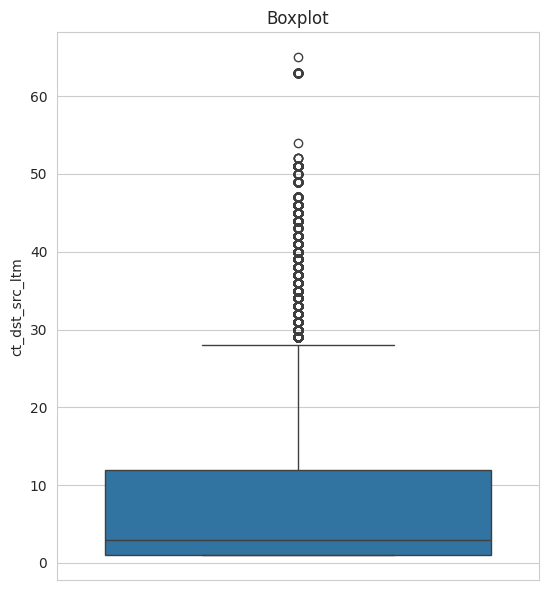

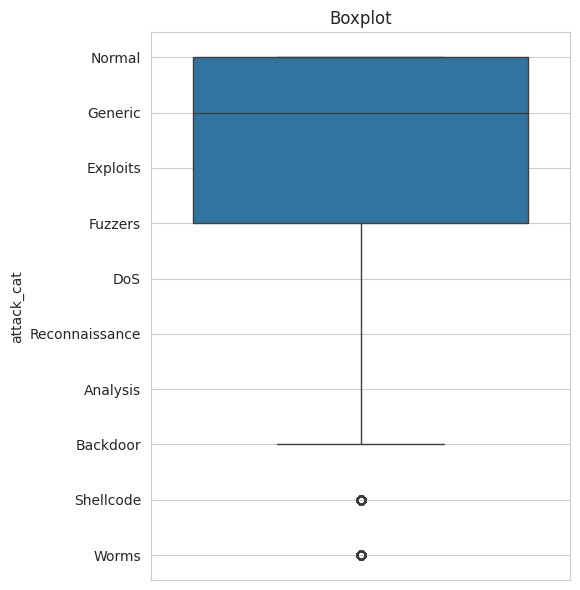

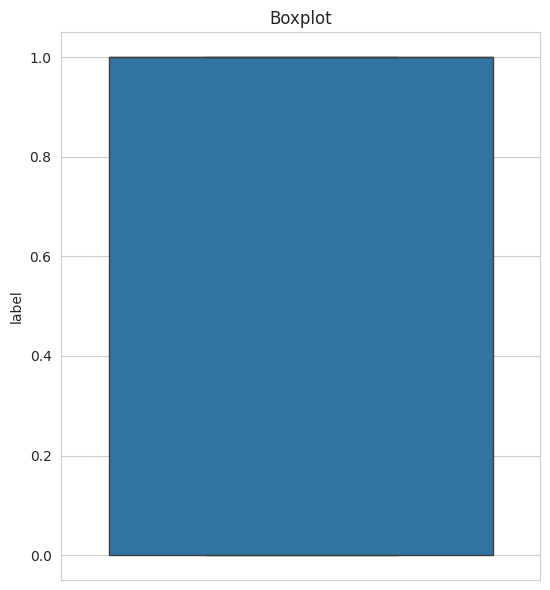

In [ ]:
sns.set_style('whitegrid')

def visualize_data(df):
  for col in df:
    if col == "proto":
      plt.figure(figsize=(16, 40))

      plt.subplot(1, 3, 3)
      sns.boxplot(df[col])
      plt.title("Boxplot")

      plt.tight_layout()
      plt.show()
    else:
      plt.figure(figsize=(16, 6))

      plt.subplot(1, 3, 3)
      sns.boxplot(df[col])
      plt.title("Boxplot")

      plt.tight_layout()
      plt.show()

df_temp = df_train.drop('id', axis = 1)
visualize_data(df_temp)

Numerical features correlation

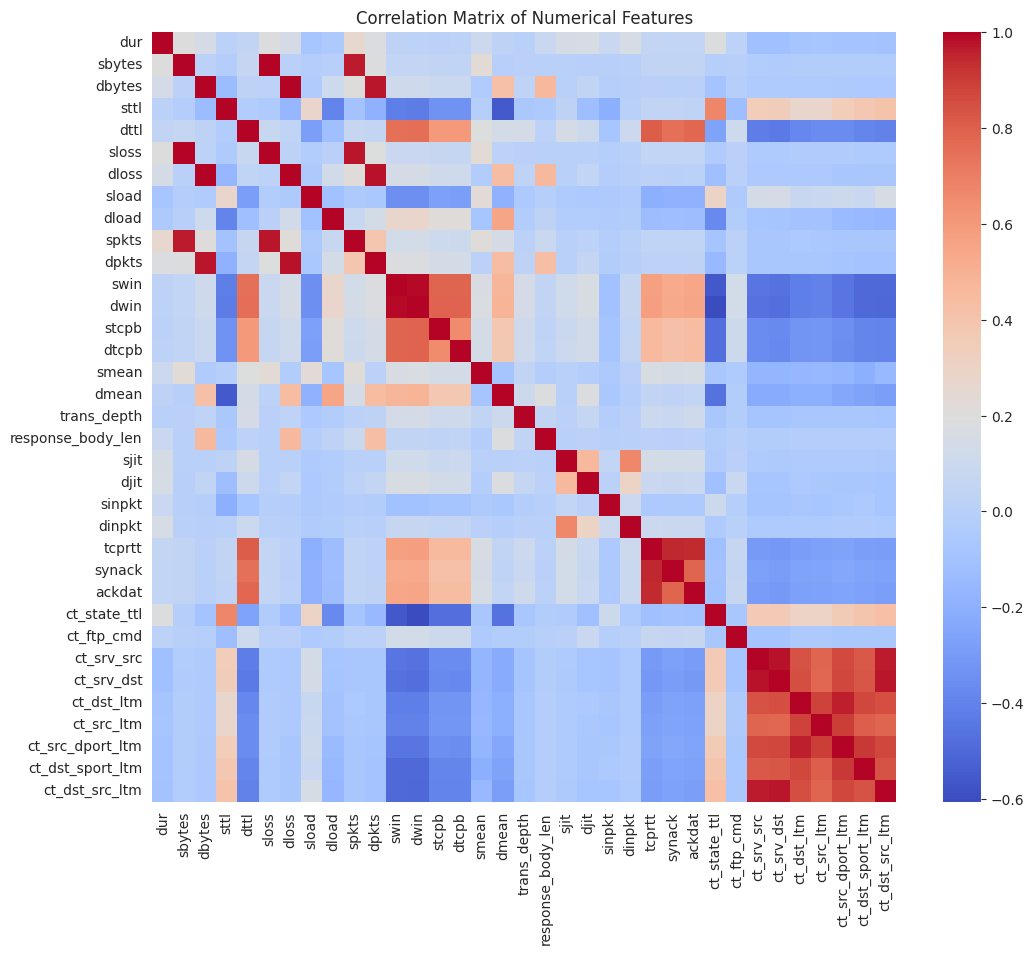

In [ ]:
df_numeric_no_id = df_numeric.drop(columns=['id'])

# Calculate the correlation matrix
correlation_matrix = df_numeric_no_id.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [ ]:
# function to display the styled table
def display_styled_table(crosstab_df, title):
    styled_table = crosstab_df.style.set_caption(title) \
                                     .background_gradient(cmap='Blues', axis=None) \
                                     .set_properties(**{'border': '1px solid black', 'padding': '5px'}) \
                                     .set_table_styles([{'selector': 'caption',
                                                         'props': [('color', 'white'),
                                                                   ('font-size', '16px'),
                                                                   ('text-align', 'center')]}])
    display(styled_table)

Categorical values correlation

In [ ]:
columnToCheck = ['proto', 'state', 'service','is_sm_ips_ports','ct_flw_http_mthd','is_ftp_login']
for i in range(len(columnToCheck)):
  for j in range(i + 1, len(columnToCheck)):
    cont = pd.crosstab(df_train[columnToCheck[i]], df_train[columnToCheck[j]])
    display_styled_table(cont, f"Correlation between {columnToCheck[i]} and {columnToCheck[j]}")

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

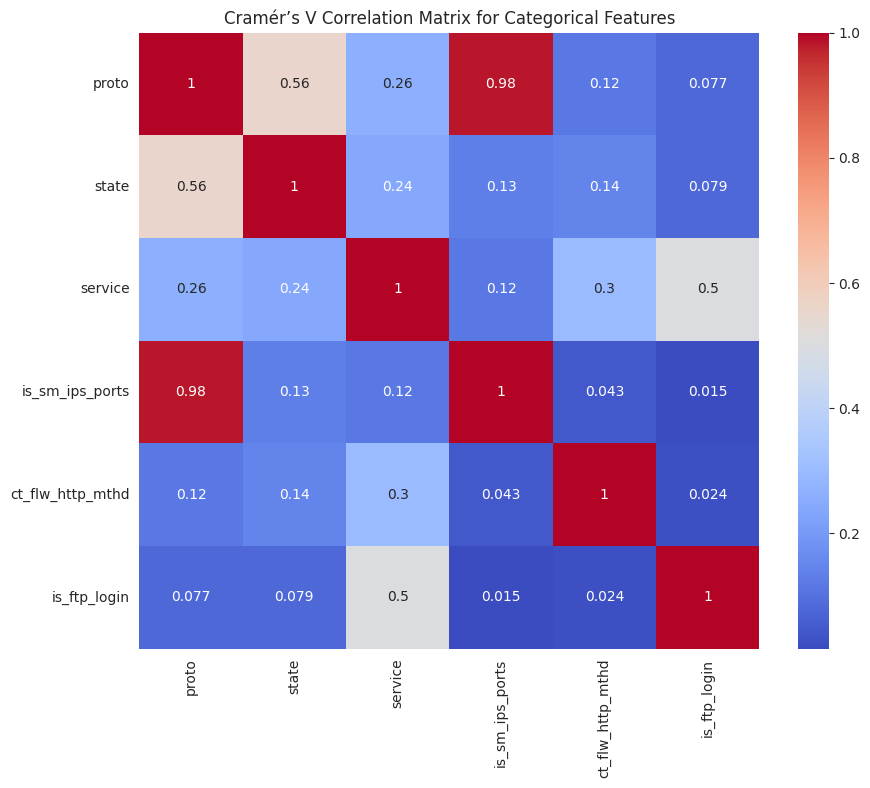

In [ ]:
# Calculate Cramér’s V for each pair of categorical features
categorical_features = ['proto', 'state', 'service', 'is_sm_ips_ports', 'ct_flw_http_mthd', 'is_ftp_login']
cramers_v_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)

for col1 in categorical_features:
    for col2 in categorical_features:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1  # Set diagonal to 1 (self-association)
        else:
            cramers_v_matrix.loc[col1, col2] = cramers_v(df_train[col1], df_train[col2])

cramers_v_matrix = cramers_v_matrix.astype(float)

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title("Cramér’s V Correlation Matrix for Categorical Features")
plt.show()

Features visualization

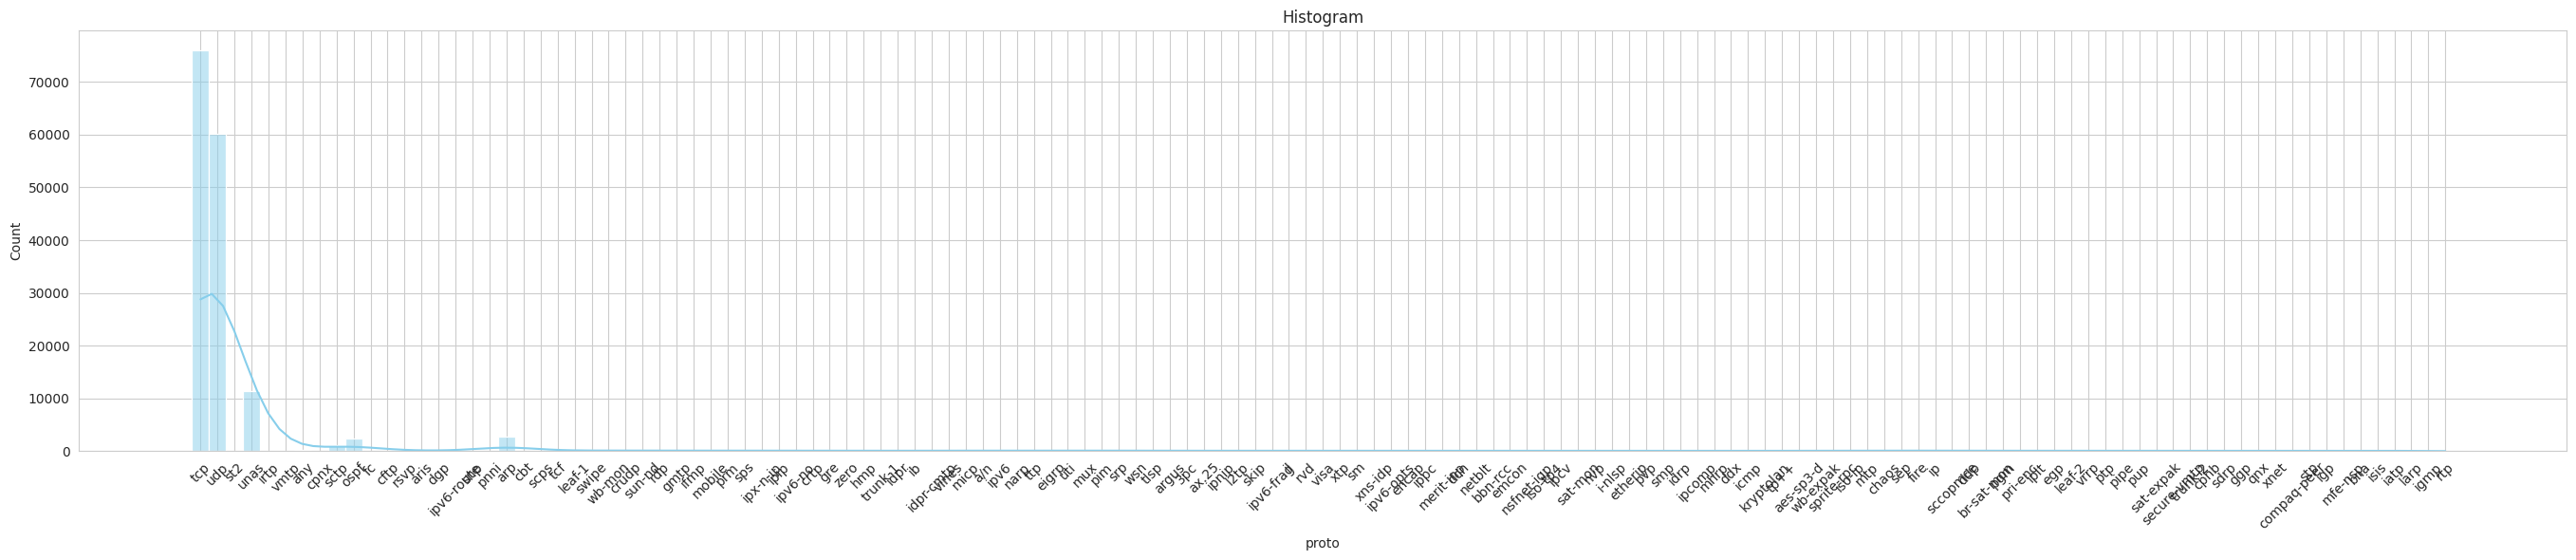

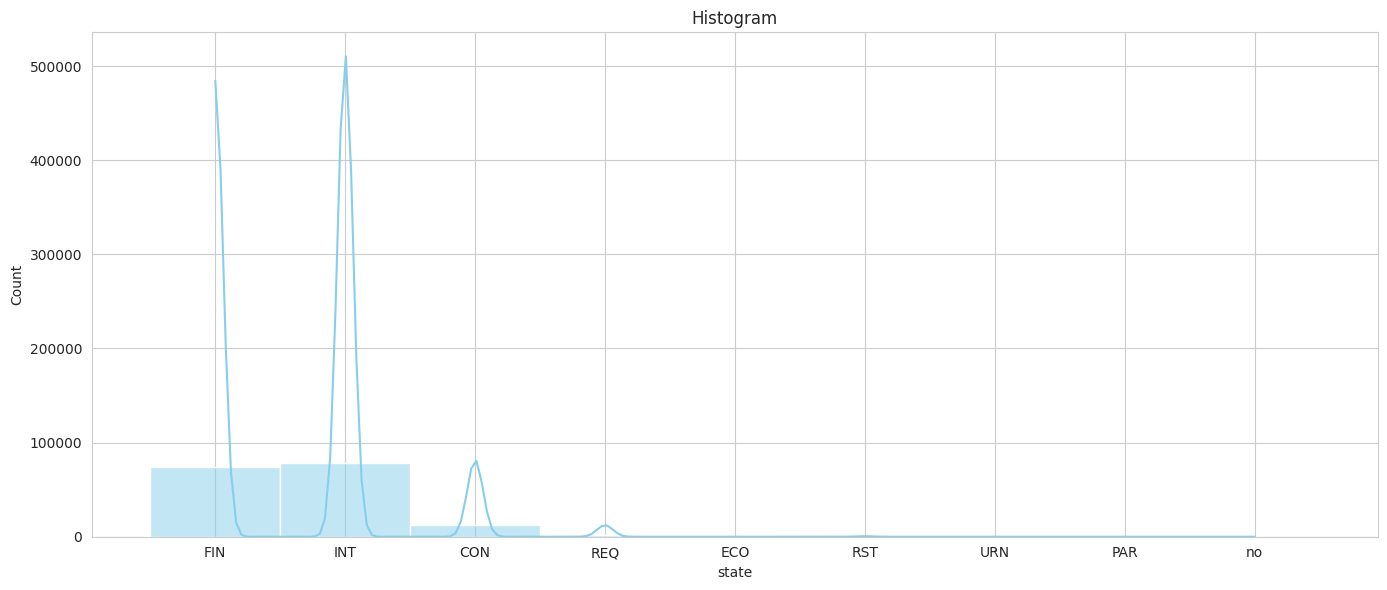

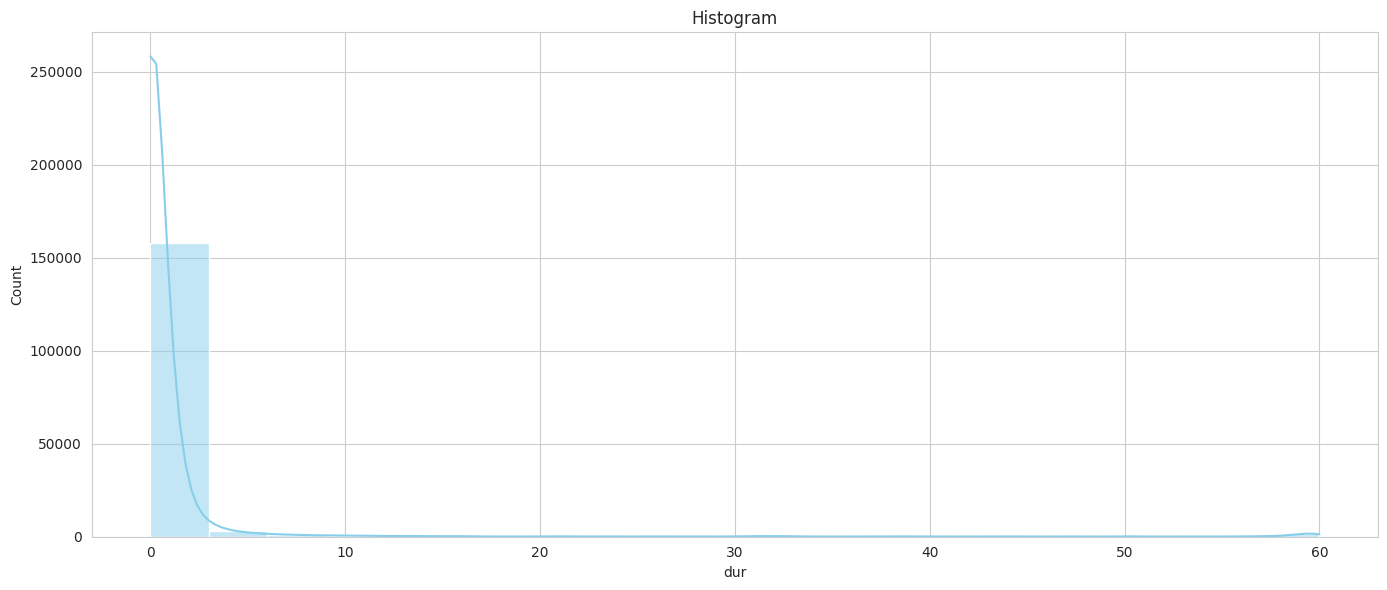

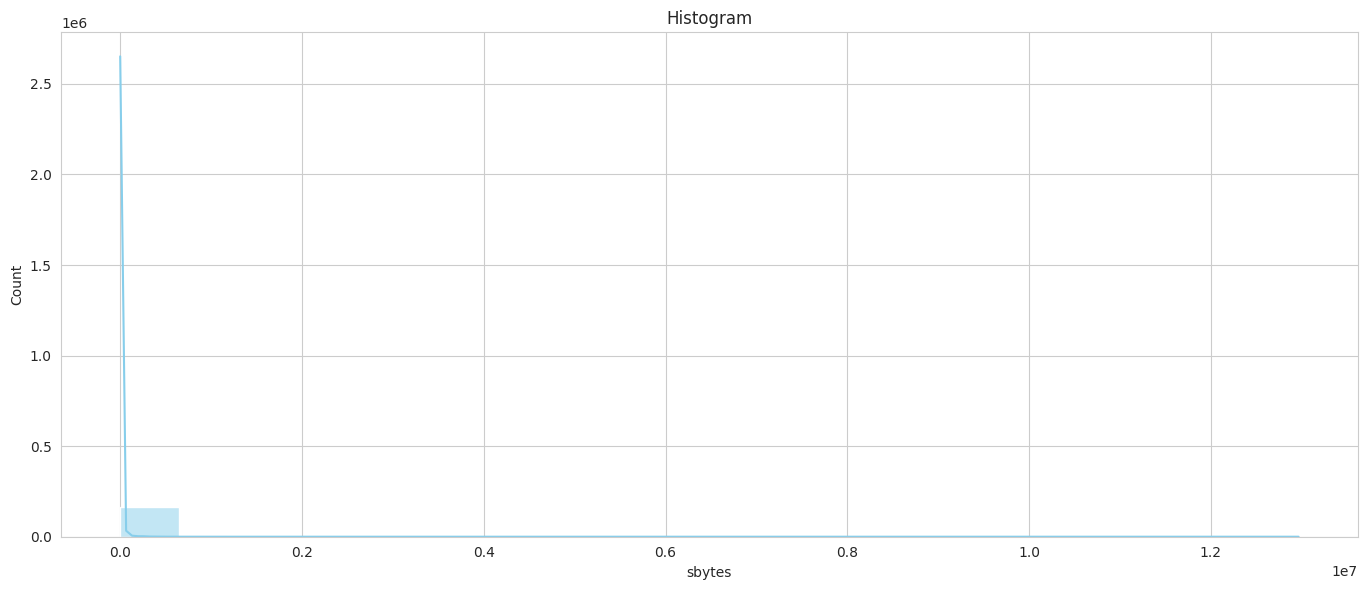

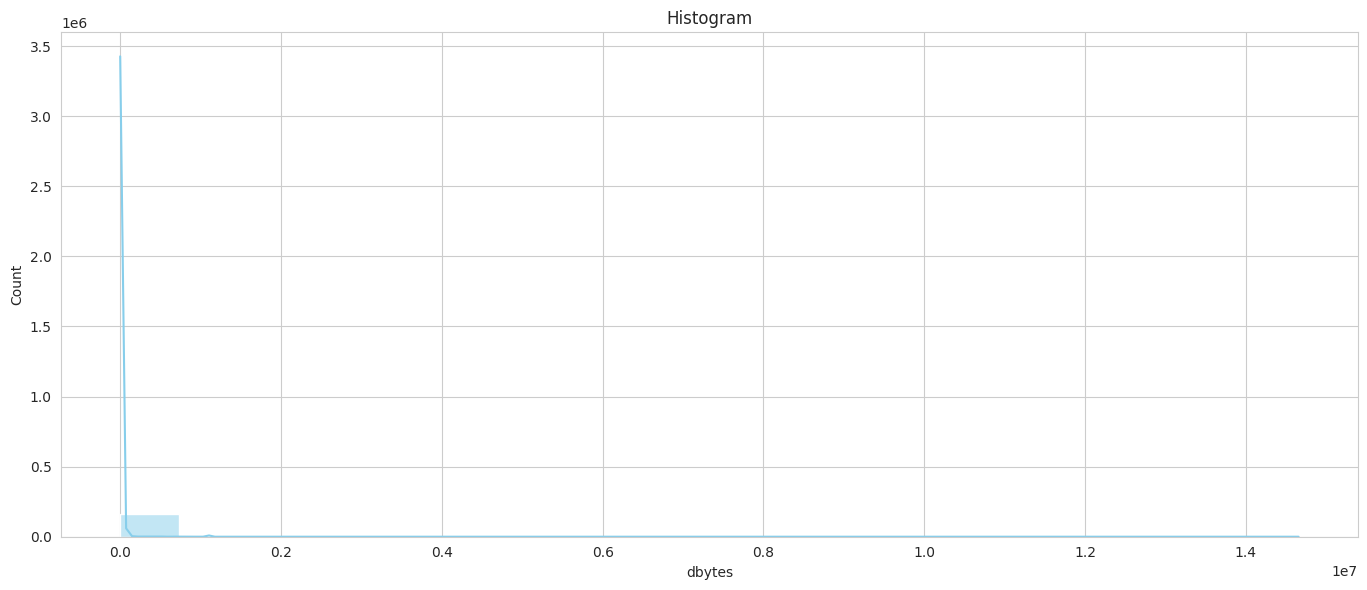

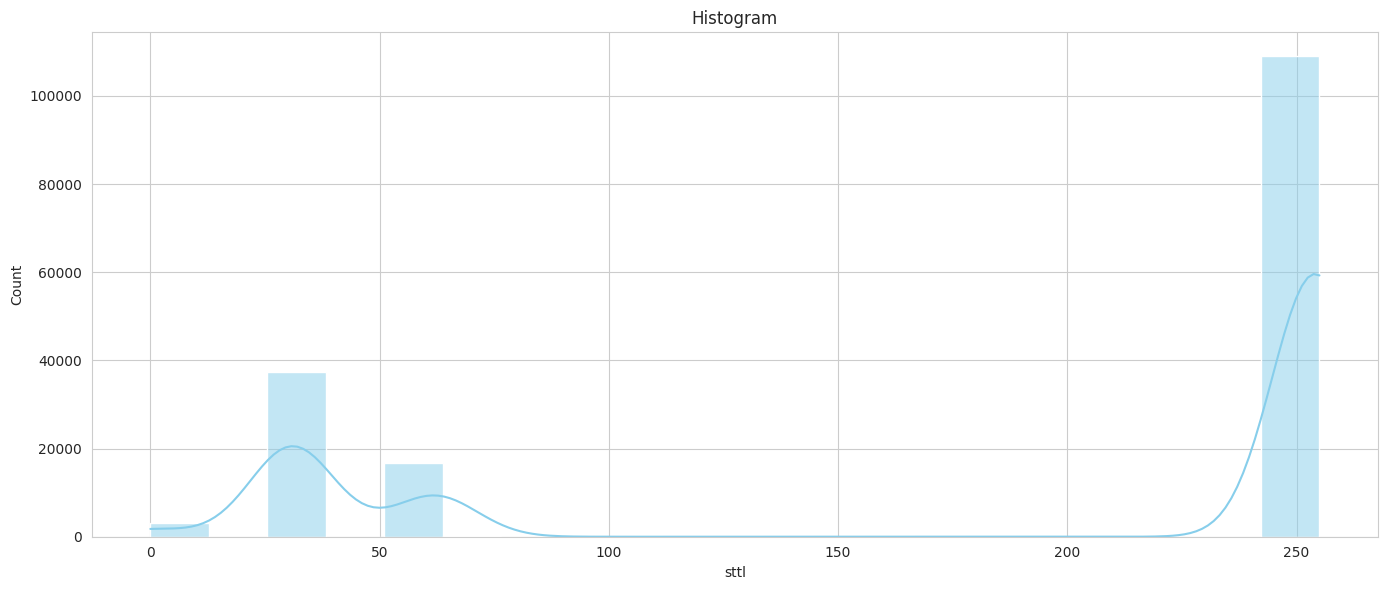

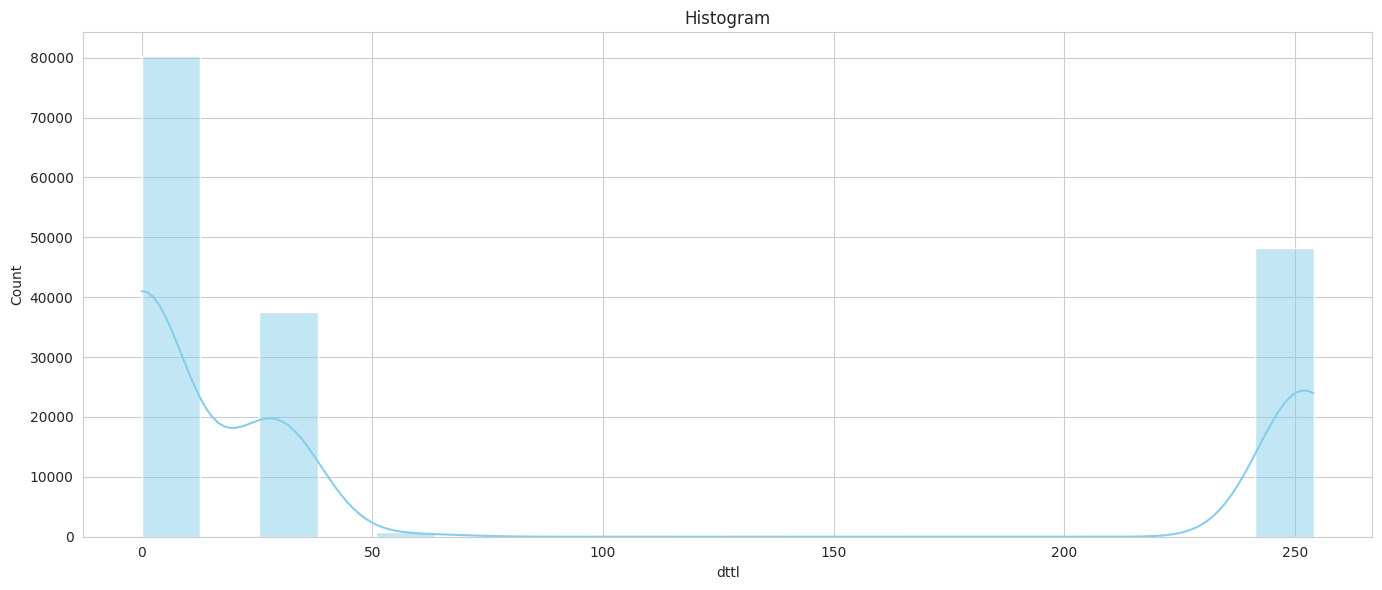

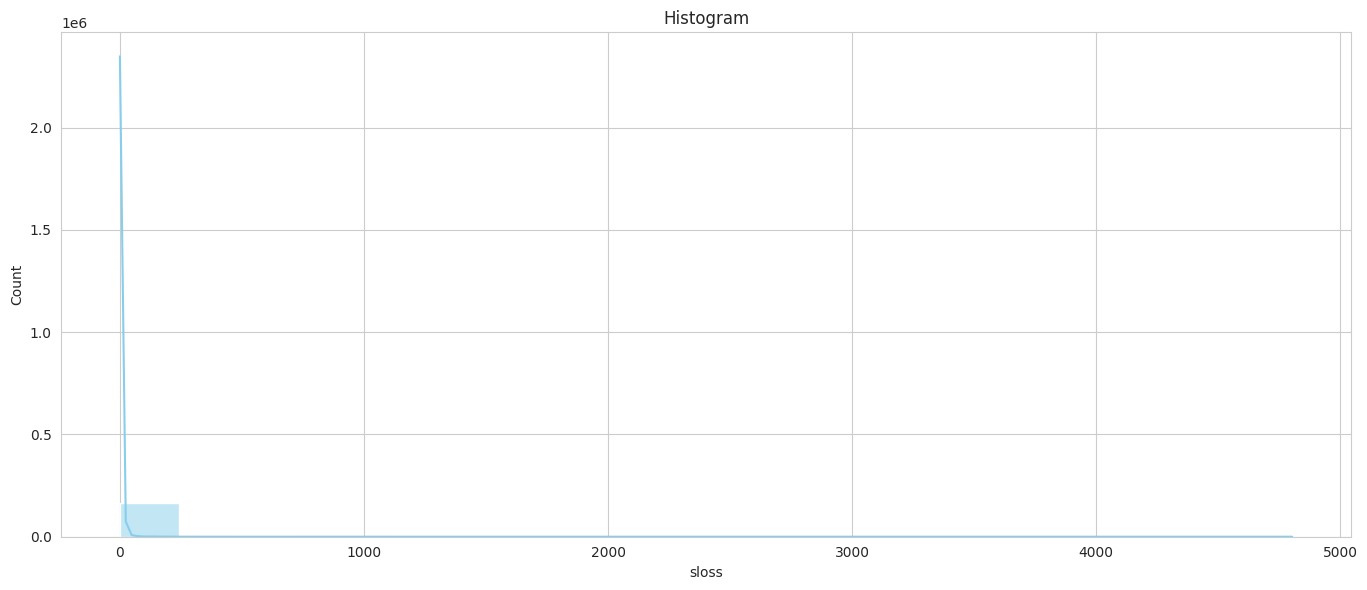

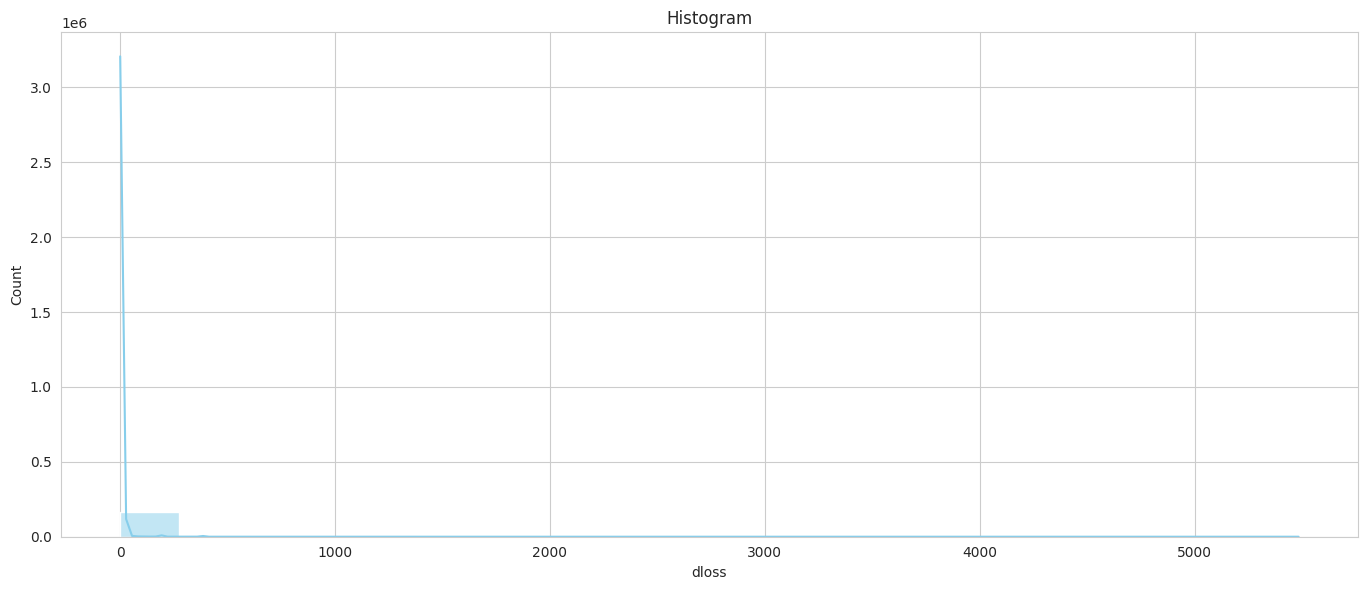

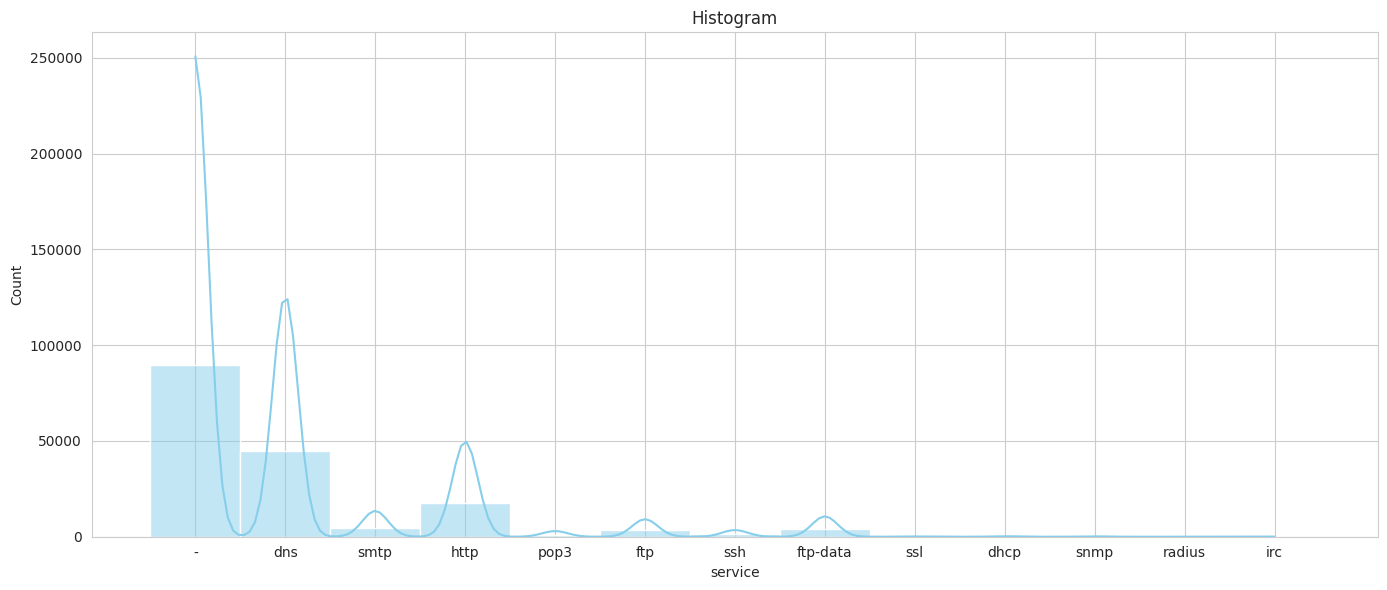

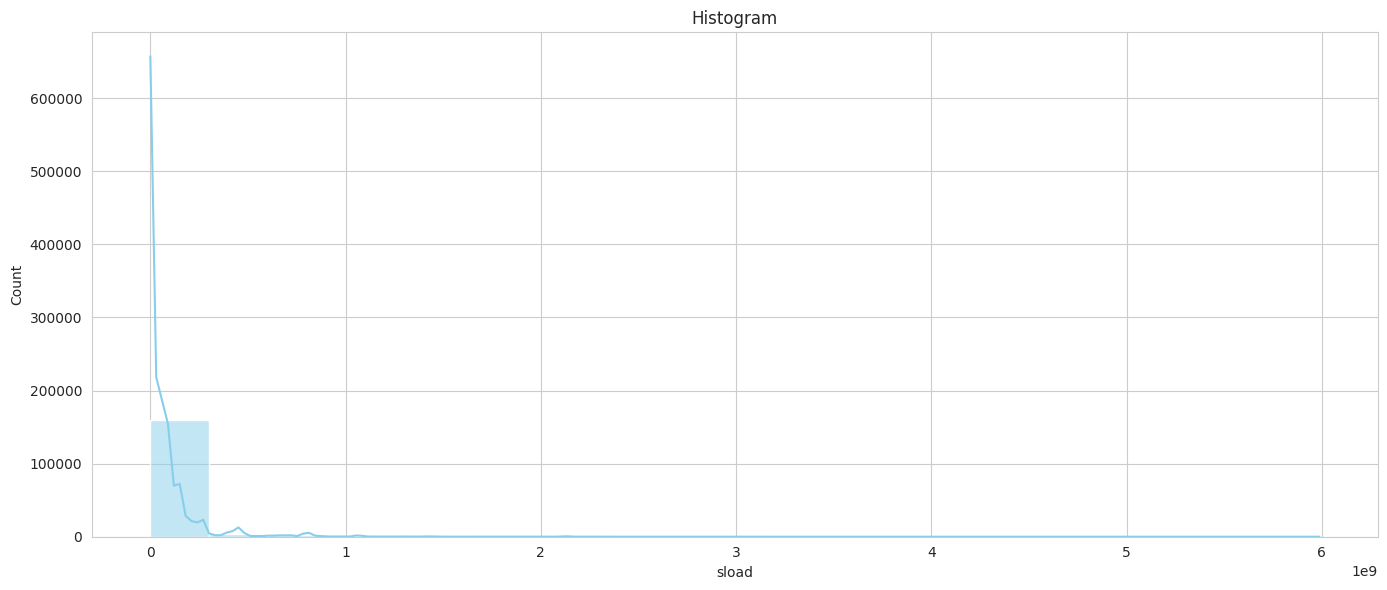

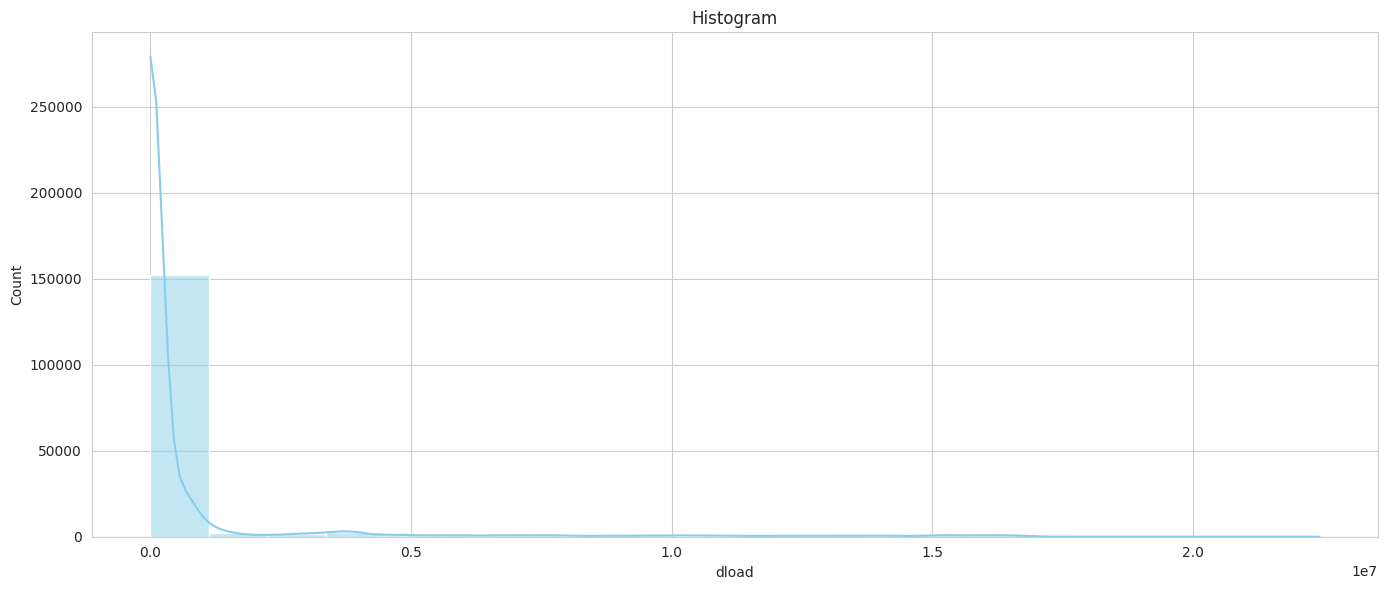

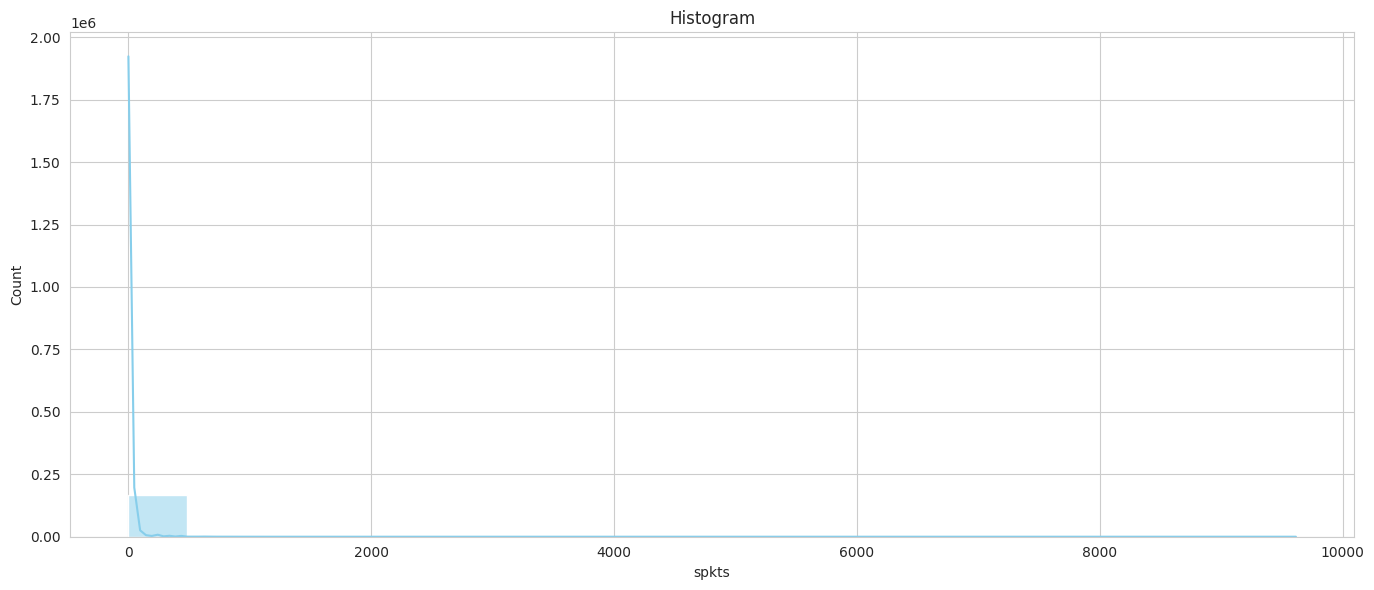

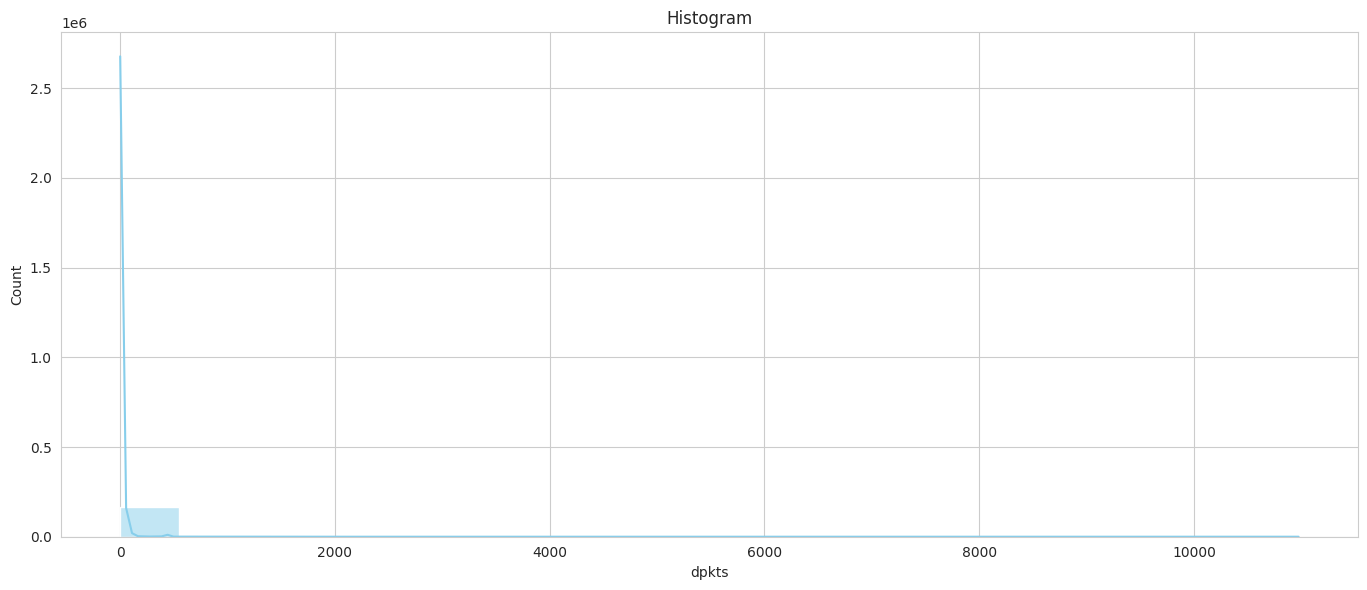

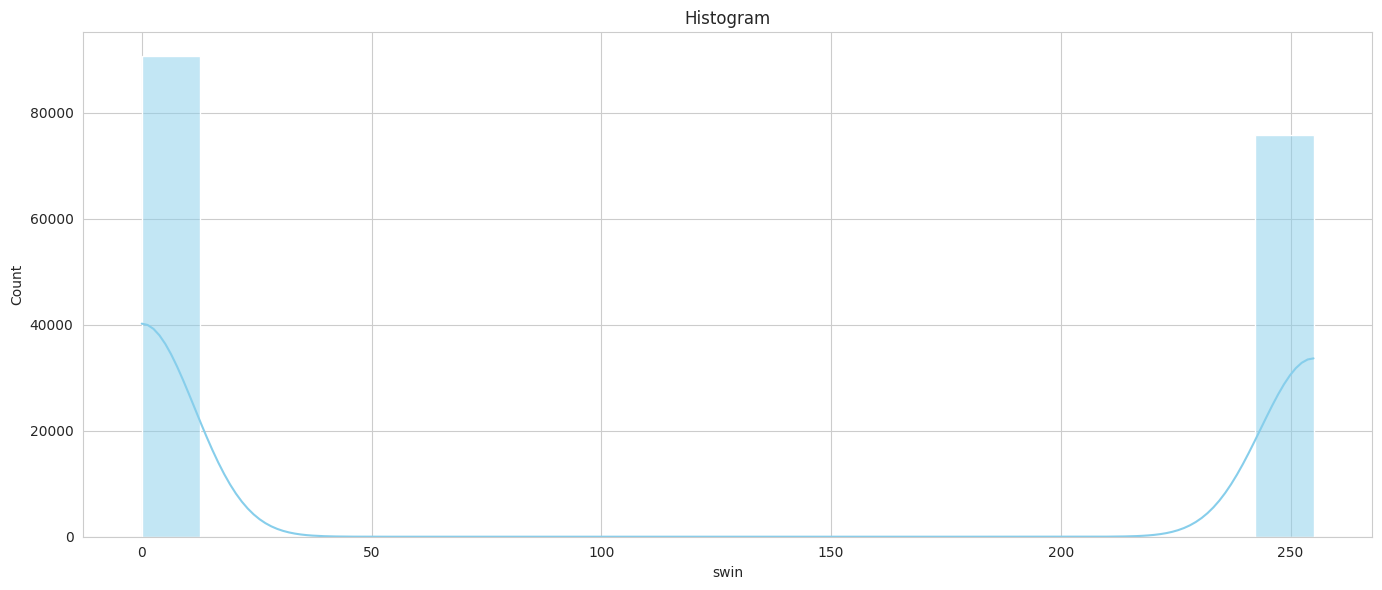

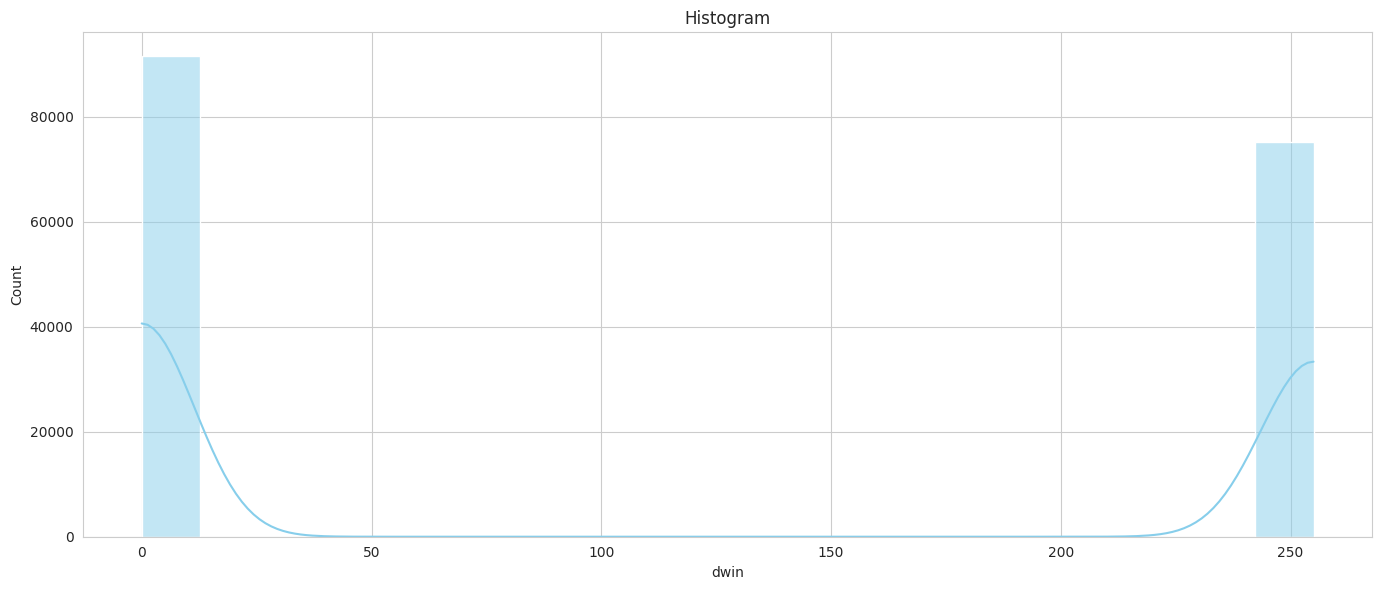

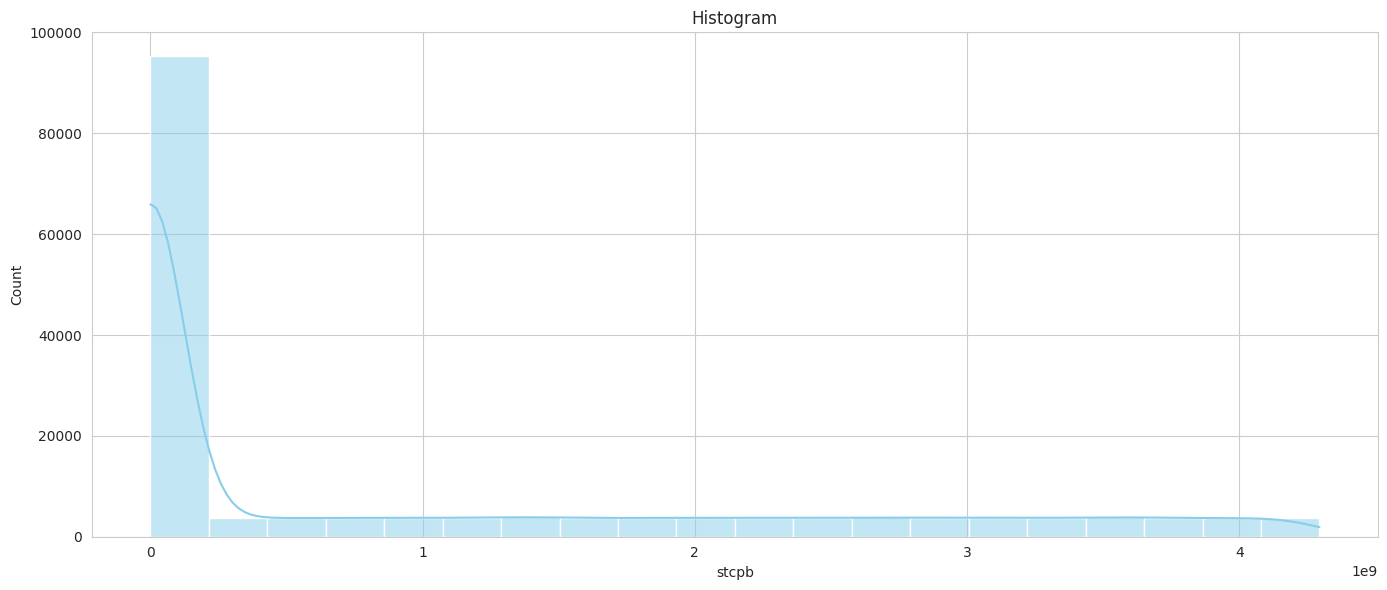

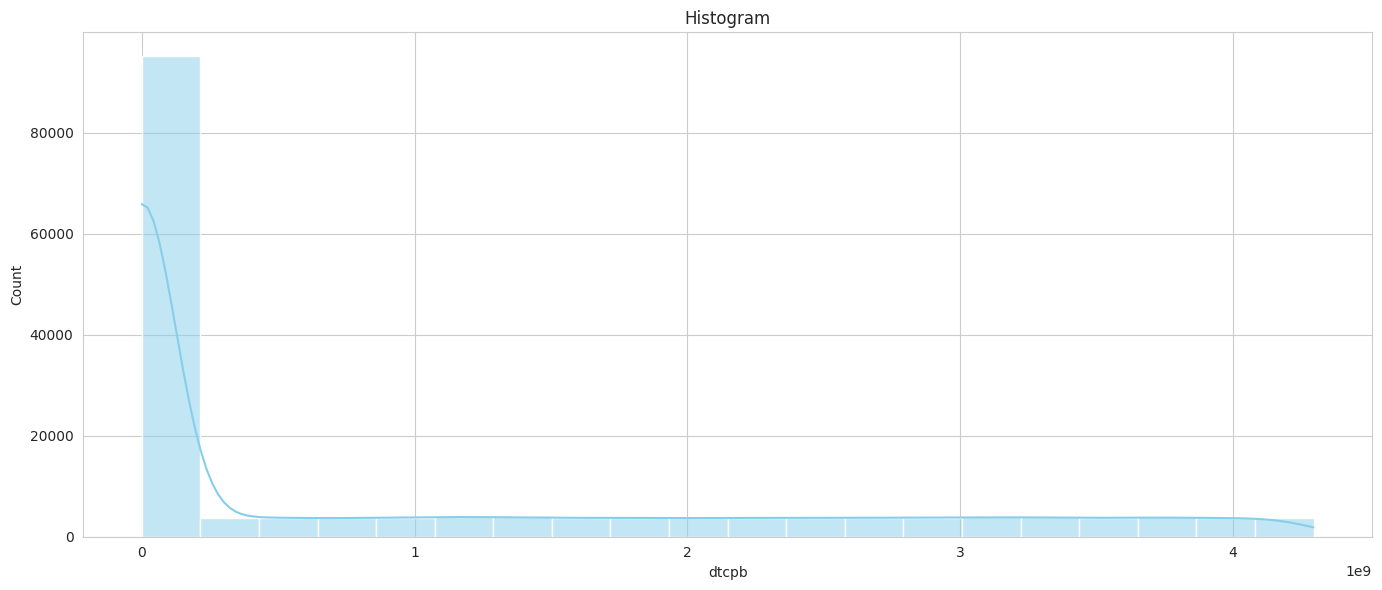

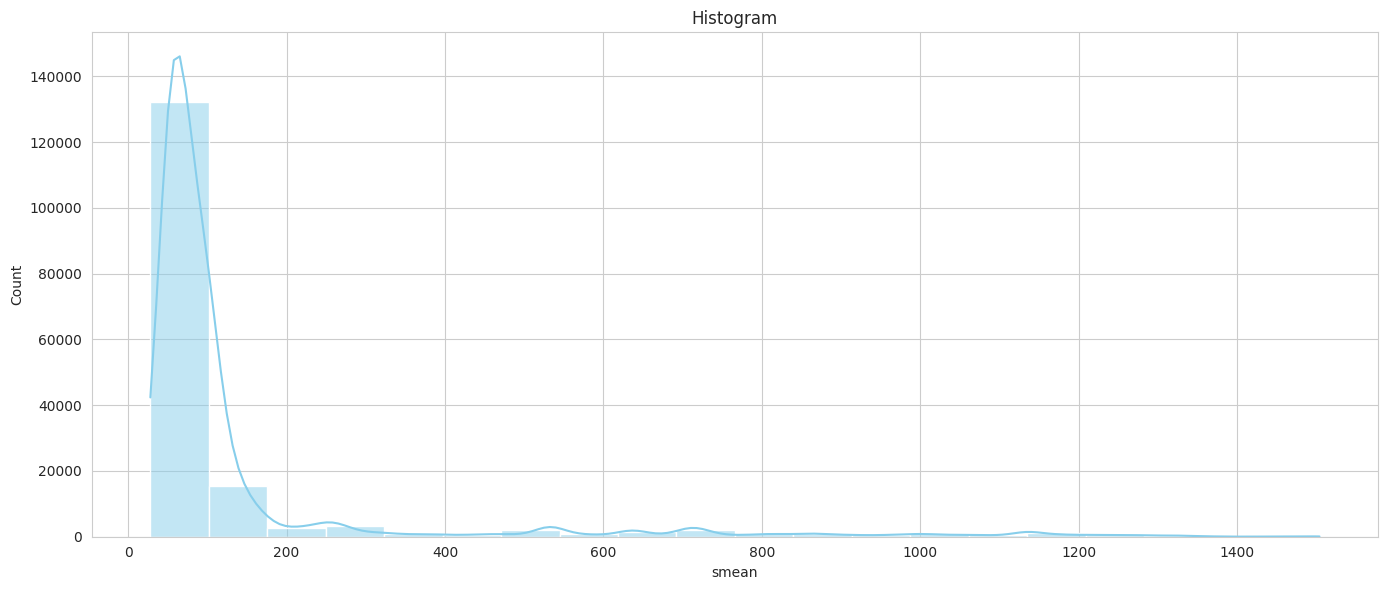

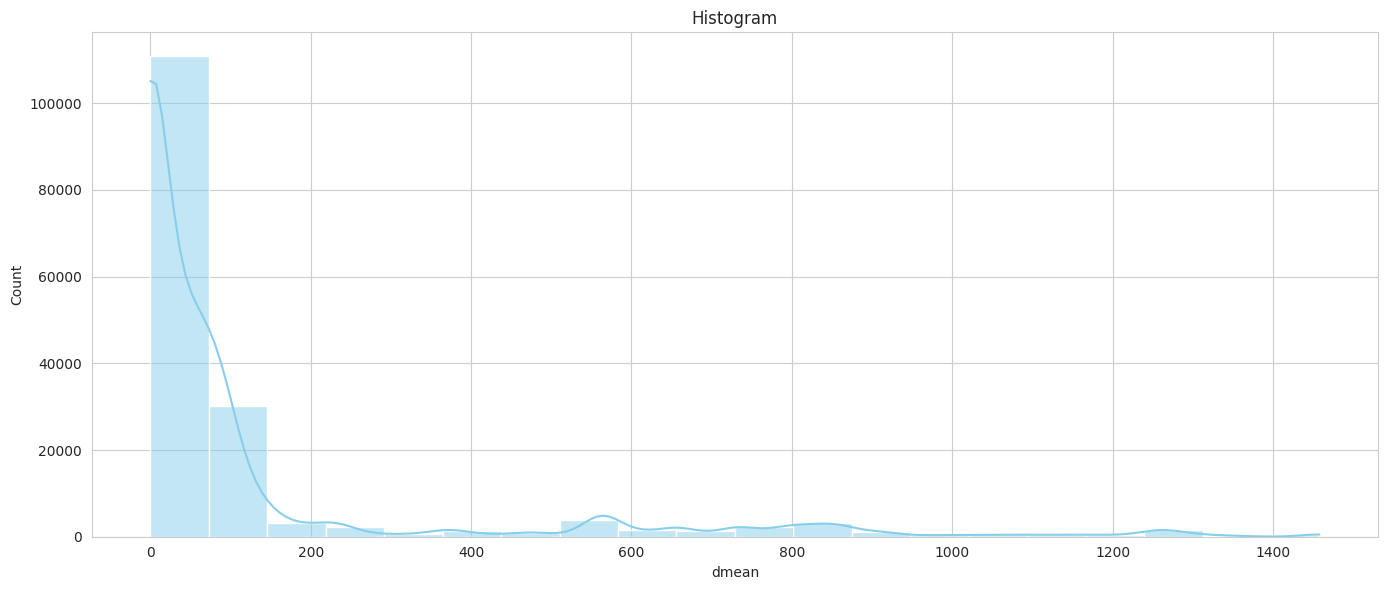

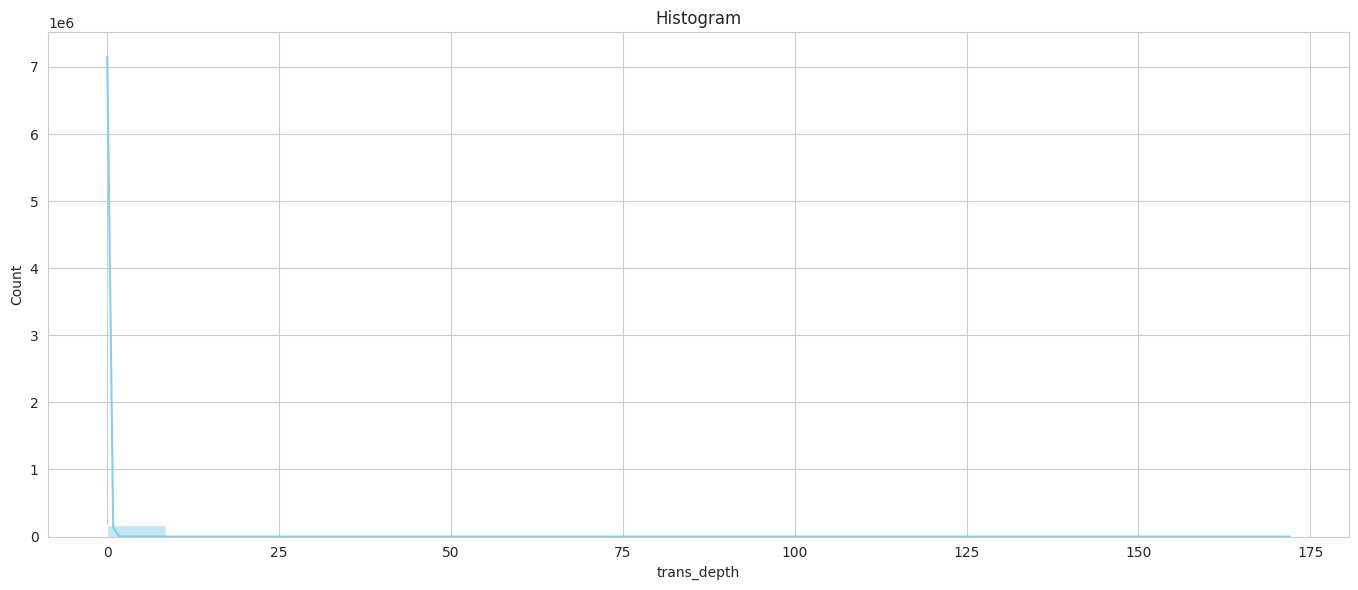

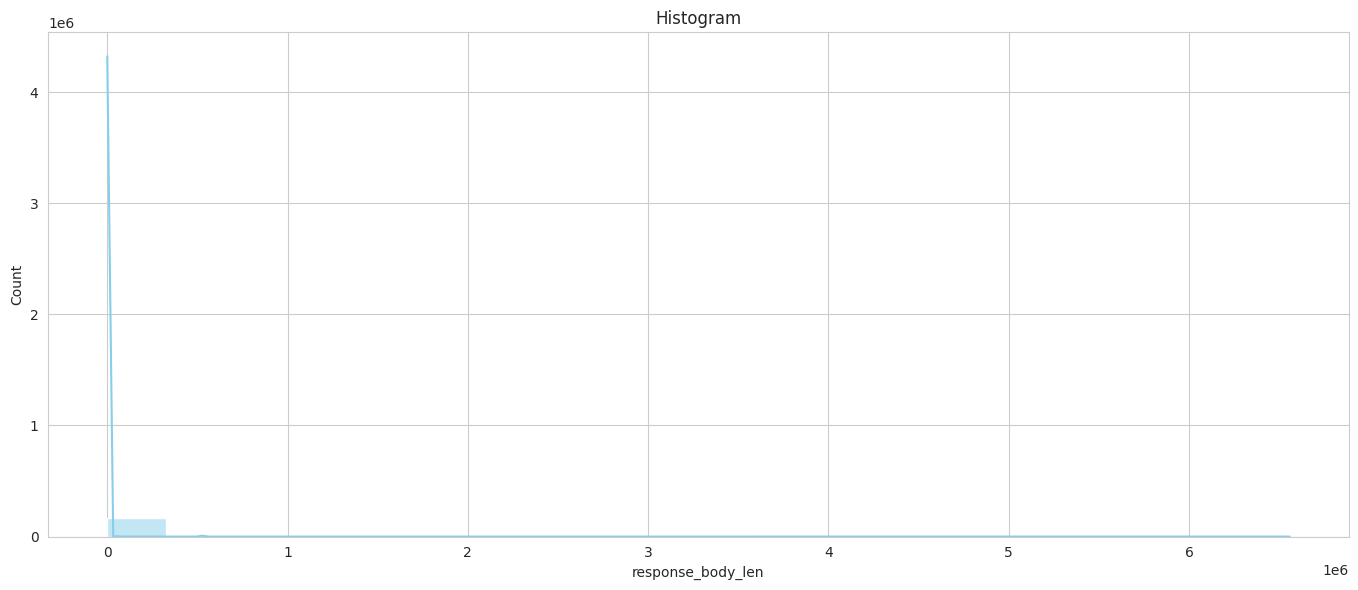

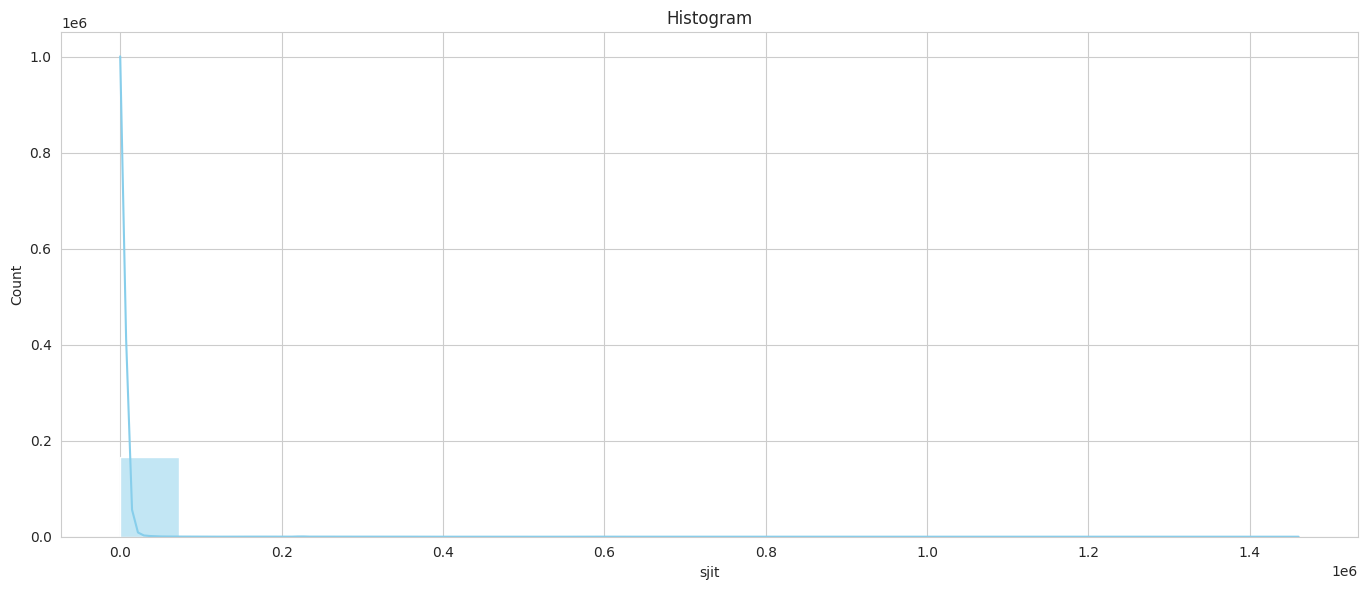

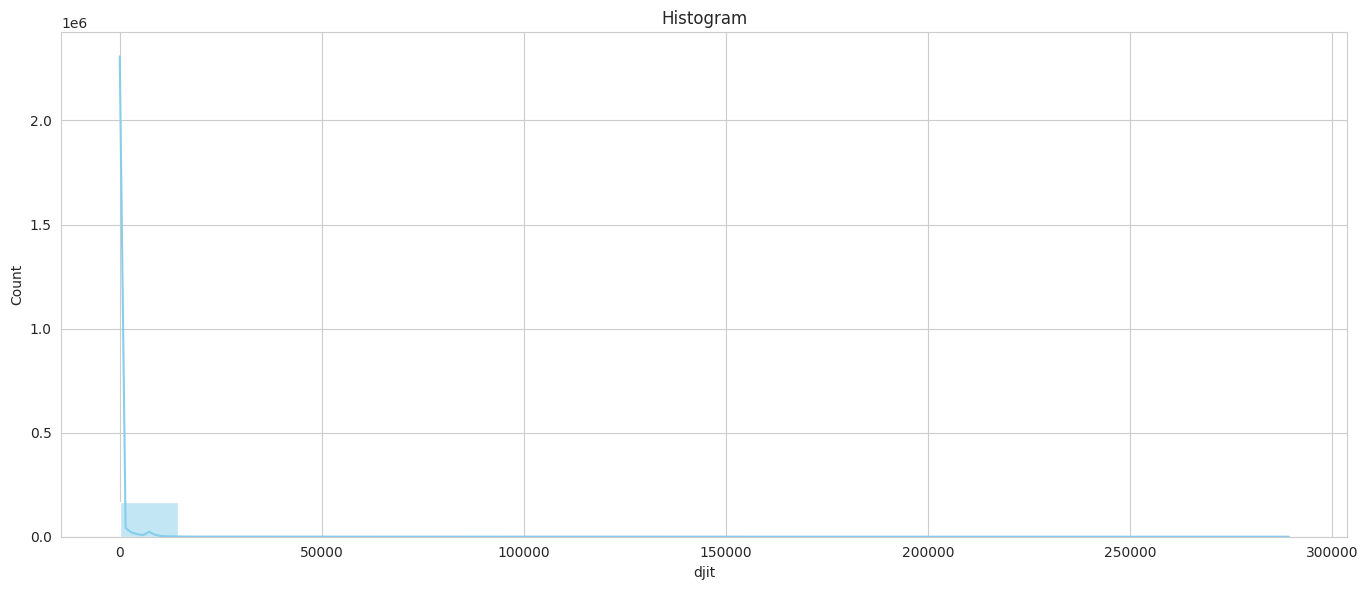

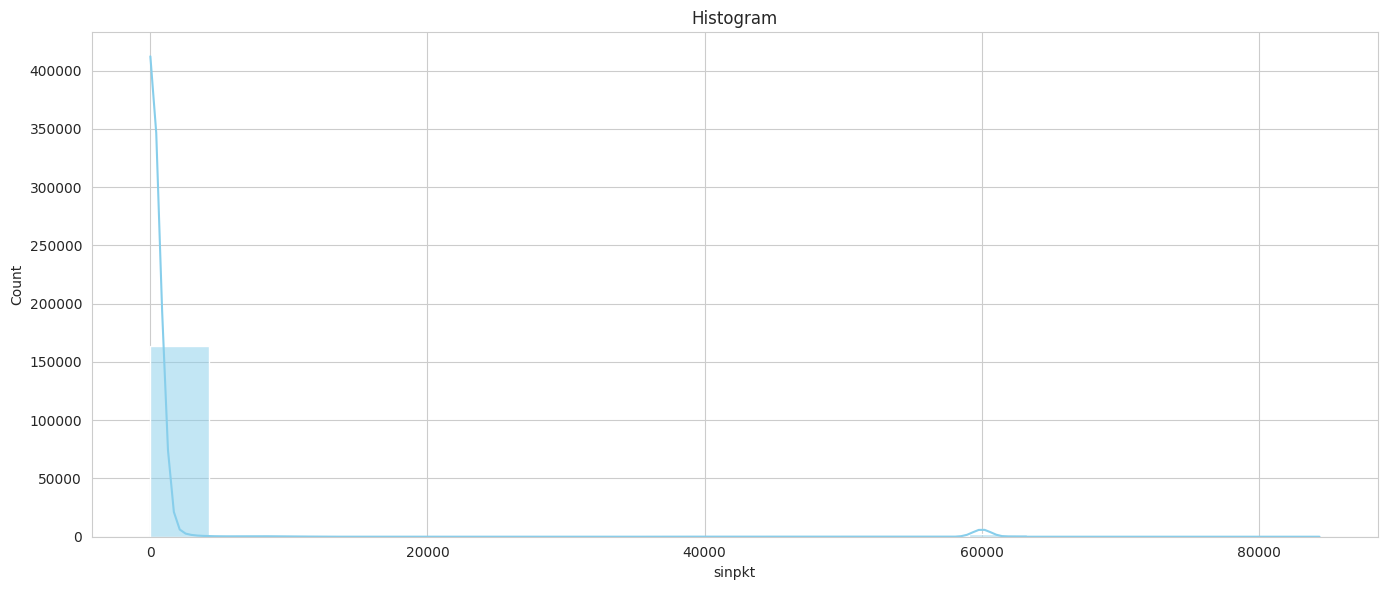

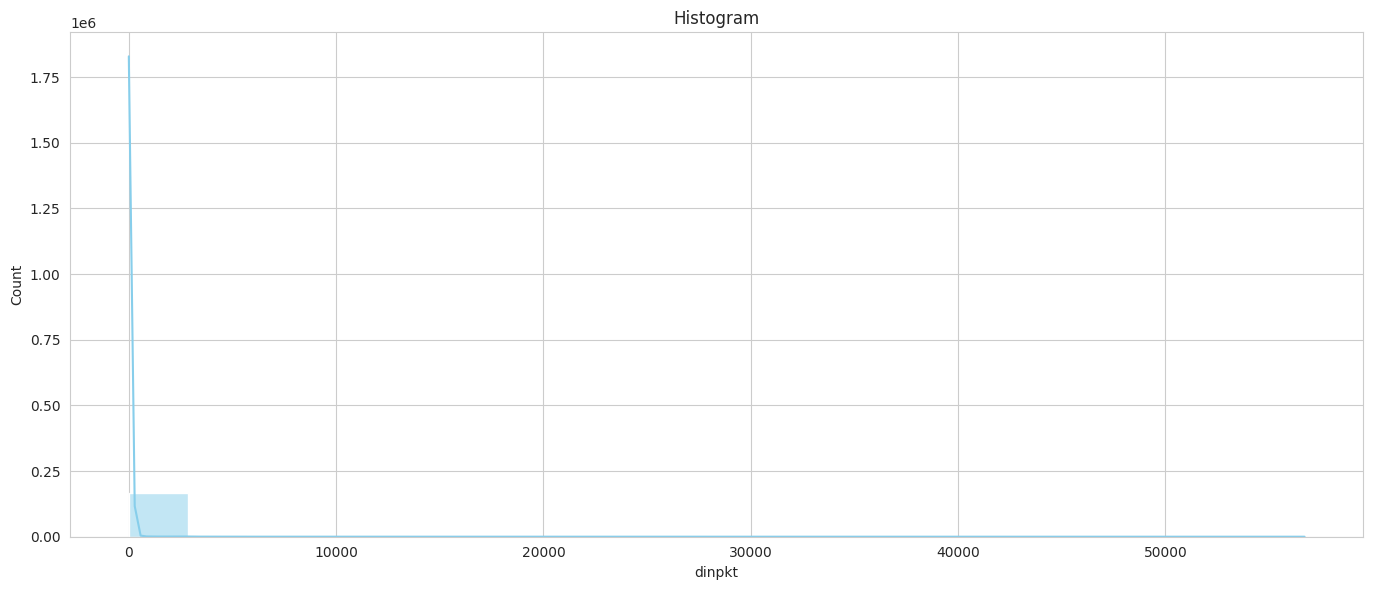

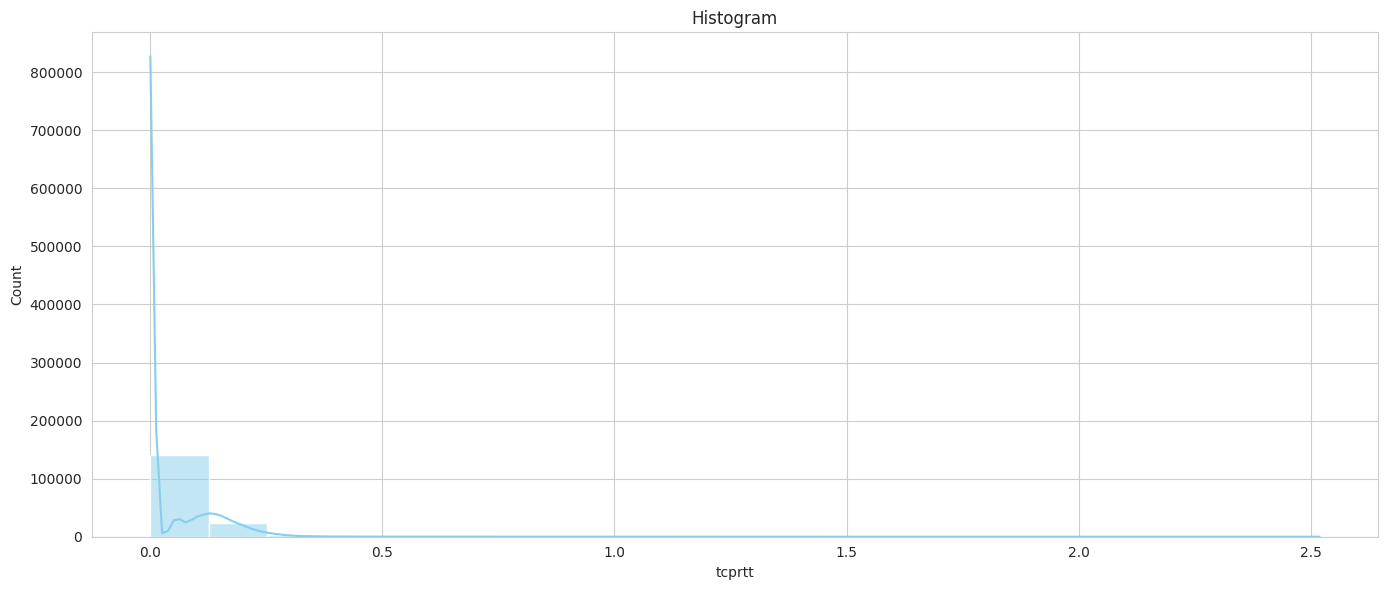

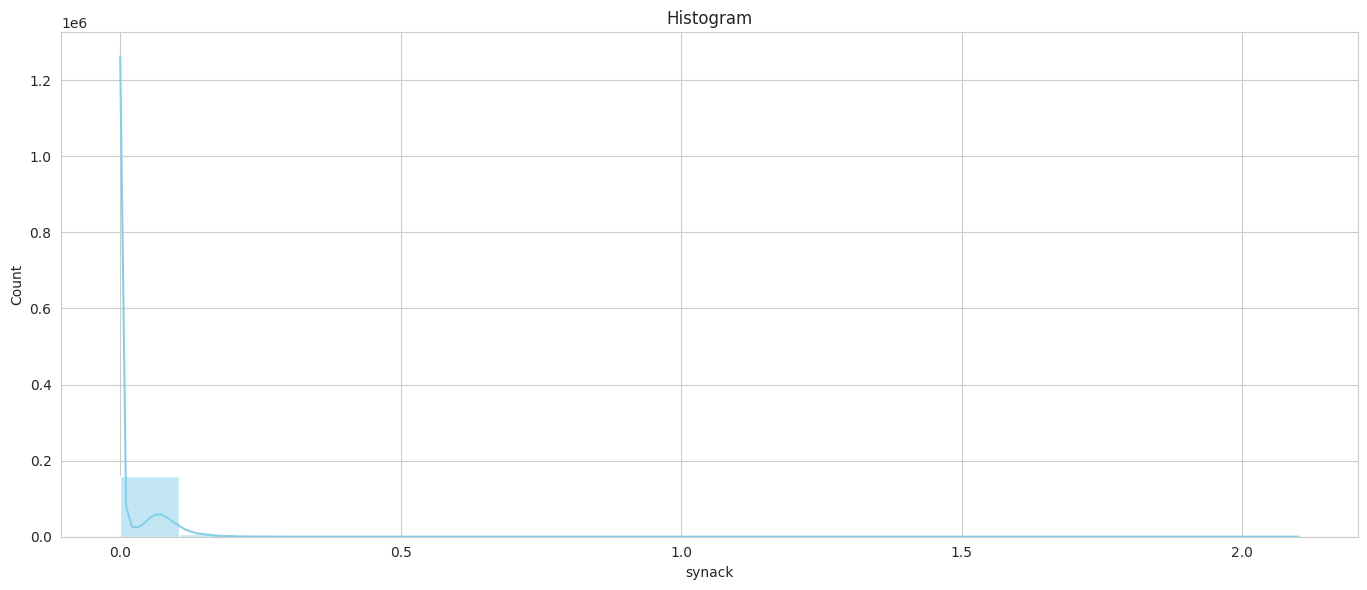

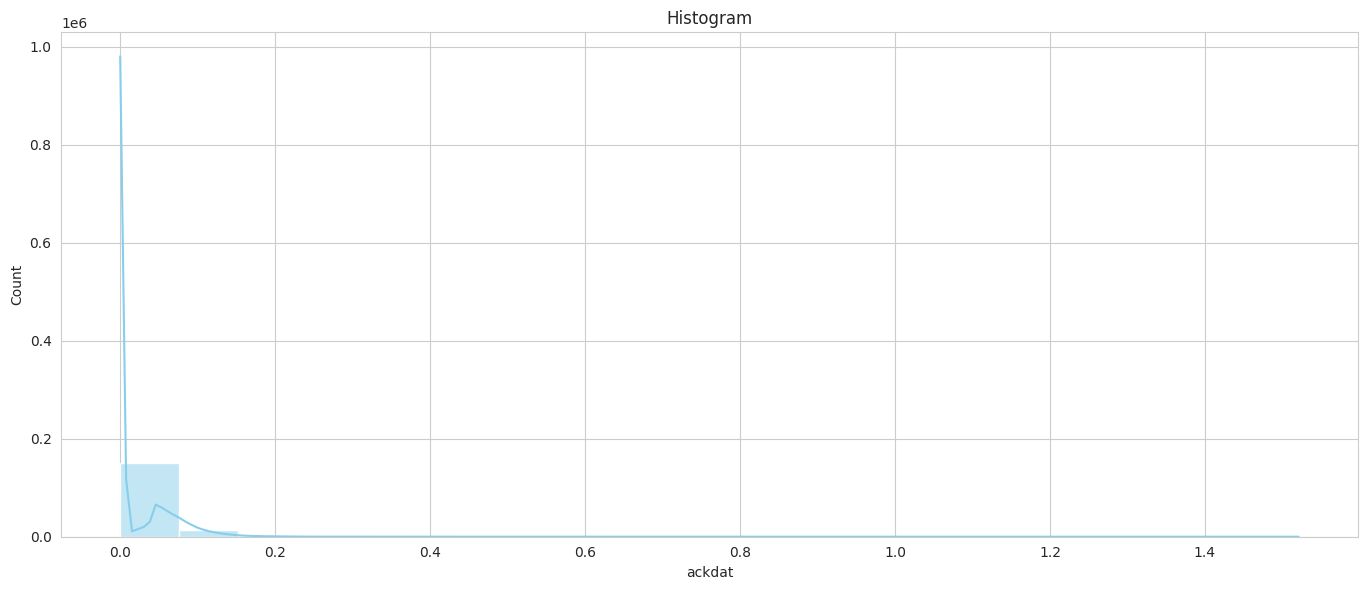

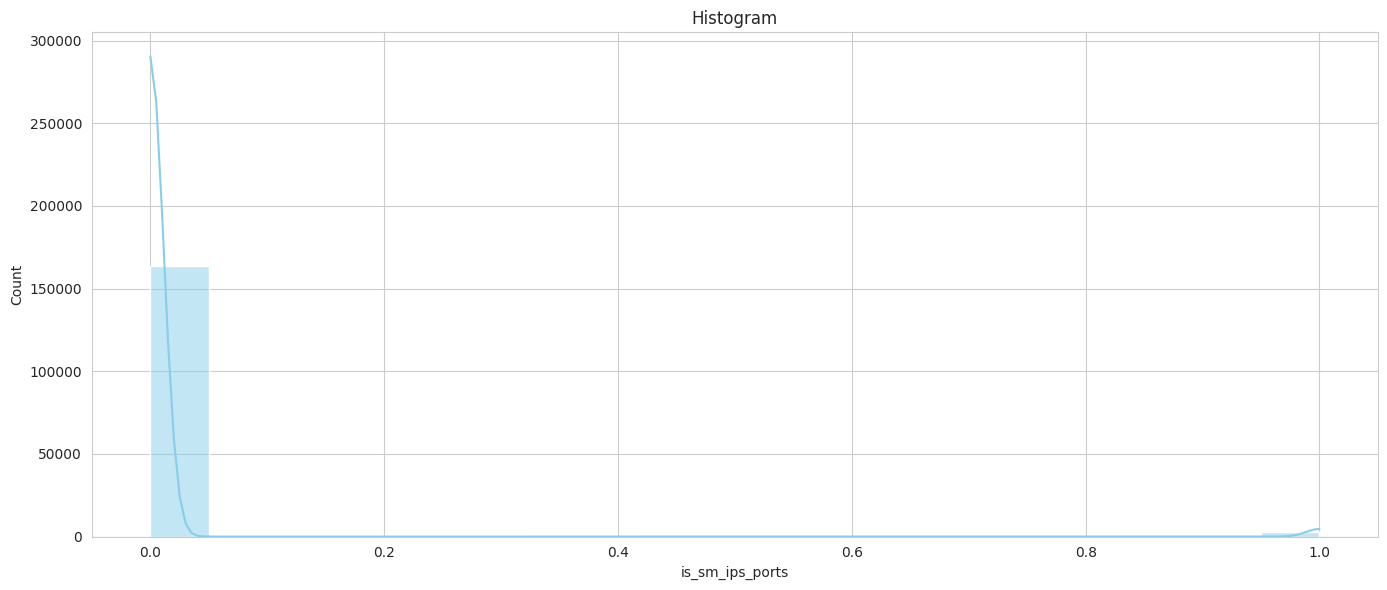

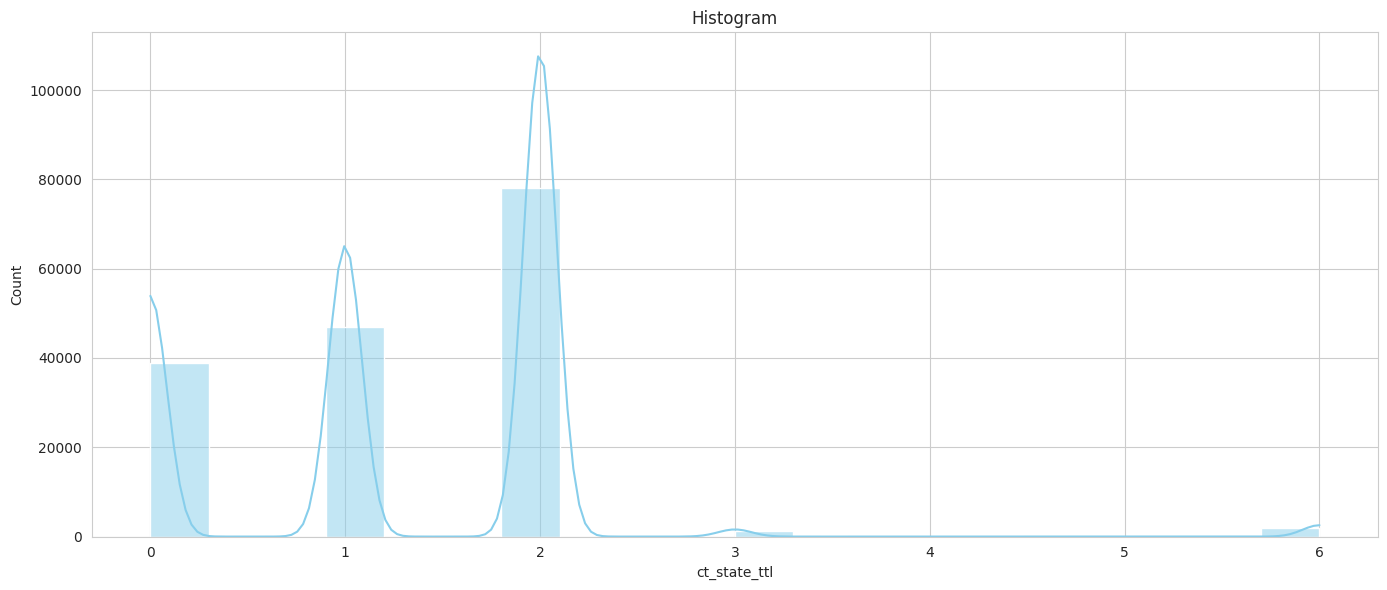

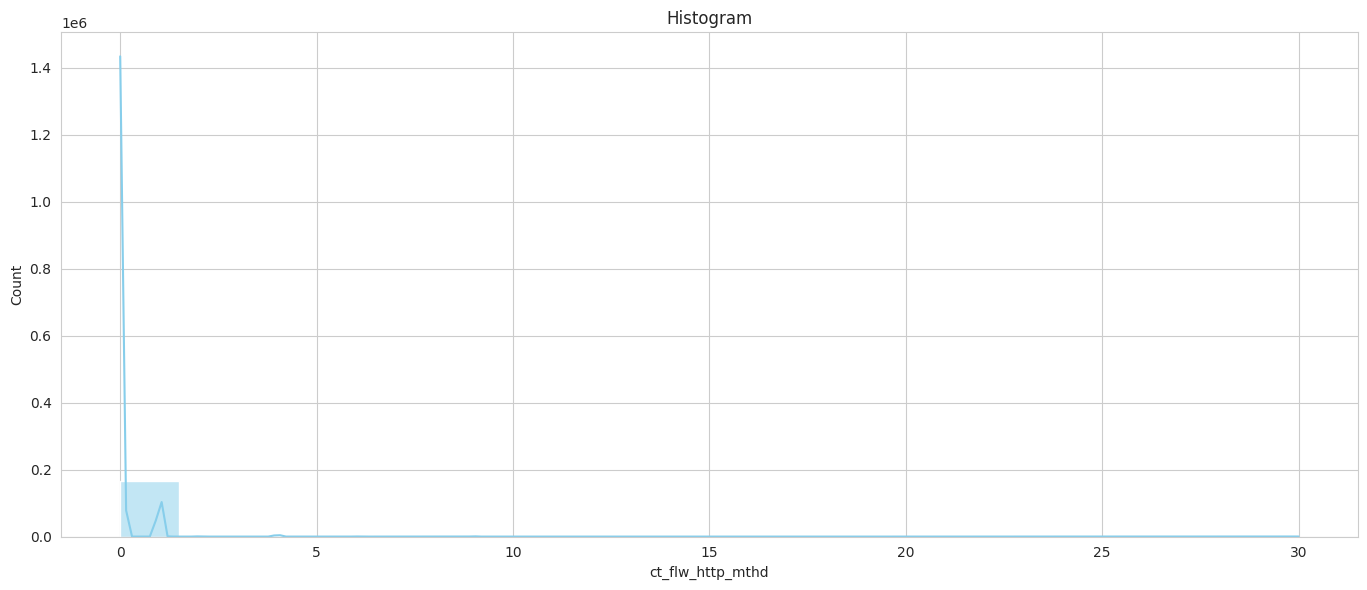

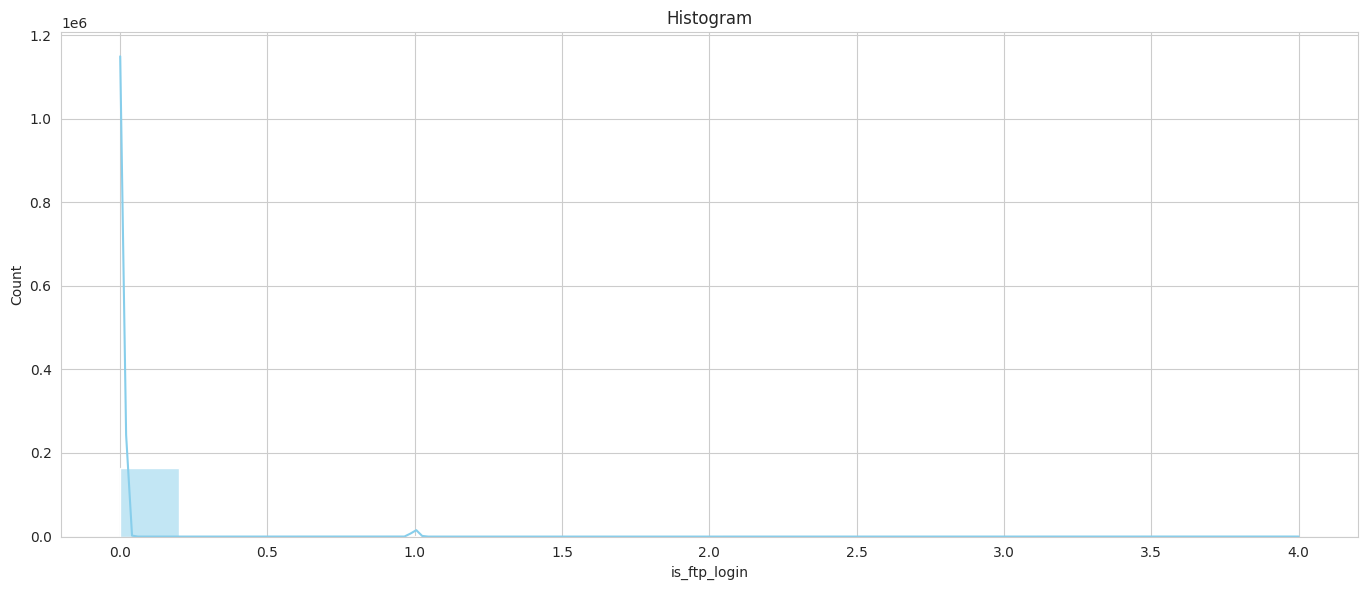

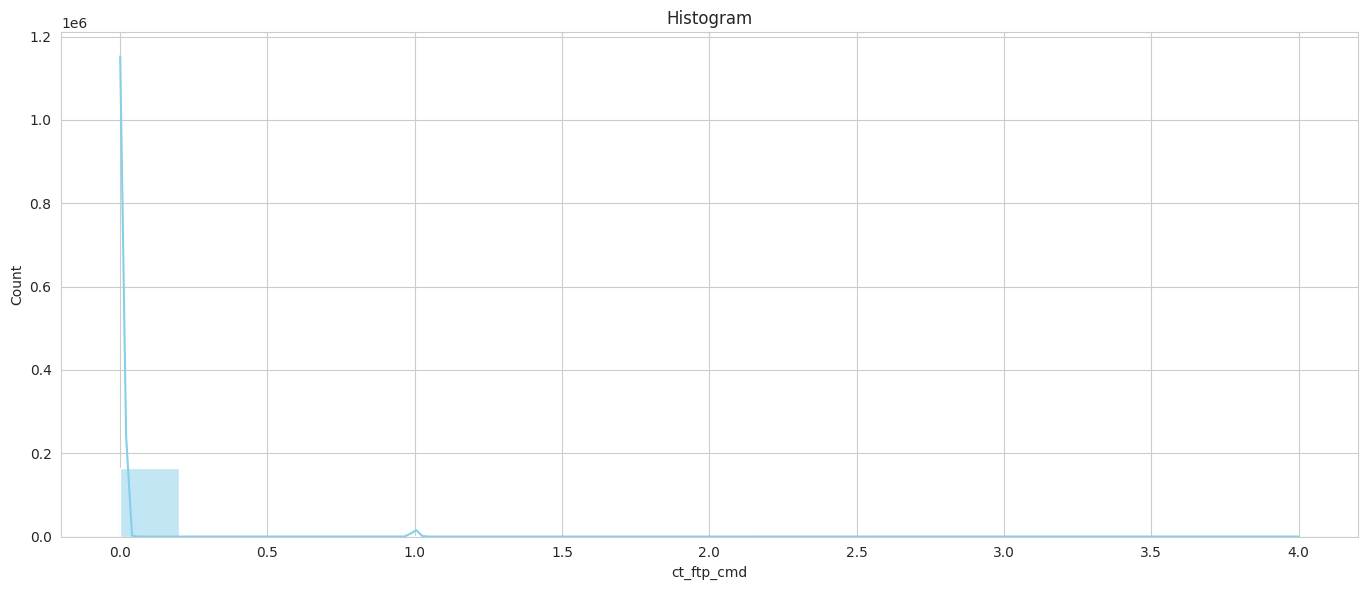

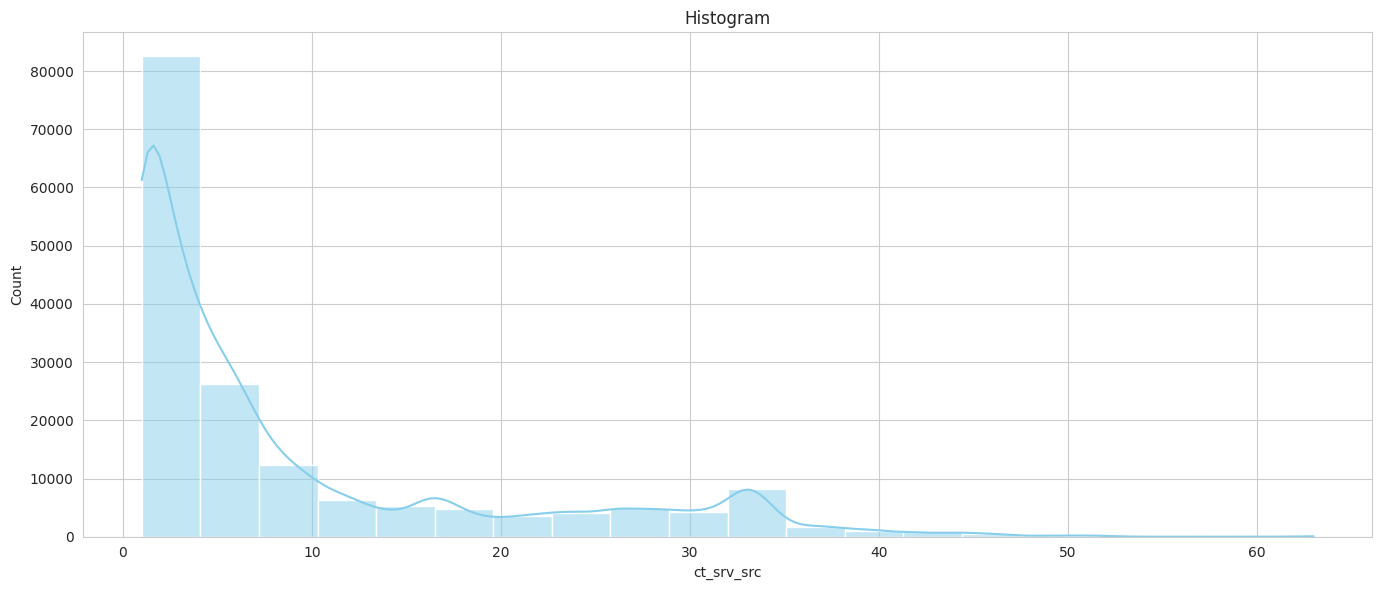

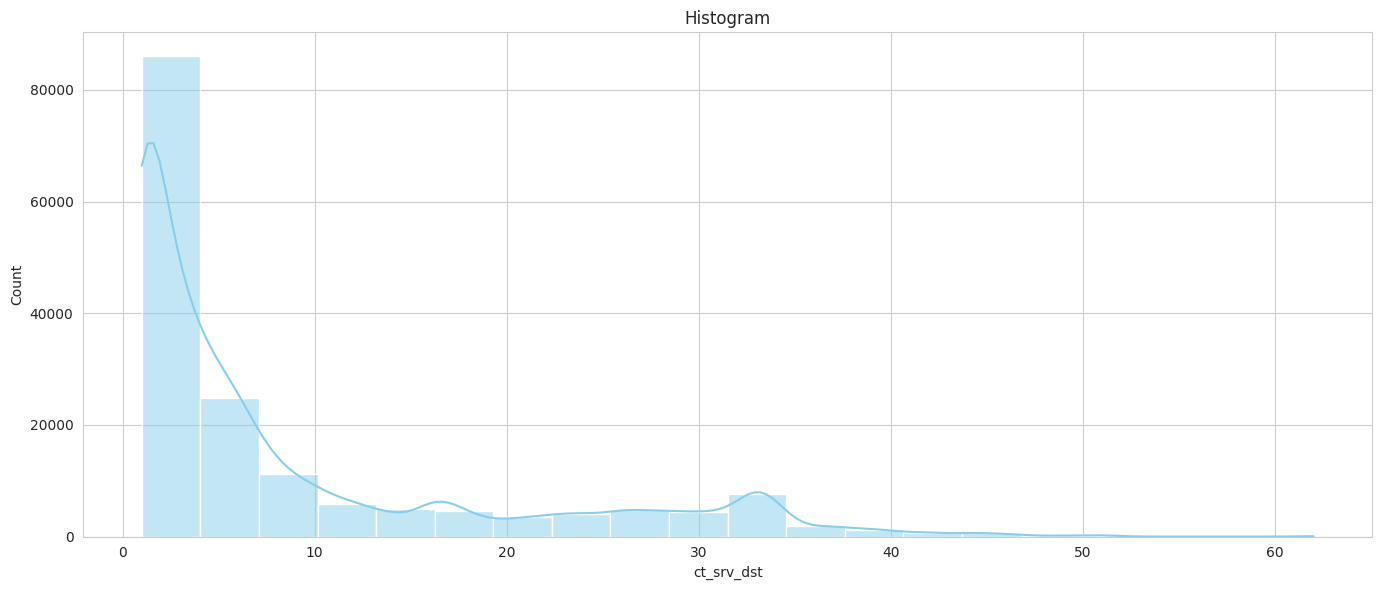

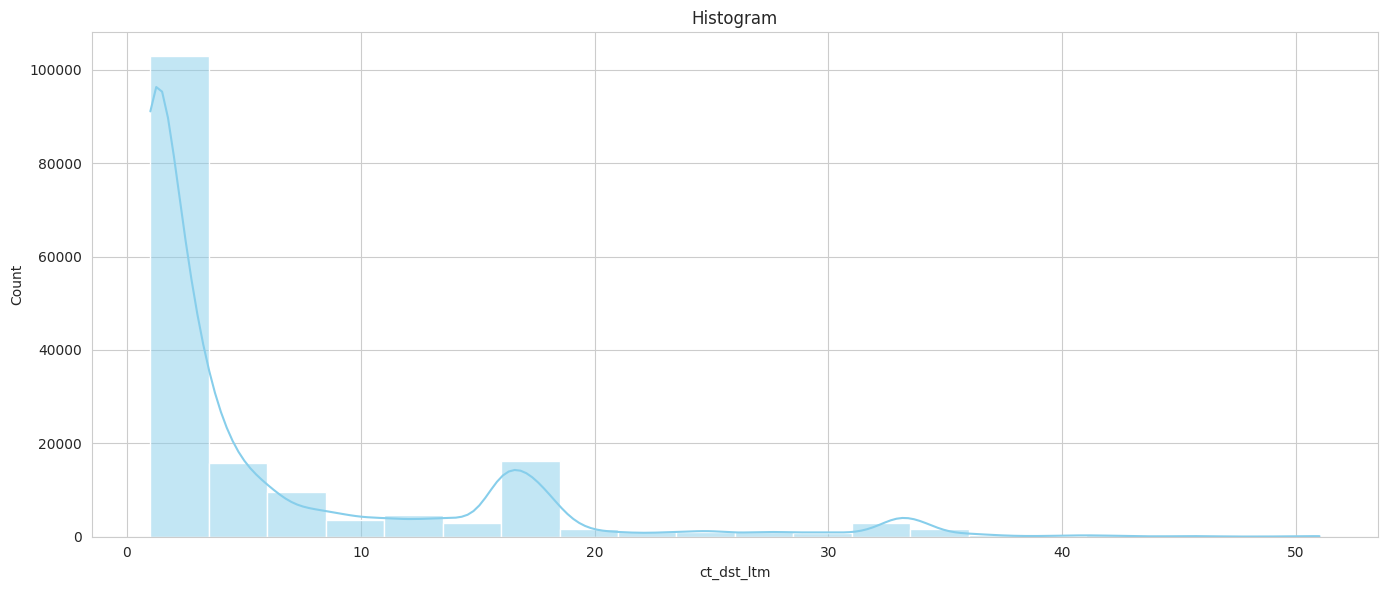

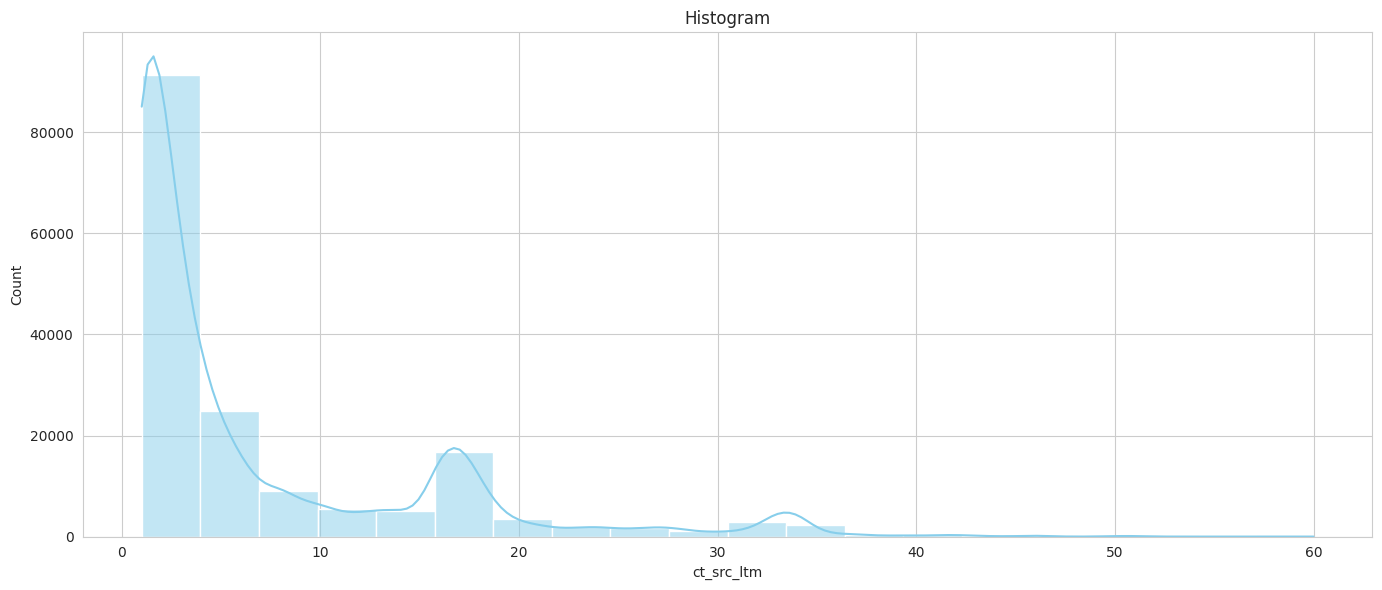

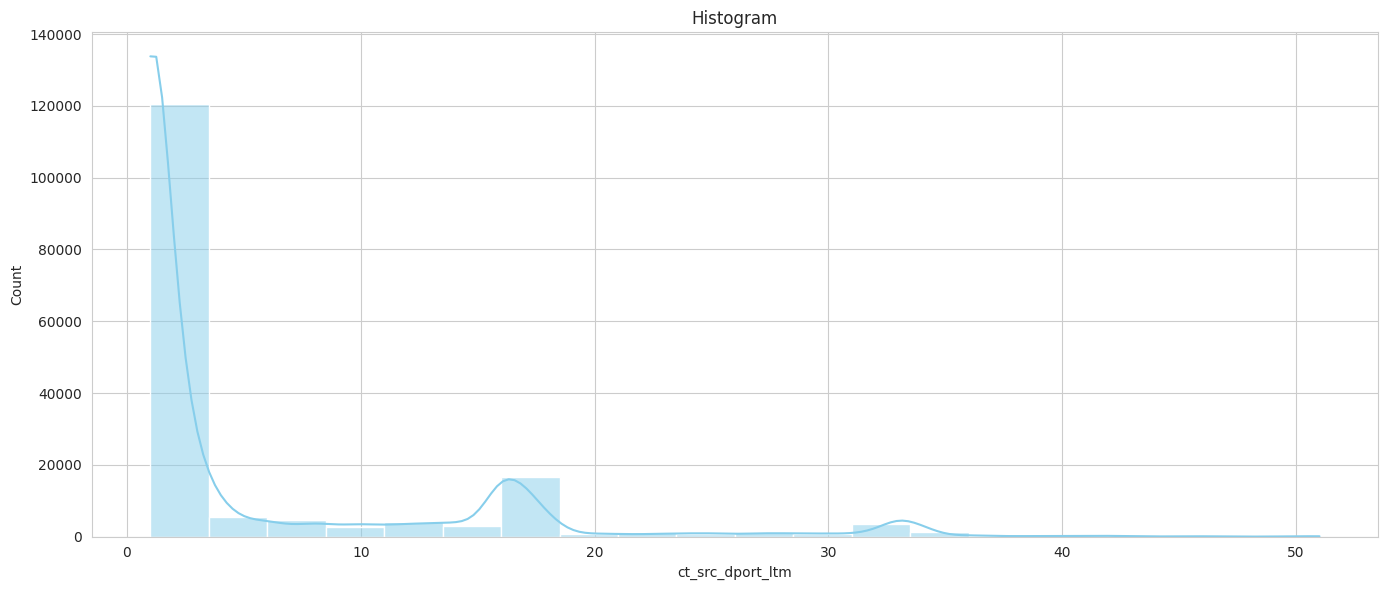

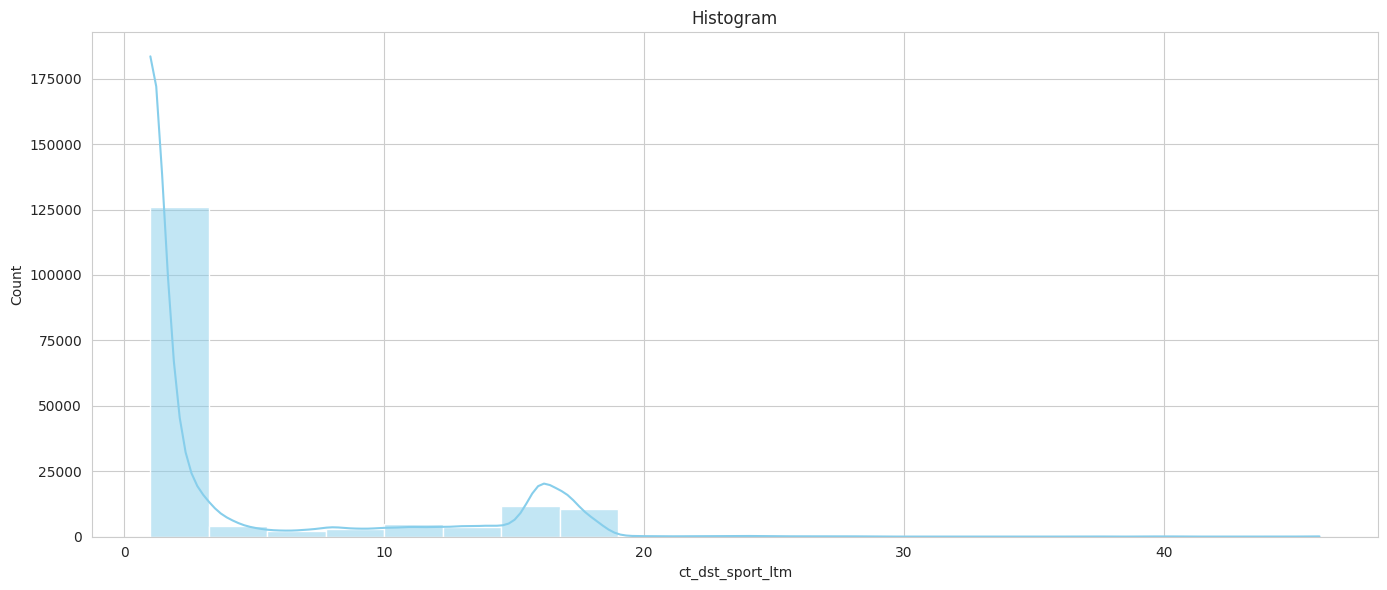

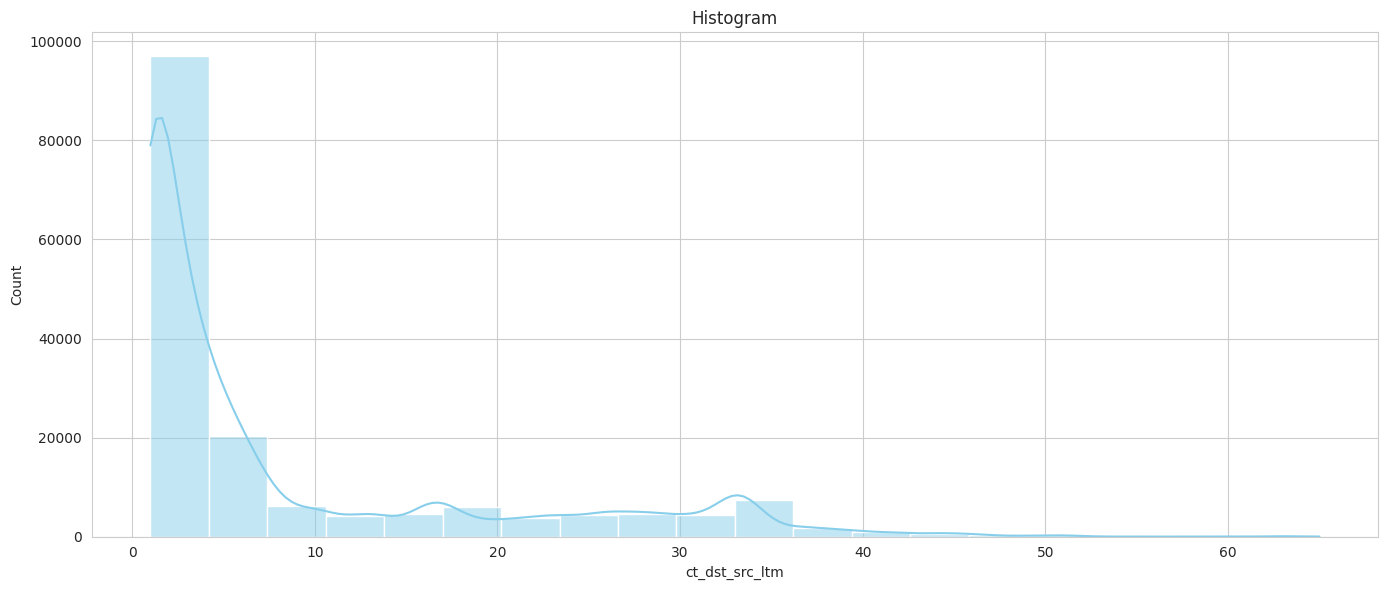

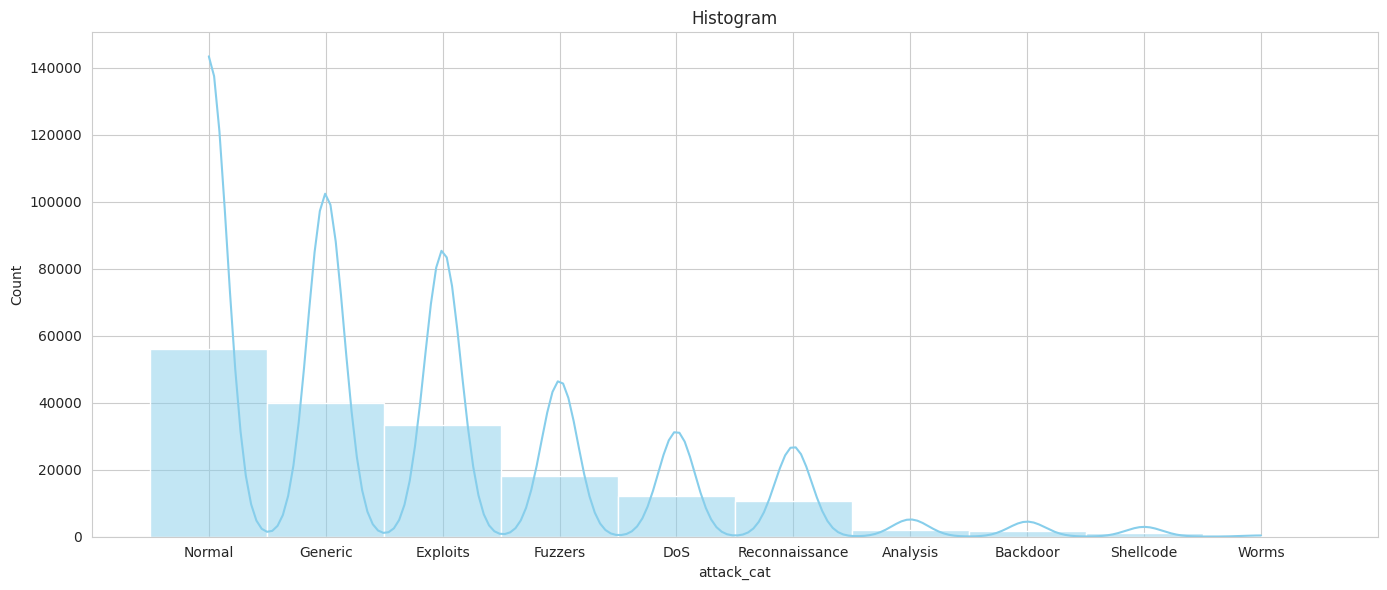

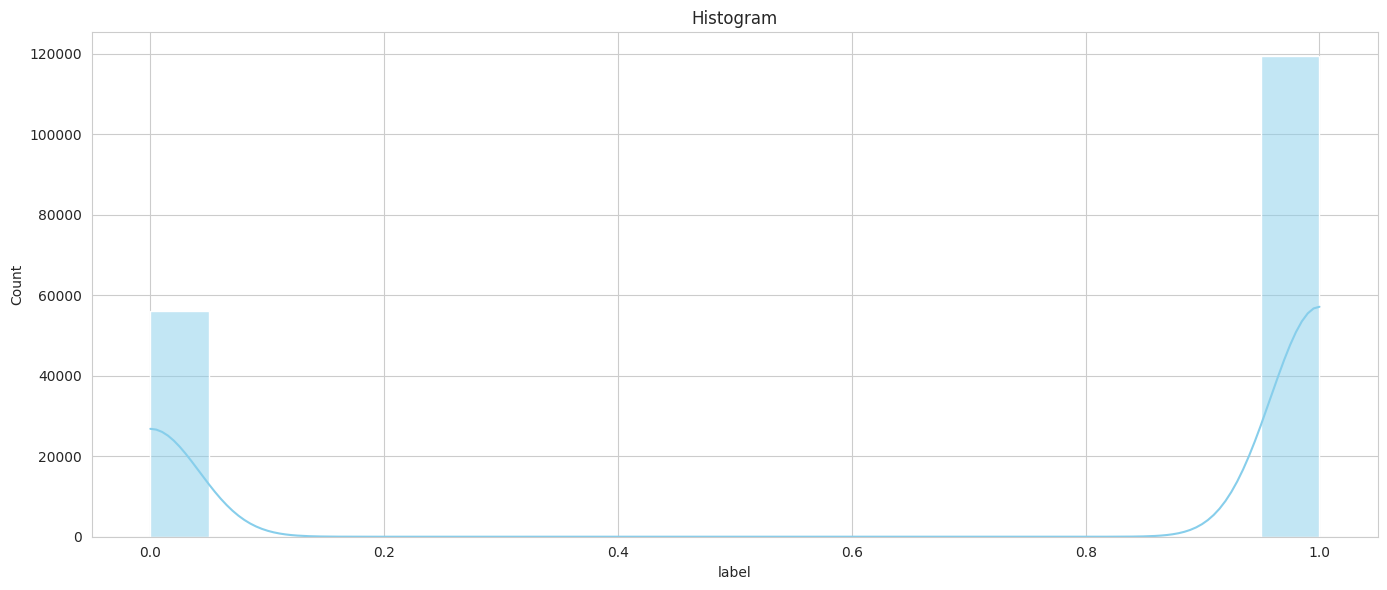

In [ ]:
sns.set_style('whitegrid')

def visualize_data(df):
  for col in df:
    if col == 'proto':
      plt.figure(figsize=(80, 6))

      plt.subplot(1, 3, 1)
      sns.histplot(df[col], bins=20, kde=True, color='skyblue')
      plt.title('Histogram')
      plt.xticks(rotation=45)
      plt.tight_layout()
      plt.show()
    else:
      plt.figure(figsize=(40, 6))

      plt.subplot(1, 3, 1)
      sns.histplot(df[col], bins=20, kde=True, color='skyblue')
      plt.title('Histogram')

      plt.tight_layout()
      plt.show()

df_temp = df_train.drop('id', axis = 1)
visualize_data(df_temp)

In [ ]:
crosstab_1 = pd.crosstab(df_train['proto'], df_train['attack_cat'])
crosstab_2 = pd.crosstab(df_train['state'], df_train['attack_cat'])
crosstab_3 = pd.crosstab(df_train['service'], df_train['attack_cat'])

display_styled_table(crosstab_1, "Correlation between attack_cat and proto")
display_styled_table(crosstab_2, "Correlation between attack_cat and state")
display_styled_table(crosstab_3, "Correlation between attack_cat and service")

Numerical features

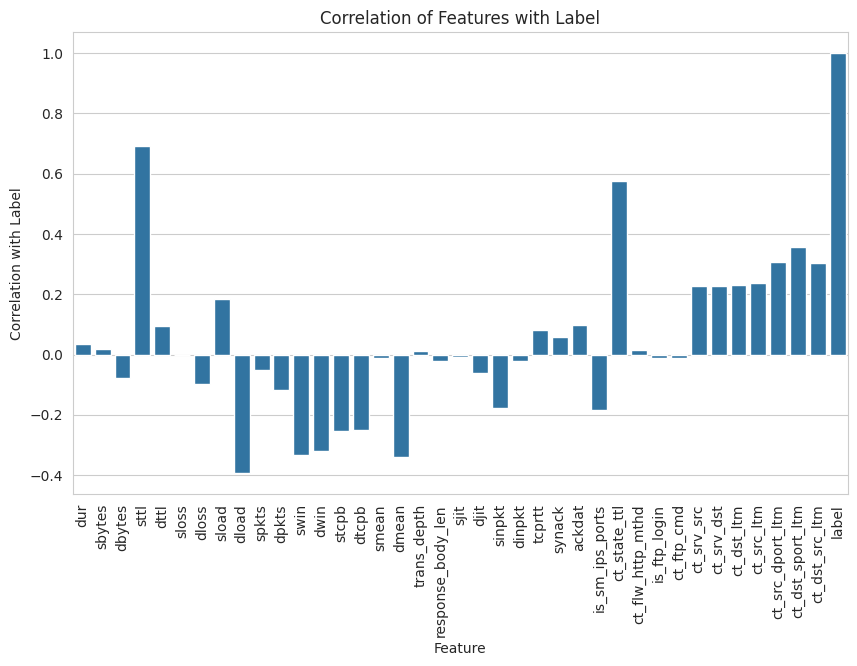

In [ ]:
df_temp = df_train.drop(['id','proto','service','state','attack_cat'], axis = 1)
correlation_matrix = df_temp.corr()


label_correlation = correlation_matrix['label']

plt.figure(figsize=(10, 6))
sns.barplot(x=label_correlation.index, y=label_correlation.values)
plt.xticks(rotation=90)
plt.title('Correlation of Features with Label')
plt.xlabel('Feature')
plt.ylabel('Correlation with Label')
plt.show()

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [ ]:
def stratified_split(df, target_col='attack_cat', test_size=0.2, random_state=42, exclude_cols=None):
    if exclude_cols is None:
        exclude_cols = []

    train_df, val_df = train_test_split(
        df,
        test_size=test_size,
        stratify=df[target_col],
        random_state=random_state
    )

    train_df = train_df.drop(columns=exclude_cols)
    val_df = val_df.drop(columns=exclude_cols)

    print("\n=== Split Information ===")
    print(f"Total samples: {len(df)}")
    print(f"Training samples: {len(train_df)} ({len(train_df)/len(df)*100:.1f}%)")
    print(f"Validation samples: {len(val_df)} ({len(val_df)/len(df)*100:.1f}%)")

    print("\nTraining set distribution:")
    print(train_df[target_col].value_counts(normalize=True))
    print("\nValidation set distribution:")
    print(val_df[target_col].value_counts(normalize=True))

    X_train = train_df.loc[:, train_df.columns != target_col]
    Y_train = train_df[target_col]
    X_val = val_df.loc[:, val_df.columns != target_col]
    Y_val = val_df[target_col]

    return X_train, Y_train, X_val, Y_val

X_train, Y_train, X_val, Y_val = stratified_split(
    df_train,
    target_col='attack_cat',
    test_size=0.2,
    random_state=42,
    exclude_cols=['id', 'label']
)


=== Split Information ===
Total samples: 175341
Training samples: 140272 (80.0%)
Validation samples: 35069 (20.0%)

Training set distribution:
attack_cat
Normal            0.319379
Generic           0.228128
Exploits          0.190444
Fuzzers           0.103706
DoS               0.069943
Reconnaissance    0.059834
Analysis          0.011406
Backdoor          0.009959
Shellcode         0.006459
Worms             0.000741
Name: proportion, dtype: float64

Validation set distribution:
attack_cat
Normal            0.319370
Generic           0.228122
Exploits          0.190453
Fuzzers           0.103710
DoS               0.069948
Reconnaissance    0.059825
Analysis          0.011406
Backdoor          0.009952
Shellcode         0.006473
Worms             0.000741
Name: proportion, dtype: float64


# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [ ]:
class TransformMissingValue(BaseEstimator, TransformerMixin):
  def __init__(self, proto_strategy = 'any'):
    self.proto_strategy = proto_strategy
    self.knn_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    self.median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    self.median_cols = ['sttl', 'dttl', 'swin', 'dwin', 'trans_depth', 'ct_state_ttl', 'ct_flw_http_mthd', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']
    self.knn_cols = ['dur', 'sbytes', 'dbytes', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'stcpb', 'dtcpb', 'smean', 'dmean', 'response_body_len', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat']
    self.categorical_cols = ['proto', 'state', 'service', 'is_sm_ips_ports', 'is_ftp_login']

  def fit(self, X, y=None):
    self.knn_imputer.fit(X[self.knn_cols])
    self.median_imputer.fit(X[self.median_cols])
    return self

  def transform(self, X):
    X = X.copy()
    X[self.knn_cols] = self.knn_imputer.transform(X[self.knn_cols])
    X[self.median_cols] = self.median_imputer.transform(X[self.median_cols])
    if 'proto' in X.columns:
      fill_value = 'any' if self.proto_strategy == 'any' else '-'
      X['proto'].fillna(fill_value, inplace=True)

    if 'state' in X.columns:
      X['state'].fillna('no', inplace=True)

    if 'service' in X.columns:
      X['service'].fillna('-', inplace=True)

    if 'is_sm_ips_ports' in X.columns:
      X['is_sm_ips_ports'].fillna(0, inplace=True)

    if 'is_ftp_login' in X.columns:
      X['is_ftp_login'].fillna(0, inplace=True)
    return X

Untuk kolom numerikal, kami melakukan penanganan missing value dengan menggunakan nilai median dari dataset tersebut, sedangkan untuk kolom kategorikal, kamu melakukan pengisian secara konstan. Kami memutuskan untuk tidak menghapus kolom tersebut karena persentase yang hilang dari setiap kolom tersebut cukup kecil sehingga berpotensi berdampak terhadap kinerja model jika dilakukan penghapusan kolom.

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [ ]:
class TransformOutlierValue(BaseEstimator, TransformerMixin):
  def __init__(self):
    self.clipped_log_transform_cols = ['sbytes', 'dbytes', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'response_body_len', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat', 'dur', 'stcpb', 'dtcpb', 'smean', 'dmean']
    self.lower = []
    self.upper = []

  def fit(self, X, y=None):
    for col in self.clipped_log_transform_cols:
      lower, upper = X[col].quantile([0.01, 0.99])
      self.lower.append(lower)
      self.upper.append(upper)
    return self

  def transform(self, X):
    X = X.copy()
    for i, col in enumerate(self.clipped_log_transform_cols):
      X[col] = X[col].clip(lower=self.lower[i], upper=self.upper[i])
      X[col] = np.log1p(X[col])

    # categorical
    X['is_ftp_login'] = X['is_ftp_login'].apply(lambda x: x if x in [0, 1] else 0)
    X['is_sm_ips_ports'] = X['is_sm_ips_ports'].apply(lambda x: x if x in [0, 1] else 0)
    return X

Untuk menangani outlier value, kami melakukan clip terhadap quantile 0.01 dan 0.99 yang dilanjutkan dengan log transformation terhadap semua kolom numerikal yang right-skewed. Selain itu, untuk kolom binary, kami memastikan bahwa data hanya berupa 0 atau 1.  

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [ ]:
print(f"Number of duplicated rows for X_train: {X_train.duplicated().sum()}")

Number of duplicated rows for X_train: 5210


In [ ]:
X_train_no_dup = X_train.drop_duplicates()
Y_train_no_dup = Y_train.loc[X_train_no_dup.index]
assert len(X_train_no_dup) == len(Y_train_no_dup)

In [ ]:
print(f"Number of duplicated rows for X_train: {X_train_no_dup.duplicated().sum()}")

Number of duplicated rows for X_train: 0


### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

class FeatureEngineering(BaseEstimator, TransformerMixin):
  def __init__(self, k=20):
    self.k = k
    self.selector = SelectKBest(score_func=mutual_info_classif, k=self.k)

  def fit(self, X, y=None):
    if y is None:
      raise ValueError("y (target variable) is required for mutual_info_classif.")
    self.selector.fit(X, y)
    return self

  def transform(self, X):
    return self.selector.transform(X)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
class ID3FeatureEngineering(BaseEstimator, TransformerMixin):
  def __init__(self, k=5):
    self.k = k
    self.discretizer = KBinsDiscretizer(n_bins=self.k, encode="ordinal", strategy="uniform")
    self.categorical_cols = ['proto', 'state', 'service', 'is_sm_ips_ports', 'is_ftp_login']
    self.numerical_cols = []

  def fit(self, X, y=None):
    self.numerical_cols = [col for col in X.columns if col not in self.categorical_cols]
    self.discretizer.fit(X[self.numerical_cols])
    return self

  def transform(self, X):
    X = X.copy()
    discretized = self.discretizer.transform(X[self.numerical_cols])
    for i, col in enumerate(self.numerical_cols):
      X[col] = discretized[:, i]

    return X

Untuk feature engineering, kami memilih k buah fitur terbaik untuk digunakan dalam training model. Hal ini dilakukan untuk mengurangi noise pada data yang digunakan untuk melatih model.

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [ ]:
class FeatureScaling(BaseEstimator, TransformerMixin):
  def __init__(self):
    self.standard_scaler = StandardScaler()
    self.min_max_scaler = MinMaxScaler()
    self.standard_cols = ['dur', 'sbytes', 'dbytes', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'stcpb', 'dtcpb', 'smean', 'dmean', 'response_body_len', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat']
    self.min_max_cols = ['sttl', 'dttl', 'swin', 'dwin', 'trans_depth', 'ct_state_ttl', 'ct_flw_http_mthd', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'proto_encoded', 'proto_target_encoded', 'state_target_encoded', 'service_target_encoded']
    self.standard_cols_used = []
    self.min_max_cols_used = []

  def fit(self, X, y=None):
    self.standard_cols_used = [col for col in self.standard_cols if col in X.columns]
    self.min_max_cols_used = [col for col in self.min_max_cols if col in X.columns]

    self.standard_scaler.fit(X[self.standard_cols_used])
    self.min_max_scaler.fit(X[self.min_max_cols_used])
    return self

  def transform(self, X):
    X = X.copy()

    if self.standard_cols_used:
        X[self.standard_cols_used] = self.standard_scaler.transform(X[self.standard_cols_used])

    if self.min_max_cols_used:
        X[self.min_max_cols_used] = self.min_max_scaler.transform(X[self.min_max_cols_used])

    return X

Pada feature scaling, kami membagi kolom berdasarkan cara handle scalingnya. Pertama adalah kolom yang menggunakan MinMaxScaler, yaitu kolom yang tidak terlalu kontinu atau memiliki ordinalitas tinggi. Kedua adalah kolom yang menggunakan StandardScaler, yaitu kolom yang kontinu dan right-skewed.

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

class FeatureEncodingKNN(BaseEstimator, TransformerMixin):
  def __init__(self):
    self.freq_encoding_map = {}
    self.state_ohe = OneHotEncoder(handle_unknown='ignore')
    self.service_ohe = OneHotEncoder(handle_unknown='ignore')

  def fit(self, X, y=None):
    self.freq_encoding_map = X['proto'].value_counts(normalize=True).to_dict()
    self.state_ohe.fit(X[['state']])
    self.service_ohe.fit(X[['service']])
    return self

  def transform(self, X):
    X = X.copy()

    X['proto_encoded'] = X['proto'].map(self.freq_encoding_map).fillna(0)

    state_encoded = self.state_ohe.transform(X[['state']]).toarray()
    state_encoded_df = pd.DataFrame(
        state_encoded,
        columns=self.state_ohe.get_feature_names_out(['state']),
        index=X.index
    )
    X = pd.concat([X, state_encoded_df], axis=1)

    # One-hot encoding for 'service'
    service_encoded = self.service_ohe.transform(X[['service']]).toarray()
    service_encoded_df = pd.DataFrame(
        service_encoded,
        columns=self.service_ohe.get_feature_names_out(['service']),
        index=X.index
    )
    X = pd.concat([X, service_encoded_df], axis=1)

    # Drop original columns after encoding
    X = X.drop(columns=['proto', 'state', 'service'])

    return X

Pada model KNN, kami melakukan feature encoding berupa frequency encoding terhadap `proto` karena proto memiliki ordinality yang cukup tinggi. Di sisi lain, kami melakukan feature encoding berupa one-hot encoding terhadap `state` dan `service` karena data tersebut berupa nominal dan ordinalitynya tidak terlalu tinggi.

In [ ]:
from category_encoders import TargetEncoder
class FeatureEncodingGNB(BaseEstimator, TransformerMixin):
  def __init__(self, columns=['proto', 'state', 'service']):
    self.columns = columns
    self.encoders = {}

  def fit(self, X, y):
    for col in self.columns:
      encoder = TargetEncoder()
      encoder.fit(X[col], y)
      self.encoders[col] = encoder
    return self

  def transform(self, X):
    X = X.copy()
    for col, encoder in self.encoders.items():
      X[f'{col}_target_encoded'] = encoder.transform(X[[col]])
    X = X.drop(columns=self.columns)
    return X

Pada prprocessing model Gaussian Naive Bayes (GNB), kami melakukan feature encoding berupa target encoding terhadap `proto`, `state`, dan `service` karena encoding ini membuat data lebih kontinu yang baik untuk model GNB.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder

class FeatureEncodingID3(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_features=['proto', 'state', 'service', 'is_sm_ips_ports', 'is_ftp_login']):
        self.categorical_features = categorical_features
        self.encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

    def fit(self, X, y=None):
        self.encoder.fit(X[self.categorical_features])
        return self

    def transform(self, X):
        X = X.copy()
        X[self.categorical_features] = self.encoder.transform(X[self.categorical_features])
        return X

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

Evaluation metrics yang digunakan untuk melakukan training model adalah Macro F1-score yang tepat untuk imbalanced dataset.

### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
import pandas as pd

class PCATransform(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=0.95, random_state=42):
        self.n_components = n_components
        self.random_state = random_state
        self.pca = PCA(n_components=self.n_components, random_state=self.random_state)

    def fit(self, X, y=None):
        self.pca.fit(X)
        return self

    def transform(self, X, y=None):
        X_transformed = self.pca.transform(X)
        return X_transformed

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [ ]:
# encode target class
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(Y_train_no_dup)
y_val_encoded = label_encoder.transform(Y_val)

# define categorical features
categorical_features = ['proto', 'state', 'service', 'is_sm_ips_ports', 'is_ftp_login']
categorical_features_indices = [X_train_no_dup.columns.get_loc(col) for col in categorical_features]

In [ ]:
from sklearn.pipeline import Pipeline

knn_pipeline = Pipeline([
    ('missing_value_transform', TransformMissingValue()),
    ('outlier_transform', TransformOutlierValue()),
    ('feature_encoding', FeatureEncodingKNN()),
    ('feature_scaling', FeatureScaling()),
    ('feature_engineering', FeatureEngineering(k=16)),
    ('pca', PCATransform(n_components=10))
])

gnb_pipeline = Pipeline([
    ('missing_value_transform', TransformMissingValue()),
    ('outlier_transform', TransformOutlierValue()),
    ('feature_encoding', FeatureEncodingGNB()),
    ('feature_scaling', FeatureScaling()),
    ('feature_engineering', FeatureEngineering(k=16)),
    ('pca', PCATransform(n_components=10))
])

id3_pipeline = Pipeline([
    ('missing_value_transform', TransformMissingValue()),
    ('outlier_transform', TransformOutlierValue()),
    ('feature_encoding', FeatureEncodingID3()),
    ('feature_engineering', ID3FeatureEngineering(k=5))
])

In [ ]:
# transform knn pipeline
X_train_knn = knn_pipeline.fit_transform(X_train_no_dup, y_train_encoded)
X_val_knn = knn_pipeline.transform(X_val)

<ipython-input-26-3a59023ef9c8>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['proto'].fillna(fill_value, inplace=True)
<ipython-input-26-3a59023ef9c8>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [ ]:
print(X_train_knn)
print(X_val_knn)

[[-2.56647663 -0.24177988  0.22641228 ... -0.12563178 -0.02494194
  -0.06912035]
 [-2.06420509 -0.74844982  0.16955953 ... -0.38759663 -0.85594295
   0.46660304]
 [-2.6126103  -0.21551829  0.14610736 ... -0.08665334 -0.028277
  -0.07358223]
 ...
 [-0.89411486  1.97863487  0.43859443 ...  0.00555843  0.10822
   0.21823269]
 [ 1.92149353 -0.50332214  0.72649608 ... -0.36992392 -0.04431865
  -0.33051169]
 [-2.4393027   0.562074   -0.24276305 ...  0.03260625 -0.03064891
  -0.06208772]]
[[ 3.66231735e+00 -6.48438310e-01  4.94512076e-02 ... -4.36580913e-01
  -2.22088071e-01  3.62424415e-01]
 [-7.49247313e-01 -6.50896638e-01  1.78669589e+00 ... -4.27750729e-02
   3.81707555e-02 -5.76316184e-01]
 [ 2.91022763e+00 -6.30327906e-01  1.01479169e+00 ...  1.13279707e-01
  -1.06006747e+00  2.10570380e-01]
 ...
 [-2.48189715e+00  2.33522841e-01 -9.42273096e-02 ...  8.39996570e-02
   1.18325092e-02 -1.00112023e-01]
 [ 1.78346965e+00 -2.33326427e-01  1.62645508e+00 ...  1.78646439e-01
   7.51804420e-03 

In [ ]:
# transform knn pipeline
X_train_gnb = gnb_pipeline.fit_transform(X_train_no_dup, y_train_encoded)
X_val_gnb = gnb_pipeline.transform(X_val)

<ipython-input-26-3a59023ef9c8>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['proto'].fillna(fill_value, inplace=True)
<ipython-input-26-3a59023ef9c8>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [ ]:
print(X_train_gnb)
print(X_val_gnb)

[[-2.57971607e+00 -2.37861091e-01  2.36213603e-01 ...  6.28995090e-01
   1.00193119e-01  6.20120399e-02]
 [-2.02108236e+00 -7.45984078e-01  1.50754206e-01 ... -5.87040068e-01
  -9.70332736e-01  3.80750339e-01]
 [-2.62076822e+00 -2.09353272e-01  1.55352303e-01 ...  4.34092293e-01
   5.23813163e-02  2.07818627e-03]
 ...
 [-8.40809504e-01  1.96533230e+00  4.37074822e-01 ... -3.42238531e-01
   6.85805291e-02  2.27964122e-01]
 [ 1.90662219e+00 -5.03451898e-01  7.25097363e-01 ... -2.79968255e-03
  -4.75196777e-02 -3.57319529e-01]
 [-2.39420960e+00  5.69798226e-01 -2.48778141e-01 ... -4.31211658e-01
  -8.66453359e-02 -6.60170953e-02]]
[[ 3.66643083e+00 -6.46464066e-01  3.77949048e-02 ... -6.46591210e-02
  -2.55190436e-01  3.32222478e-01]
 [-6.77646381e-01 -7.17891809e-01  1.76024876e+00 ...  2.36114526e-01
   7.19555008e-02 -5.62102930e-01]
 [ 2.90000236e+00 -6.39632978e-01  1.00593832e+00 ...  9.02309521e-02
  -1.06529945e+00  1.81112390e-01]
 ...
 [-2.45143441e+00  2.47952573e-01 -9.8490940

In [ ]:
X_train_id3 = id3_pipeline.fit_transform(X_train_no_dup, y_train_encoded)
X_val_id3 = id3_pipeline.transform(X_val)

<ipython-input-26-3a59023ef9c8>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['proto'].fillna(fill_value, inplace=True)
<ipython-input-26-3a59023ef9c8>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [ ]:
X_train_id3_np = X_train_id3.values
X_val_id3_np = X_val_id3.values
print(X_train_id3_np)
print(X_val_id3_np)

[[119.   3.   0. ...   0.   0.   3.]
 [ 52.   3.   0. ...   0.   0.   0.]
 [119.   3.   0. ...   1.   0.   2.]
 ...
 [ 78.   4.   0. ...   0.   0.   0.]
 [113.   2.   0. ...   0.   0.   0.]
 [116.   3.   0. ...   0.   0.   0.]]
[[113.   2.   1. ...   0.   0.   0.]
 [  6.   3.   0. ...   0.   0.   0.]
 [113.   2.   1. ...   0.   0.   0.]
 ...
 [120.   3.   0. ...   0.   0.   0.]
 [113.   2.   1. ...   0.   0.   0.]
 [119.   3.   0. ...   1.   1.   2.]]


# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

### KNN Model From Scratch

In [ ]:
import numpy as np
from collections import Counter

def minkowski_distance(x, y, p=2):
    """
    Calculate the Minkowski distance between two points.

    Args:
        x (array-like): First point.
        y (array-like): Second point.
        p (int): The order of the Minkowski distance.

    Returns:
        float: The Minkowski distance between x and y.
    """
    return np.sum(np.abs(x - y) ** p) ** (1 / p)

class KDTree:
    """
    KD-Tree implementation for efficient nearest neighbor search.
    """
    def __init__(self, points, indices, depth=0):
        self.axis = depth % len(points[0])
        sorted_points = sorted(zip(points, indices), key=lambda x: x[0][self.axis])
        median_idx = len(sorted_points) // 2

        self.location, self.index = sorted_points[median_idx]
        self.left = KDTree(
            [p[0] for p in sorted_points[:median_idx]],
            [p[1] for p in sorted_points[:median_idx]],
            depth + 1
        ) if median_idx > 0 else None

        self.right = KDTree(
            [p[0] for p in sorted_points[median_idx + 1:]],
            [p[1] for p in sorted_points[median_idx + 1:]],
            depth + 1
        ) if median_idx + 1 < len(sorted_points) else None

    def nearest_neighbor(self, target, k=1, p=2):
        """
        Find the k nearest neighbors of the target point.

        Args:
            target (array-like): Target point.
            k (int): Number of neighbors to find.
            p (int): The order of the Minkowski distance.

        Returns:
            list: List of tuples (distance, index).
        """
        neighbors = []

        def search(tree, depth=0):
            if tree is None:
                return

            axis = depth % len(target)
            dist = minkowski_distance(target, tree.location, p)
            neighbors.append((dist, tree.index))
            neighbors.sort(key=lambda x: x[0])
            if len(neighbors) > k:
                neighbors.pop()

            diff = target[axis] - tree.location[axis]
            close, away = (tree.left, tree.right) if diff < 0 else (tree.right, tree.left)

            search(close, depth + 1)

            if len(neighbors) < k or abs(diff) < neighbors[-1][0]:
                search(away, depth + 1)

        search(self)
        return neighbors

class KNN:
    """
    K-Nearest Neighbors (KNN) classifier.
    """
    def __init__(self, k=3, p=2):
        """
        Initialize the KNN classifier.

        Args:
            k (int): Number of neighbors.
            p (int): The order of the Minkowski distance.
        """
        self.k = k
        self.p = p
        self.kdtree = None
        self.y_train = None

    def fit(self, X, y):
        """
        Fit the KNN classifier with training data.

        Args:
            X (array-like): Training features.
            y (array-like): Training labels.
        """
        self.kdtree = KDTree(list(X), list(range(len(X))))
        self.y_train = np.array(y)

    def predict(self, X):
        """
        Predict the labels for the given data points.

        Args:
            X (array-like): Test features.

        Returns:
            list: Predicted labels.
        """
        predictions = []
        for x in X:
            neighbors = self.kdtree.nearest_neighbor(x, self.k, self.p)
            indices = [neighbor[1] for neighbor in neighbors]
            labels = self.y_train[indices]
            most_common = Counter(labels).most_common(1)[0][0]
            predictions.append(most_common)
        return predictions

In [ ]:
knn_scratch = KNN(k=6, p=2)
knn_scratch.fit(X_train_knn, y_train_encoded)

In [ ]:
# save knn scratch model
import pickle

with open('knn_scratch_model.pkl', 'wb') as file:
  pickle.dump(knn_scratch, file)

print("KNN from scratch saved")

KNN from scratch saved


In [ ]:
from sklearn.metrics import f1_score
y_val_pred_knn_scratch = knn_scratch.predict(X_val_knn)

macro_f1_knn_scratch = f1_score(y_val_encoded, y_val_pred_knn_scratch, average='macro')
print("KNN From Scratch Macro F1 Score:", macro_f1_knn_scratch)

KNN From Scratch Macro F1 Score: 0.5177014578322122


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
# another metrics
accuracy_knn_scratch = accuracy_score(y_val_encoded, y_val_pred_knn_scratch)
precision_knn_scratch = precision_score(y_val_encoded, y_val_pred_knn_scratch, average='macro')
recall_knn_scratch = recall_score(y_val_encoded, y_val_pred_knn_scratch, average='macro')

print("KNN From Scratch Accuracy Score:", accuracy_knn_scratch)
print("KNN From Scratch Precision Score:", precision_knn_scratch)
print("KNN From Scratch Recall Score:", recall_knn_scratch)

KNN From Scratch Accuracy Score: 0.7873050272320283
KNN From Scratch Precision Score: 0.568385356381558
KNN From Scratch Recall Score: 0.4975024625805385


### KNN Model From Library

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_knn, y_train_encoded)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_val_pred_knn = knn.predict(X_val_knn)

macro_f1_knn = f1_score(y_val_encoded, y_val_pred_knn, average='macro')
print("KNN From Library Macro F1 Score:", macro_f1_knn)

KNN From Library Macro F1 Score: 0.5188767078146481


In [ ]:
# another metrics
accuracy_knn = accuracy_score(y_val_encoded, y_val_pred_knn)
precision_knn = precision_score(y_val_encoded, y_val_pred_knn, average='macro')
recall_knn = recall_score(y_val_encoded, y_val_pred_knn, average='macro')

print("KNN From Library Accuracy Score:", accuracy_knn)
print("KNN From Library Precision Score:", precision_knn)
print("KNN From Library Recall Score:", recall_knn)

KNN From Library Accuracy Score: 0.7838261712623684
KNN From Library Precision Score: 0.5732511437150916
KNN From Library Recall Score: 0.4968226944805812


## B. Naive Bayes

### Gaussian Naive Bayes Model From Scratch

In [ ]:
import numpy as np
import pandas as pd
from math import sqrt, pi, exp
from typing import Dict, Any, Union

class GaussianNaiveBayes:
    def __init__(self) -> None:
        self.classes: np.ndarray | None = None
        self.mean: Dict[Union[int, float], np.ndarray] = {}
        self.variance: Dict[Union[int, float], np.ndarray] = {}
        self.priors: Dict[Union[int, float], float] = {}

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        # Validate input dimensions
        if X.shape[0] != y.shape[0]:
            raise ValueError("Number of samples in features (X) and labels (y) must match.")

        self.classes = np.unique(y)
        for cls in self.classes:
            X_cls = X[y == cls]
            self.mean[cls] = X_cls.mean(axis=0)
            self.variance[cls] = X_cls.var(axis=0)
            self.priors[cls] = X_cls.shape[0] / X.shape[0]

    def _calculate_likelihood(self, x: np.ndarray, mean: np.ndarray, variance: np.ndarray) -> np.ndarray:
        eps = 1e-6  # To avoid division by zero
        coeff = 1 / np.sqrt(2 * pi * (variance + eps))
        exponent = np.exp(-((x - mean) ** 2) / (2 * (variance + eps)))
        return coeff * exponent

    def _calculate_posterior(self, x: np.ndarray) -> Dict[Union[int, float], float]:
        posteriors: Dict[Union[int, float], float] = {}
        for cls in self.classes:
            prior: float = np.log(self.priors[cls])   # Use log to prevent underflow
            likelihood: float = np.sum(np.log(self._calculate_likelihood(x, self.mean[cls], self.variance[cls])))
            posteriors[cls] = prior + likelihood
        return posteriors

    def predict(self, X: np.ndarray) -> np.ndarray:
        y_pred: list[Any] = []
        for x in X:
            posteriors = self._calculate_posterior(x)
            y_pred.append(max(posteriors, key=posteriors.get))
        return np.array(y_pred)

In [ ]:
gnb_scratch = GaussianNaiveBayes()
gnb_scratch.fit(X_train_gnb, y_train_encoded)

In [ ]:
y_val_pred_gnb_scratch = gnb_scratch.predict(X_val_gnb)
macro_f1_gnb_scratch = f1_score(y_val_encoded, y_val_pred_gnb_scratch, average="macro")
print("GNB From Scratch Macro F1 Score:", macro_f1_gnb_scratch)

GNB From Scratch Macro F1 Score: 0.3072088410933842


In [ ]:
# another metrics
accuracy_gnb_scratch = accuracy_score(y_val_encoded, y_val_pred_gnb_scratch)
precision_gnb_scratch = precision_score(y_val_encoded, y_val_pred_gnb_scratch, average='macro')
recall_gnb_scratch = recall_score(y_val_encoded, y_val_pred_gnb_scratch, average='macro')

print("GNB From Scratch Accuracy Score:", accuracy_gnb_scratch)
print("GNB From Scratch Precision Score:", precision_gnb_scratch)
print("GNB From Scratch Recall Score:", recall_gnb_scratch)

GNB From Scratch Accuracy Score: 0.6039236932903704
GNB From Scratch Precision Score: 0.391447926187862
GNB From Scratch Recall Score: 0.33853200784238513


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# save gnb scratch model
with open('gnb_scratch_model.pkl', 'wb') as file:
  pickle.dump(gnb_scratch, file)

print("KNN from scratch saved")

KNN from scratch saved


### Gaussian Naive Bayes Model From Library

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

gnb = GaussianNB()
gnb.fit(X_train_gnb, y_train_encoded)

GaussianNB()

In [ ]:
y_val_pred_gnb = gnb.predict(X_val_gnb)
macro_f1_gnb = f1_score(y_val_encoded, y_val_pred_gnb, average='macro')
print("GNB From Library Macro F1 Score:", macro_f1_gnb)

GNB From Library Macro F1 Score: 0.3072088410933842


In [ ]:
# another metrics
accuracy_gnb = accuracy_score(y_val_encoded, y_val_pred_gnb)
precision_gnb = precision_score(y_val_encoded, y_val_pred_gnb, average='macro')
recall_gnb = recall_score(y_val_encoded, y_val_pred_gnb, average='macro')

print("gnb From Library Accuracy Score:", accuracy_gnb)
print("gnb From Library Precision Score:", precision_gnb)
print("gnb From Library Recall Score:", recall_gnb)

gnb From Library Accuracy Score: 0.6039236932903704
gnb From Library Precision Score: 0.391447926187862
gnb From Library Recall Score: 0.33853200784238513


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## C. ID3

### ID3 Model From Scratch

In [ ]:
from collections import Counter

class ID3Classifier:
    def __init__(self, max_depth: int = None):
        self.tree = None
        self.max_depth = max_depth
        self.feature_names = None
        self.target_column = None
        self.class_labels = None

    def _entropy(self, labels):
        label_counts = Counter(labels)
        probabilities = np.array([count / len(labels) for count in label_counts.values()])
        return -np.sum(probabilities * np.log2(probabilities))

    def _information_gain(self, data, feature_idx, labels):
        total_entropy = self._entropy(labels)
        unique_values, counts = np.unique(data[:, feature_idx], return_counts=True)
        weighted_entropy = 0
        for value, count in zip(unique_values, counts):
            subset = labels[data[:, feature_idx] == value]
            weighted_entropy += (count / len(data)) * self._entropy(subset)
        return total_entropy - weighted_entropy

    def _most_common_label(self, labels):
        return Counter(labels).most_common(1)[0][0]

    def _build_tree(self, data, features, labels, depth=0):
        if len(np.unique(labels)) == 1 or len(features) == 0 or \
           (self.max_depth is not None and depth >= self.max_depth):
            return self._most_common_label(labels)

        gains = [self._information_gain(data, f, labels) for f in features]
        best_feature_idx = features[np.argmax(gains)]

        tree = {best_feature_idx: {}}
        for value in np.unique(data[:, best_feature_idx]):
            mask = data[:, best_feature_idx] == value
            subtree = self._build_tree(data[mask], [f for f in features if f != best_feature_idx], labels[mask], depth + 1)
            tree[best_feature_idx][value] = subtree
        return tree

    def fit(self, X, y):
        self.feature_names = np.arange(X.shape[1])  # Use column indices as feature names
        self.tree = self._build_tree(X, self.feature_names, y)
        return self

    def predict(self, X):
        return np.array([self._predict_sample(sample) for sample in X])

    def _predict_sample(self, sample):
        node = self.tree
        while isinstance(node, dict):
            feature = list(node.keys())[0]

            value = sample[feature]

            if value not in node[feature]:
                return self._probabilistic_prediction(sample)

            node = node[feature][value]

        return node

    def _probabilistic_prediction(self, sample):
        all_labels = self._extract_labels(self.tree)

        if not all_labels:
            return np.random.choice(self.class_labels)

        return np.random.choice(all_labels)

    def _extract_labels(self, tree):
        labels = []
        def _extract(node):
            if isinstance(node, dict):
                for subnode in node.values():
                    _extract(subnode)
            else:
                labels.append(node)
        _extract(tree)
        return labels

In [ ]:
clf = ID3Classifier(max_depth=None)
clf.fit(X_train_id3_np, y_train_encoded)

In [ ]:
y_val_pred_clf = clf.predict(X_val_id3_np)
macro_f1_clf = f1_score(y_val_encoded, y_val_pred_clf, average='macro')
print("ID3 From Library Macro F1 Score:", macro_f1_clf)

ID3 From Library Macro F1 Score: 0.4160476706858228


In [ ]:
# another metrics
accuracy_clf_scratch = accuracy_score(y_val_encoded, y_val_pred_clf)
precision_clf_scratch = precision_score(y_val_encoded, y_val_pred_clf, average='macro')
recall_clf_scratch = recall_score(y_val_encoded, y_val_pred_clf, average='macro')

print("GNB From Scratch Accuracy Score:", accuracy_clf_scratch)
print("GNB From Scratch Precision Score:", precision_clf_scratch)
print("GNB From Scratch Recall Score:", recall_clf_scratch)

GNB From Scratch Accuracy Score: 0.7476973965610654
GNB From Scratch Precision Score: 0.4457208554693433
GNB From Scratch Recall Score: 0.4118527290983717


In [ ]:
# save id3 scratch model
with open('id3_scratch_model.pkl', 'wb') as file:
  pickle.dump(clf, file)

print("ID3 from scratch saved")

ID3 from scratch saved


### ID3 Model From Library

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train_id3_np, y_train_encoded)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_val_pred_id3 = dt_entropy.predict(X_val_id3)
macro_f1_id3 = f1_score(y_val_encoded, y_val_pred_id3, average='macro')
print("ID3 From Library Macro F1 Score:", macro_f1_id3)

ID3 From Library Macro F1 Score: 0.4341364509669988


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# another metrics
accuracy_id3_scratch = accuracy_score(y_val_encoded, y_val_pred_id3)
precision_id3_scratch = precision_score(y_val_encoded, y_val_pred_id3, average='macro')
recall_id3_scratch = recall_score(y_val_encoded, y_val_pred_id3, average='macro')

print("GNB From Scratch Accuracy Score:", accuracy_id3_scratch)
print("GNB From Scratch Precision Score:", precision_id3_scratch)
print("GNB From Scratch Recall Score:", recall_id3_scratch)

GNB From Scratch Accuracy Score: 0.7553394736091705
GNB From Scratch Precision Score: 0.4614790836048973
GNB From Scratch Recall Score: 0.4275180154405683


## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [ ]:
# Type your code here

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [ ]:
# delete all duplicated rows from all train_df
final_train_df = df_train.drop(columns=['id', 'label', 'attack_cat'])
X_final_train_df_no_dup = final_train_df.drop_duplicates()

Y_final_train_df = df_train.loc[:, 'attack_cat']
Y_final_train_df_no_dup = Y_final_train_df.loc[X_final_train_df_no_dup.index]

In [ ]:
Y_final_train_df_no_dup_encoded = label_encoder.transform(Y_final_train_df_no_dup)

In [ ]:
knn_pipeline_full = Pipeline([
    ('missing_value_transform', TransformMissingValue()),
    ('outlier_transform', TransformOutlierValue()),
    ('feature_encoding', FeatureEncodingKNN()),
    ('feature_scaling', FeatureScaling()),
    ('feature_engineering', FeatureEngineering(k=16)),
    ('pca', PCATransform(n_components=10))
])

X_final_train = knn_pipeline_full.fit_transform(X_final_train_df_no_dup, Y_final_train_df_no_dup_encoded)

<ipython-input-26-3a59023ef9c8>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['proto'].fillna(fill_value, inplace=True)
<ipython-input-26-3a59023ef9c8>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [ ]:
# train the KNN model
final_knn = KNN(k=6, p=2)
final_knn.fit(X_final_train, Y_final_train_df_no_dup_encoded)

In [ ]:
# prepare the test data
df_test_no_id = df_test.drop('id', axis=1)

# df_test from splitted dataset
df_test_knn1 = knn_pipeline.transform(df_test_no_id)

# df_test from full dataset
df_test_knn2 = knn_pipeline_full.transform(df_test_no_id)

<ipython-input-26-3a59023ef9c8>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['proto'].fillna(fill_value, inplace=True)
<ipython-input-26-3a59023ef9c8>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [ ]:
# prediction from knn scratch model with splitted data
y_test_pred_knn1 = knn_scratch.predict(df_test_knn1)
y_test_pred_knn1_decoded = label_encoder.inverse_transform(y_test_pred_knn1)
output_df_1 = pd.DataFrame({
    'id': df_test['id'],
    'attack_cat': y_test_pred_knn1_decoded
})
output_csv_path1 = "predictions_knn1.csv"
output_df_1.to_csv(output_csv_path1, index=False)

In [ ]:
# prediction from knn scratch model with splitted data
y_test_pred_knn2 = final_knn.predict(df_test_knn2)
y_test_pred_knn2_decoded = label_encoder.inverse_transform(y_test_pred_knn2)
output_df_2 = pd.DataFrame({
    'id': df_test['id'],
    'attack_cat': y_test_pred_knn2_decoded
})
output_csv_path2 = "predictions_knn3.csv"
output_df_2.to_csv(output_csv_path2, index=False)

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`